# README

Before execute the code above, execute the steps of section "**Accessing Google Drive from Google Colab**". These steps will configure the execution environment in colab, with all requirements necessaries.

# FIRST HERE! Accessing Google Drive from Google Colab

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Install [python 3.8](https://stackoverflow.com/a/71512702/13976785)

## Run de commands below

In [ ]:
!apt install chromium-chromedriver
#!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.10.3-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py38" --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 4 not upgraded.
Need to get 91.7 MB of archives.
After this operation, 309 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 105.0.5195.102-0ubuntu0.18.04.1 [1,156 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 105.0.5195.102-0ubuntu0.1

## Before check the current version, save the file (Ctrl+s) and reload the page (F5) and than check the current version

In [1]:
import sys
print("User Current Version:-", sys.version)

User Current Version:- 3.8.10 (default, Jun  4 2021, 15:09:15) 
[GCC 7.5.0]


# Move to the project directory



> **WARNING: For this step you will need to have downloaded the repository on your google drive. [How to do here](https://colab.research.google.com/drive/156ye97gzuYg4jFlL49495WQy9t-_oJnH?authuser=2#scrollTo=NNQ-wTalk-Fn).** 



In [2]:
%cd /content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
!pwd

/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification


## Install requirements

### Instaling project requirements

In [3]:
!pip install -U -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████████████| 160 kB 56.4 MB/s 
     |████████████████████████████████| 160 kB 75.2 MB/s 
     |████████████████████████████████| 6.6 MB 43.4 MB/s 
     |████████████████████████████████| 1.8 MB 49.3 MB/s 
     |████████████████████████████████| 944 kB 46.4 MB/s 
     |████████████████████████████████| 158 kB 58.7 MB/s 
     |████████████████████████████████| 61 kB 7.3 MB/s 
     |████████████████████████████████| 132 kB 79.7 MB/s 
     |████████████████████████████████| 297 kB 66.8 MB/s 
     |████████████████████████████████| 81 kB 9.0 MB/s 
     |████████████████████████████████| 132 kB 74.1 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 1.2 MB 70.7 MB/s 
     |████████████████████████████████| 11.3 MB 45.5 MB/s 
     |████████████████████████████████

### Restart [runtime](https://stackoverflow.com/a/53165687/13976785)

In [ ]:
import os
os.kill(os.getpid(), 9)

### Move to the project folder, again

In [1]:
%cd /content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
!pwd

/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification


# Library

In [1]:
import csv_treatments
import pre_processing
import reports
import pattern_extraction
import utils
import settings

import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Settings

In [3]:
# Some settings are configured by default. If you want to change any settings, 
# just follow the instruction for the specific setting.

# Number of jobs to run in parallel
settings.n_jobs = 3

# Folder path where the CSV file is located
# settings.dataset_folder_path = '/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/base_dados/'
settings.dataset_folder_path = '/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/base_dados/'

# Path to the dataset
settings.csv_path = csv_treatments.choose_csv_path(
        sampling='after_correlation-05-11-2022_18:16:37', folder_path=settings.dataset_folder_path)

# List with columns to delete when loading dataset
settings.delete_columns_names_on_load_data = [
    'Frigorifico_ID', 'Frigorifico_CNPJ', 'Frigorifico_RazaoSocial', 'Municipio_Frigorifico',
    'EstabelecimentoIdentificador', 'Data_homol', 'Questionario_ID',
    'area so confinamento', 'Lista Trace', 'Motivo', 'data_homol_select', 'dif_datas',
    'DataAbate_6m_ANT', 'data12m', 'data6m', 'data3m', 'data1m', 'data7d',
    'tot7d_Chuva', 'med7d_TempInst', 'med7d_TempMin', 'med7d_UmidInst', 'med7d_formITUmax', 'med7d_NDVI', 'med7d_EVI',
    'tot1m_Chuva', 'med1m_TempInst', 'med1m_UmidInst', 'med1m_NDVI', 'med1m_EVI',
    'tot3m_Chuva', 'med3m_TempInst', 'med3m_UmidInst', 'med3m_formITUmax', 'med3m_NDVI', 'med3m_EVI',
    'tot6m_Chuva', 'med6m_TempInst', 'med6m_UmidInst', 'med6m_NDVI', 'med6m_EVI',
    'tot12m_Chuva', 'med12m_TempInst', 'med12m_TempMin', 'med12m_UmidInst', 'med12m_NDVI', 'med12m_EVI',
]

# List with column names to apply the label encoder
settings.label_encoder_columns_names = [
    'DataAbate', 'classificacao'
]

# List with column names to apply the ordinal encoder
settings.one_hot_encoder_columns_names = [
    'EstabelecimentoMunicipio', 'Tipificacao', 'ANO'
]

# List with column names to apply the min max scaler
settings.min_max_scaler_columns_names = [
    'Peso',
    'med7d_formITUinst', 'med7d_preR_soja', 'med7d_preR_milho', 'med7d_preR_boi',
    'med1m_formITUinst', 'med1m_preR_soja', 'med1m_preR_milho', 'med1m_preR_boi',
    'med3m_formITUinst', 'med3m_preR_soja', 'med3m_preR_milho', 'med3m_preR_boi',
    'med6m_formITUinst', 'med6m_preR_soja', 'med6m_preR_milho', 'med6m_preR_boi',
    'med12m_formITUinst', 'med12m_preR_soja', 'med12m_preR_milho', 'med12m_preR_boi'
]

# List with column names to drop feature by correlation
# I choise the features greater than or equal to threshold 0.95, because the spearman correlation
# matrix showed that there are some features that are highly correlated
settings.columns_names_drop_feature_by_correlation = [
    'med7d_preR_soja', 'med1m_preR_soja', 'med3m_preR_soja', 'med6m_preR_soja', 'med12m_preR_soja',
    'med7d_preR_milho',
    'med7d_preR_boi', 'med1m_preR_boi', 'med3m_preR_boi', 'med6m_preR_boi',
    'med3m_formITUinst',
    'cnt3m_CL_ITUinst',
    'Maturidade', 'Acabamento', 'Peso', 'classificacao'
]

# Class column name
settings.class_column = 'classificacao'


# CSV Treatments

## Load dataset

In [5]:
# Load the dataset
# precoce_ms_data_frame = csv_treatments.load_data(
#     csv_path=settings.csv_path, delete_columns_names=settings.delete_columns_names_on_load_data,
#     number_csv_lines=settings.number_csv_lines, dtype_dict=settings.dtype_dict, parse_dates=settings.parse_dates
# )

# Load the dataset without the parse_dates parameter
precoce_ms_data_frame = csv_treatments.load_data(
    csv_path=settings.csv_path, delete_columns_names=settings.delete_columns_names_on_load_data,
    number_csv_lines=settings.number_csv_lines, dtype_dict=settings.dtype_dict
)


*****INICIO LOAD DATA******

*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 2543061
Número de colunas: 55
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543061 entries, 0 to 2543060
Data columns (total 55 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   DataAbate                         object  
 1   Maturidade                        category
 2   Acabamento                        category
 3   Peso                              float32 
 4   QuestionarioClassificacaoEstabel  uint8   
 5   FERTIIRRIGACAO                    uint8   
 6   ILP                               uint8   
 7   IFP                               uint8   
 8   ILPF                              uint8   
 9   CONCEN_VOLUM                      UInt8   
 10  CREEPFEEDING                      UInt8   
 11  FORN_ESTRAT_SILAGEM               UInt8   
 12  PROTEICO                          UInt8   
 13  PROTEICO_

# Reports

## All attributes

In [ ]:
# Print a report of all attributes
reports.all_attributes(data_frame=precoce_ms_data_frame)



*****INICIO RELATÓRIO ATRIBUTOS******
Número de atributos: 65
Nome dos atributos: ['ID_ANIMAL', 'EstabelecimentoMunicipio', 'DataAbate', 'Tipificacao', 'Maturidade', 'Acabamento', 'Peso', 'QuestionarioClassificacaoEstabel', 'FERTIIRRIGACAO', 'ILP', 'IFP', 'ILPF', 'CONCEN_VOLUM', 'CREEPFEEDING', 'FORN_ESTRAT_SILAGEM', 'PROTEICO', 'PROTEICO_ENERGETICO', 'RACAO_BAL_CONS_INFERIOR', 'SAL_MINERAL', 'SALMINERAL_UREIA', 'RACAOO_BAL_CONSUMO_IG', 'GRAO_INTEIRO', 'ALTO_CONCENTR_VOLUM', 'ALTO_CONCENTRADO', 'QuestionarioPossuiOutrosIncentiv', 'QuestionarioFabricaRacao', 'regua de manejo', 'boa cobertura vegetal, com baixa', 'erosaoo laminar ou em sulco igua', 'identificacao individual', 'rastreamento SISBOV', 'BPA', 'participa de aliancas mercadolog', 'QuestionarioPraticaRecuperacaoPa', 'Confinamento', 'Suplementacao_a_campo', 'SemiConfinamento', 'med7d_formITUinst', 'med7d_preR_soja', 'med7d_preR_milho', 'med7d_preR_boi', 'med1m_formITUinst', 'med1m_preR_soja', 'med1m_preR_milho', 'med1m_preR_boi

/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:128: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Descrição:\n{}'.format(column_data.describe()))


Descrição:
count                 3153593
unique                   1122
top       2020-12-16 00:00:00
freq                     7545
first     2017-02-09 00:00:00
last      2020-12-31 00:00:00
Name: DataAbate, dtype: object
Número de nan: 0
-------------------------------
-> Atributo: Tipificacao
Contagem de valor:
Macho Inteiro     1455364
Fêmea             1009359
Macho Castrado     688870
Name: Tipificacao, dtype: int64
Descrição:
count           3153593
unique                3
top       Macho Inteiro
freq            1455364
Name: Tipificacao, dtype: object
Número de nan: 0
-------------------------------
-> Atributo: Maturidade
Contagem de valor:
2    1281432
d    1043535
4     598320
6     155983
8      74323
Name: Maturidade, dtype: int64
Descrição:
count     3153593
unique          5
top             2
freq      1281432
Name: Maturidade, dtype: object
Número de nan: 0
-------------------------------
-> Atributo: Acabamento
Contagem de valor:
Gordura Mediana - Acima De 3 A Até 6 Mm 

## Delete duplicate rows by attribute, and print the report

In [4]:
# Delete the duplicated rows by attribute, and print the report
precoce_ms_data_frame = pre_processing.delete_duplicate_rows_by_attribute(
    data_frame=precoce_ms_data_frame, attribute_name='ID_ANIMAL', print_report=True)

precoce_ms_data_frame = utils.delete_columns(
    data_frame=precoce_ms_data_frame, delete_columns_names=['ID_ANIMAL'])



*****INICIO DELETE DUPLICATE ROWS BY ATTRIBUTE******
Linhas duplicadas encontradas para o atributo ID_ANIMAL.

*****INICIO RELATÓRIO LINHAS DUPLICADAS******
Data Frame do Atríbuto ID_ANIMAL com as linhas duplicadas:



,ID_ANIMAL,EstabelecimentoMunicipio,DataAbate,Tipificacao,Maturidade,Acabamento,Peso,QuestionarioClassificacaoEstabel,FERTIIRRIGACAO,ILP,...,med12m_preR_milho,med12m_preR_boi,cnt7d_CL_ITUinst,cnt1m_CL_ITUinst,cnt3m_CL_ITUinst,cnt6m_CL_ITUinst,cnt12m_CL_ITUinst,ANO,CATEGORIA,classificacao
2361947,3326125,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,365.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM
2361946,3326125,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,365.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM
2361949,3326126,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,336.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361957,3326126,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,336.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361945,3326127,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,313.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361955,3326127,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,313.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361956,3326128,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Magra - Gordura Ausente,335.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361959,3326128,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Magra - Gordura Ausente,335.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361950,3326129,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,353.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM
2361943,3326129,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,353.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM


Relatório dos atributos que divergem, entre os registros que tem o atributo ID_ANIMAL igual.
ID_ANIMAL:3326125
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361946    1
2361947    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326126
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361949    1
2361957    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326127
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361945    0
2361955    1
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326128
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361956    0
2361959    1
Name: identificacao individual, dtype: 

## NaN attributes

In [5]:
# Delete NaN rows
precoce_ms_data_frame = pre_processing.delete_nan_rows(
    data_frame=precoce_ms_data_frame, print_report=True)

reports.informations(data_frame=precoce_ms_data_frame)



*****INICIO DELETE NAN ROWS******
Linhas com valores NaN encontradas.

*****INICIO RELATÓRIO ATRIBUTOS NAN******
Total de Ocorrencia de NaN no DataFrame: 1243483
Linhas com valores NaN:         EstabelecimentoMunicipio  DataAbate     Tipificacao Maturidade  \
2046                 SIDROLANDIA 2017-03-22   Macho Inteiro          2   
2047                 SIDROLANDIA 2017-03-22   Macho Inteiro          2   
2048                 SIDROLANDIA 2017-03-22  Macho Castrado          d   
2049                 SIDROLANDIA 2017-03-22   Macho Inteiro          2   
2050                 SIDROLANDIA 2017-03-22  Macho Castrado          2   
...                          ...        ...             ...        ...   
3153193                   TACURU 2020-12-31  Macho Castrado          2   
3153194                   TACURU 2020-12-31  Macho Castrado          2   
3153195                   TACURU 2020-12-31  Macho Castrado          d   
3153196                   TACURU 2020-12-31  Macho Castrado          2   

,Coluna,total_NaN,Porcentagem
0,"boa cobertura vegetal, com baixa",610286,19.352582
0,erosaoo laminar ou em sulco igua,610286,19.352582
0,rastreamento SISBOV,920,0.029174
0,med7d_preR_soja,527,0.016712
0,med1m_preR_soja,527,0.016712
0,med1m_preR_milho,527,0.016712
0,med1m_preR_boi,527,0.016712
0,med3m_formITUinst,527,0.016712
0,med3m_preR_soja,527,0.016712
0,med3m_preR_milho,527,0.016712


*****FIM RELATÓRIO ATRIBUTOS NAN******
Function nan_attributes Took 0:00:01.489850

*****FIM DELETE NAN ROWS*********
Function delete_nan_rows Took 0:00:03.048223


*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 2543061
Número de colunas: 64
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543061 entries, 0 to 3153592
Data columns (total 64 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   EstabelecimentoMunicipio          category      
 1   DataAbate                         datetime64[ns]
 2   Tipificacao                       category      
 3   Maturidade                        category      
 4   Acabamento                        category      
 5   Peso                              float32       
 6   QuestionarioClassificacaoEstabel  uint8         
 7   FERTIIRRIGACAO                    uint8         
 8   ILP                               uint8         
 9   

## Convert pandas dtypes to numpy dtypes

In [6]:
# Convert pandas dtypes to numpy dtypes, some operations doesn't work with pandas dtype, for exemple, the XGBoost models
precoce_ms_data_frame = utils.convert_pandas_dtype_to_numpy_dtype(
    data_frame=precoce_ms_data_frame, pandas_dtypes=[pd.UInt8Dtype()])


## Print histogram for each attribute


*****INICIO IMPRIMIR HISTOGRAM******


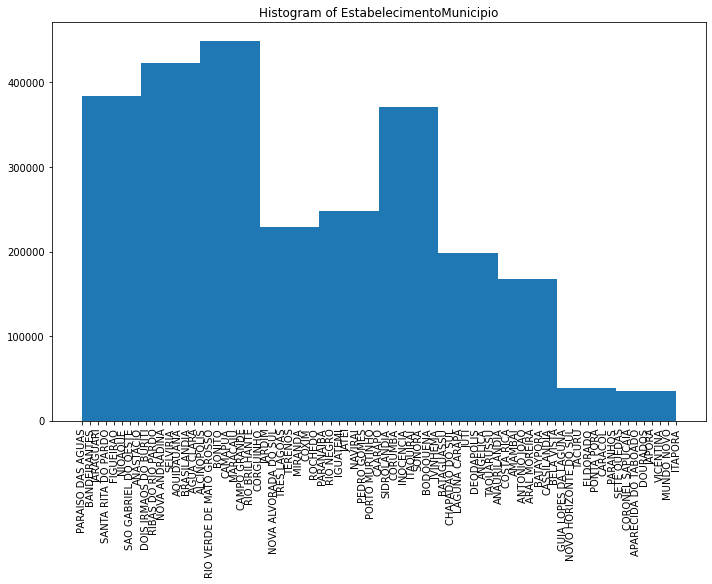

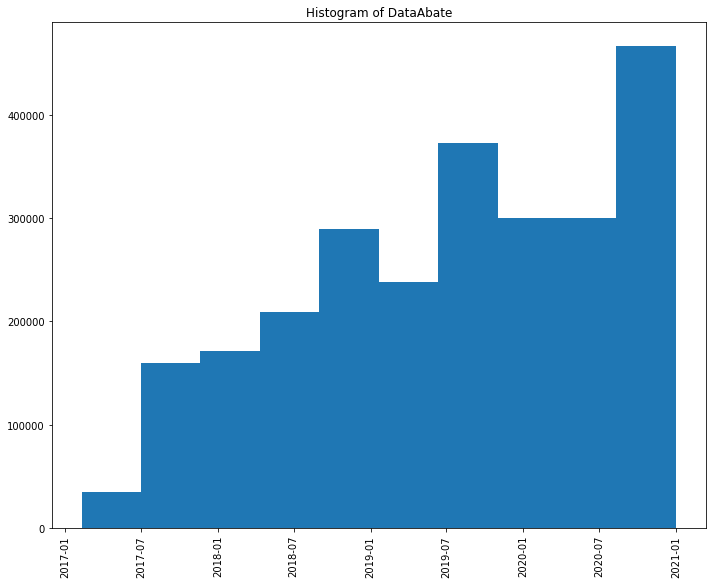

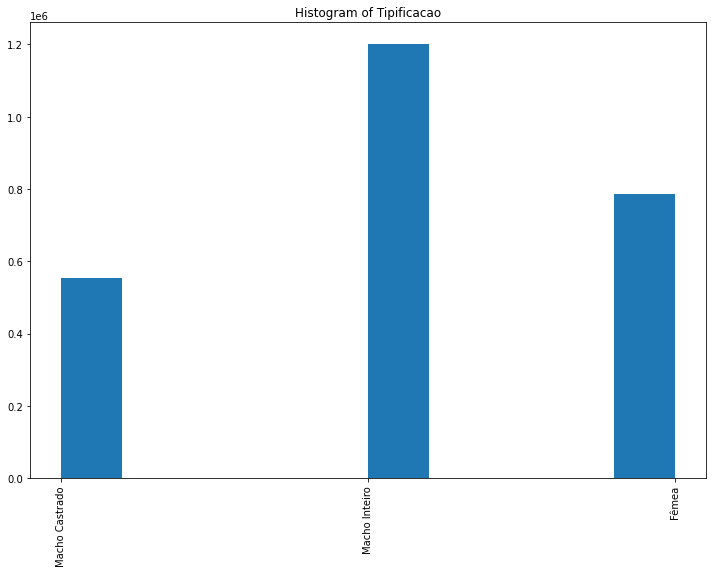

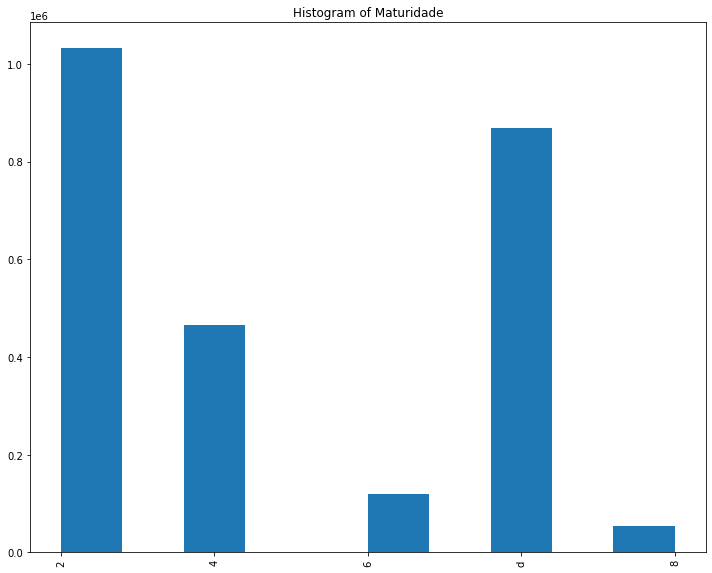

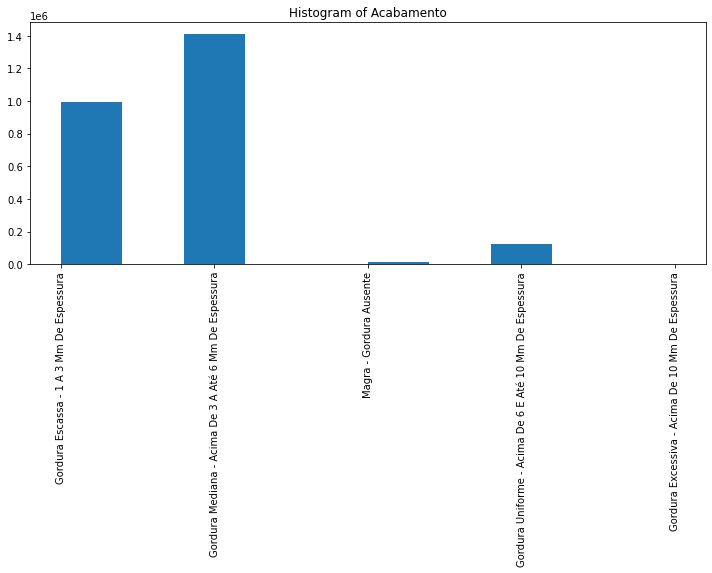

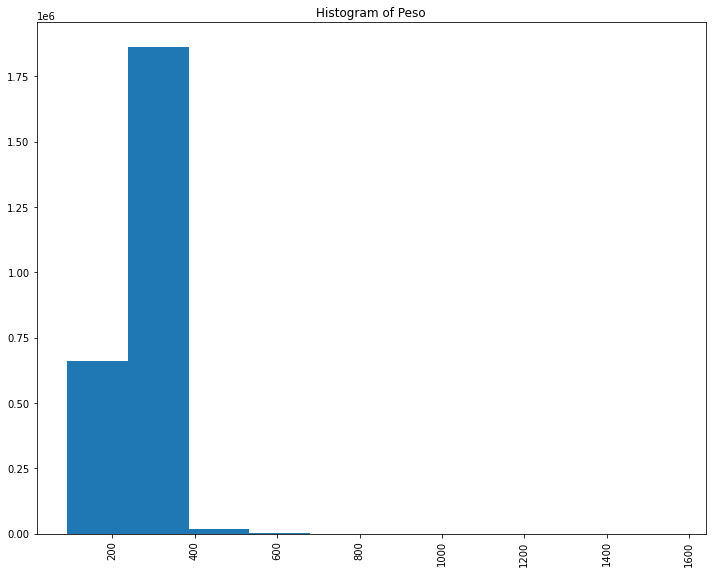

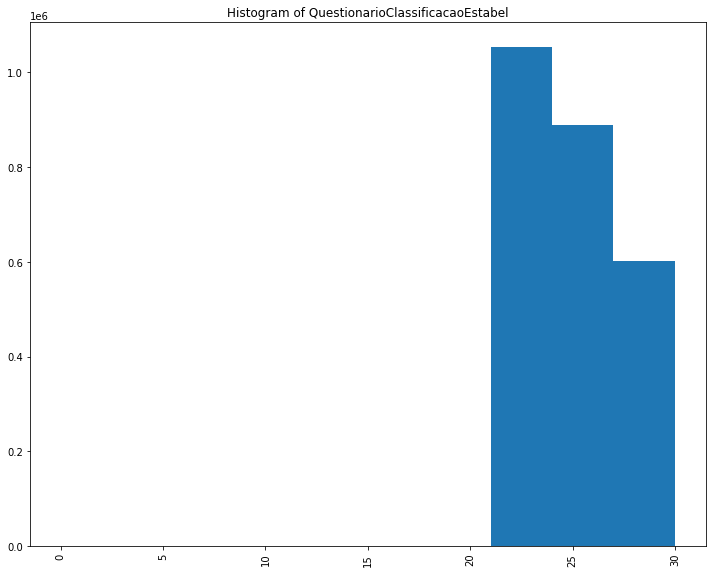

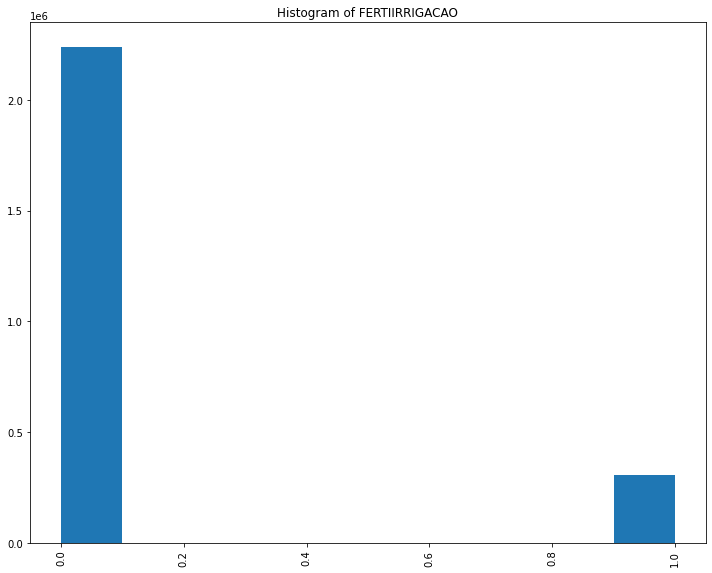

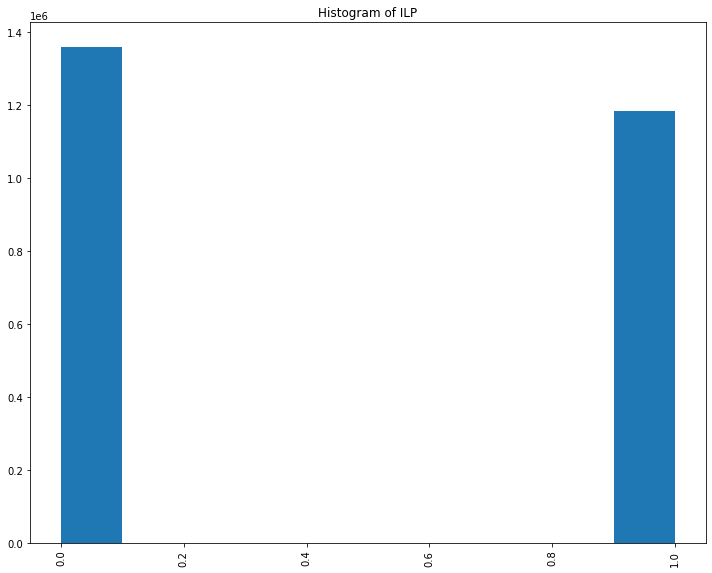

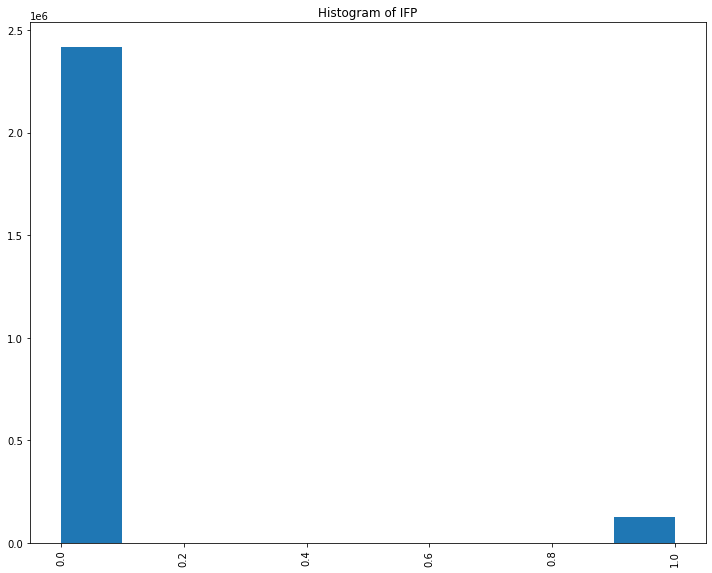

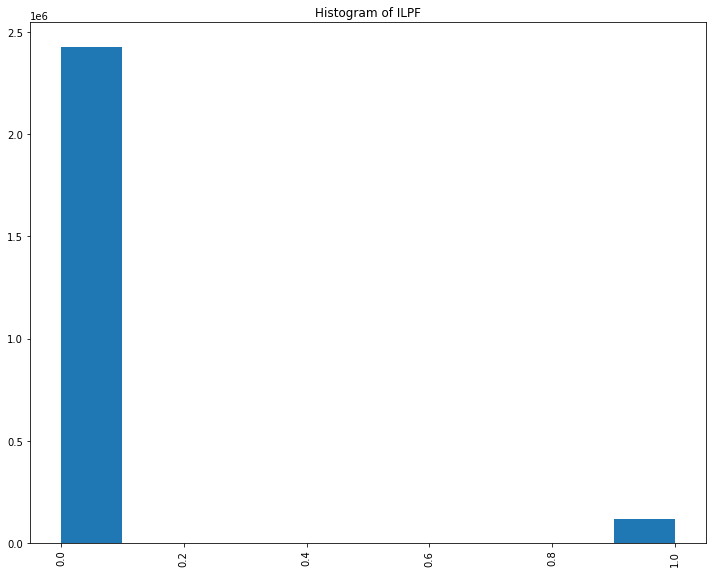

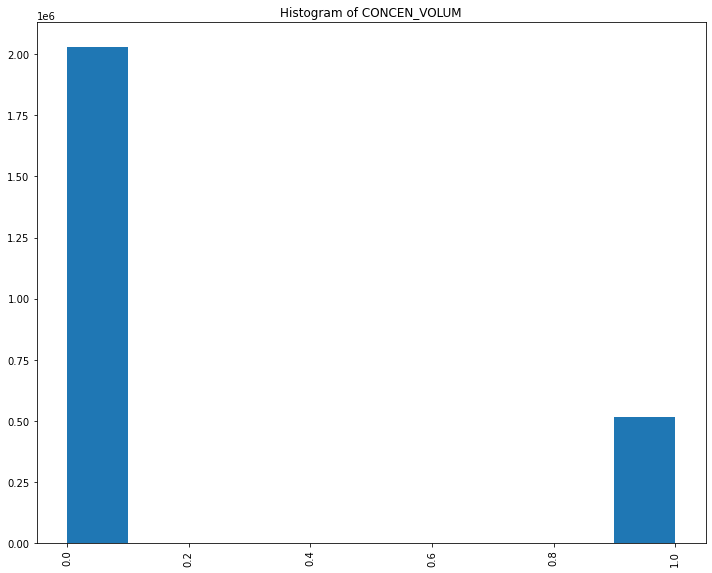

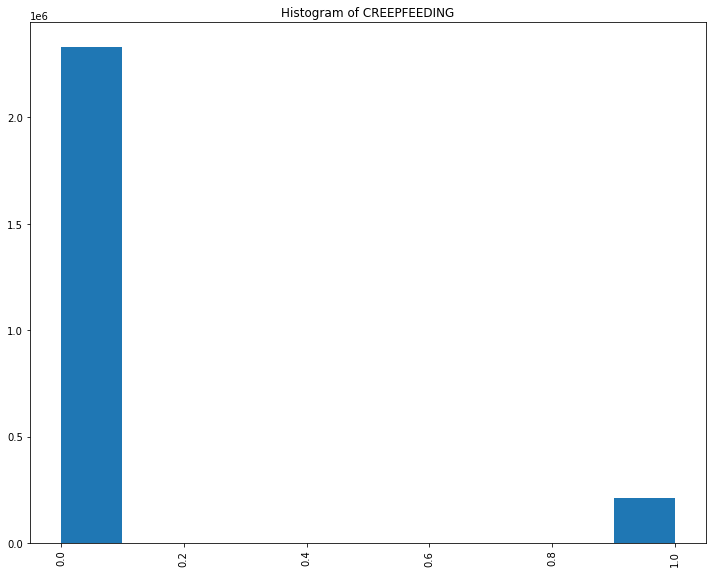

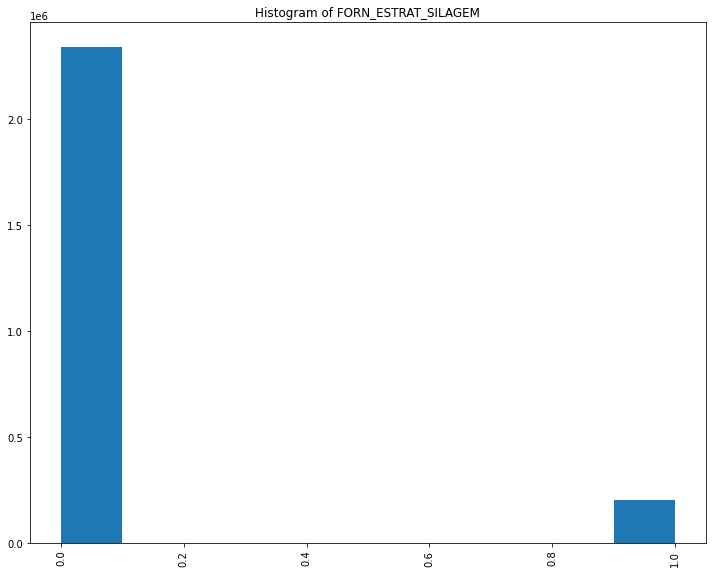

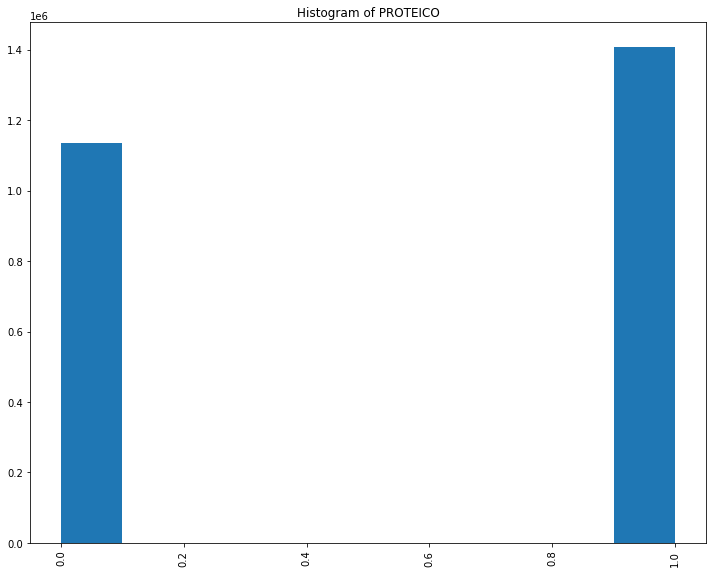

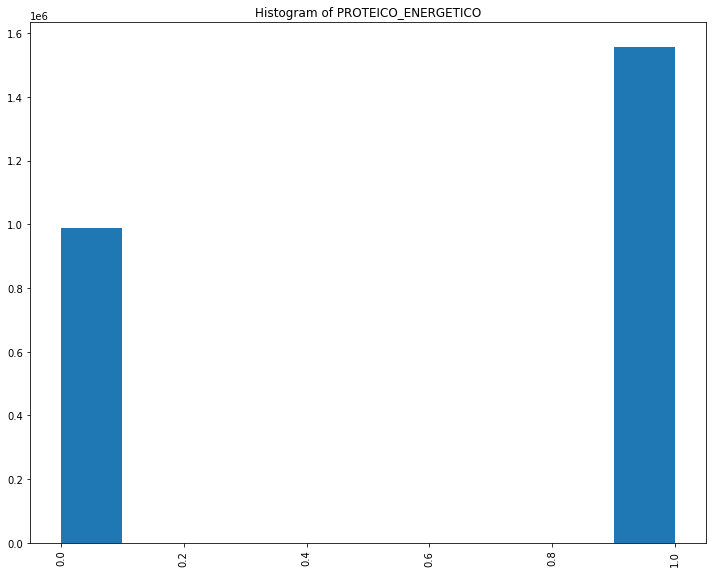

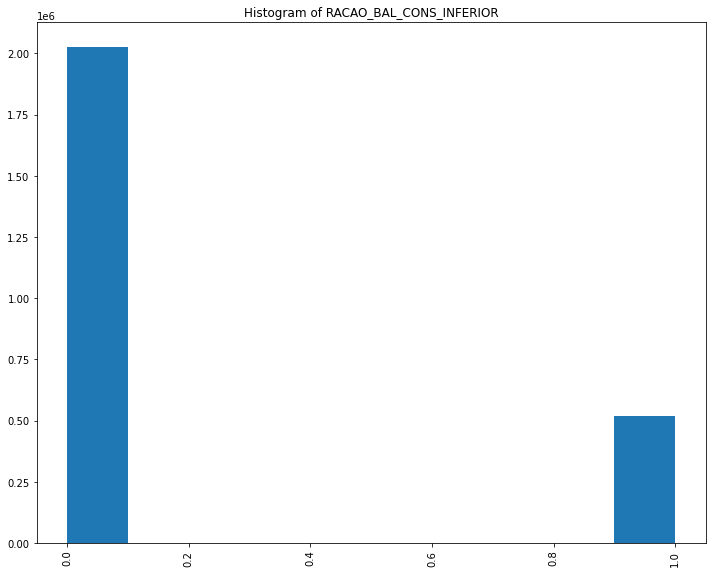

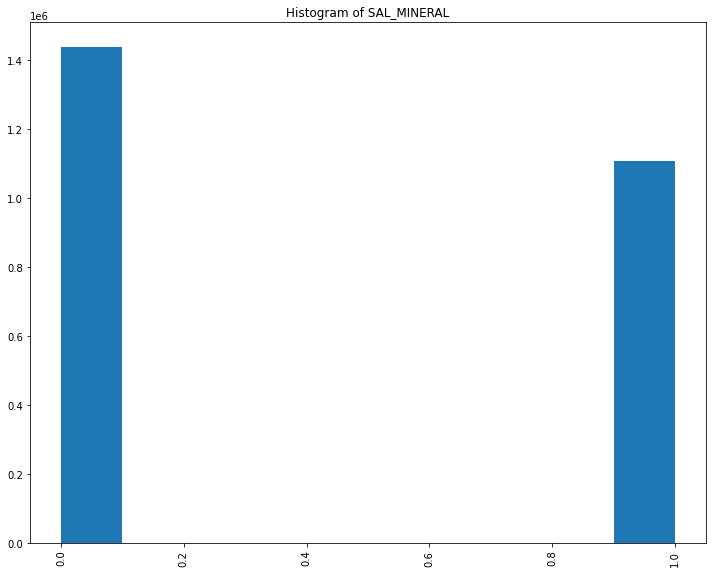

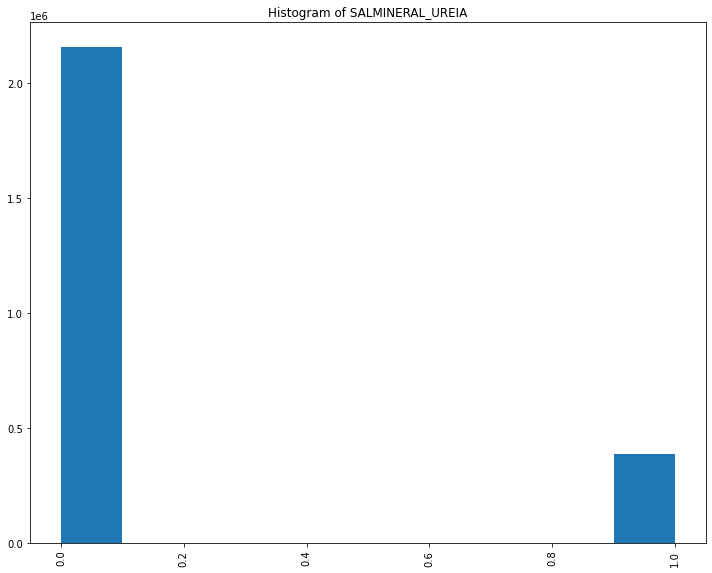

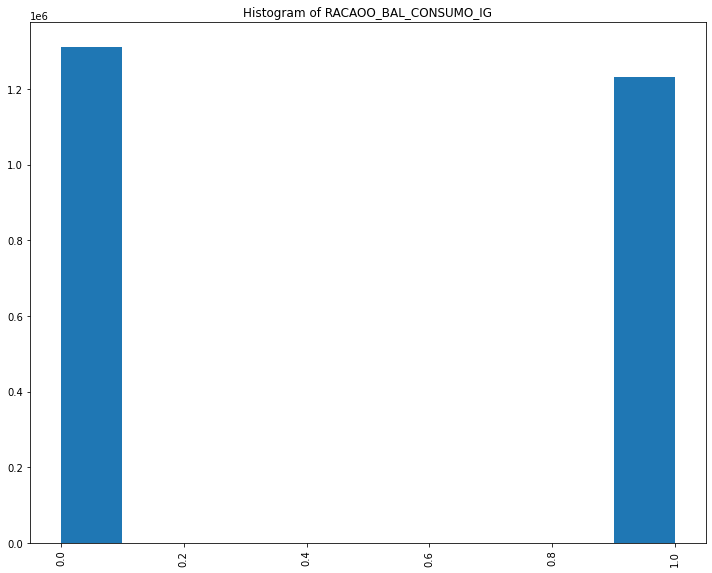

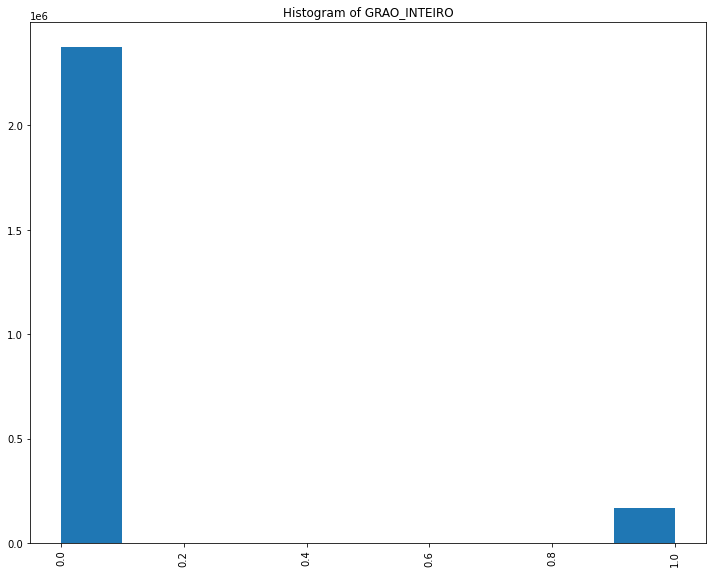

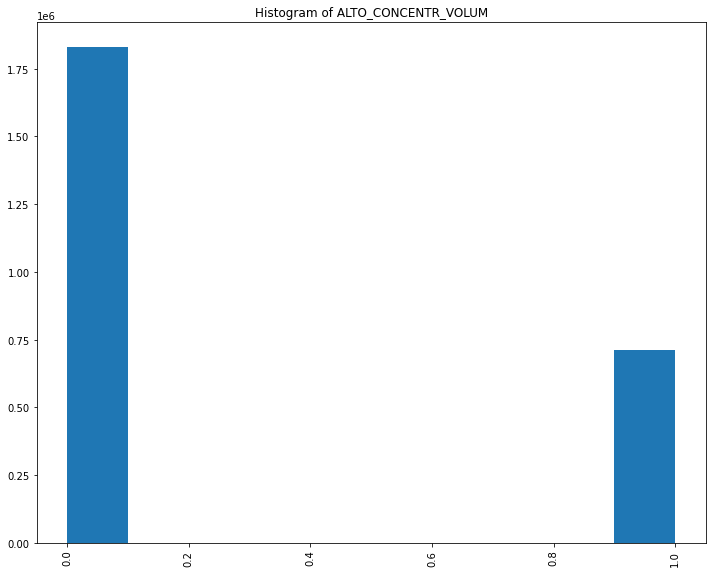

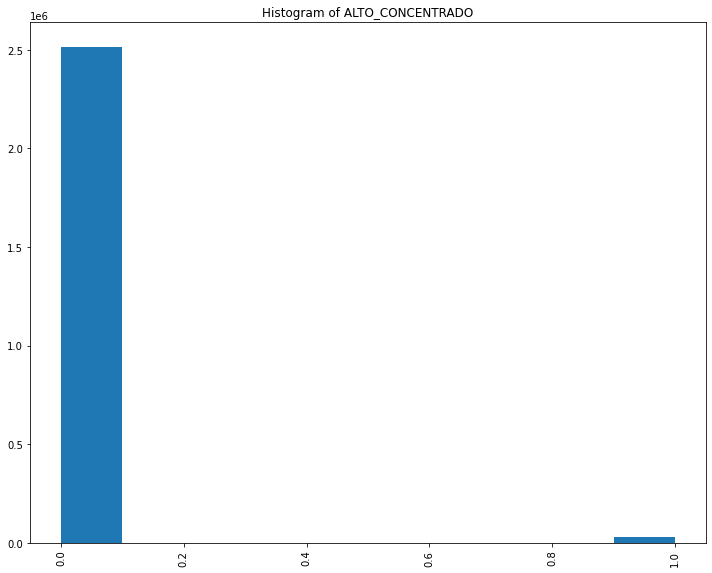

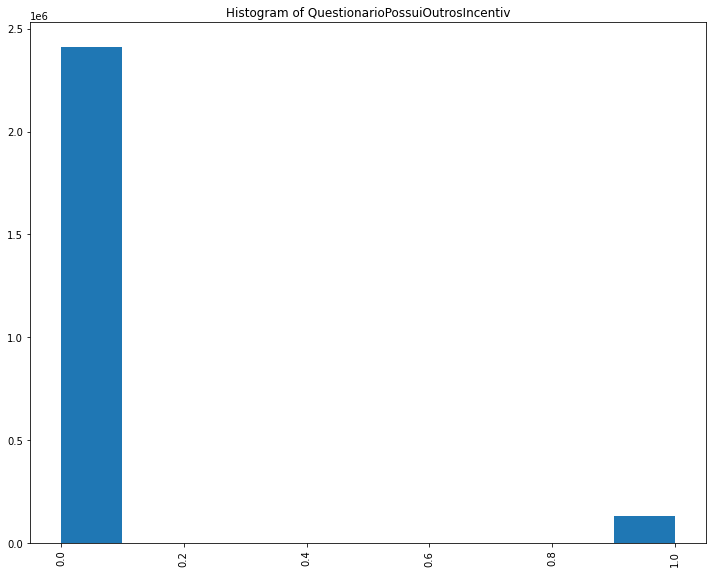

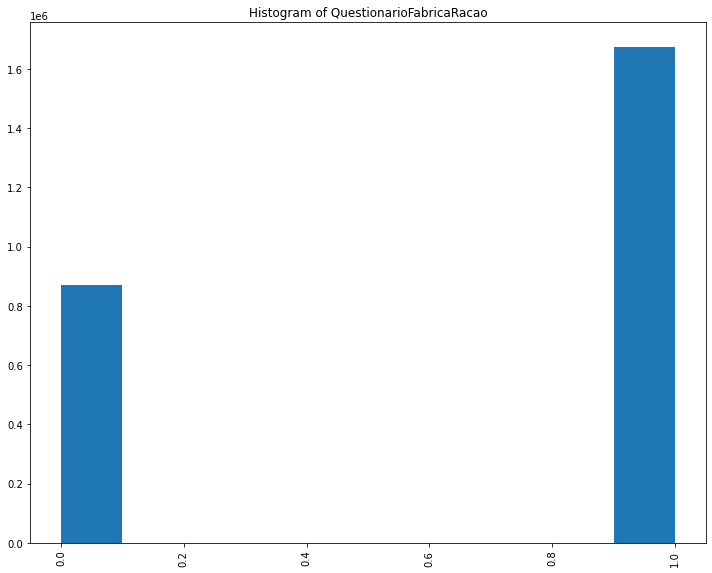

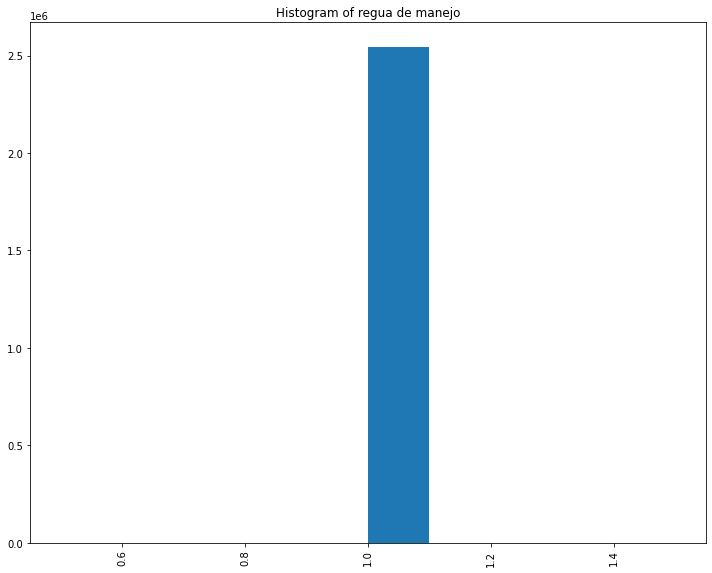

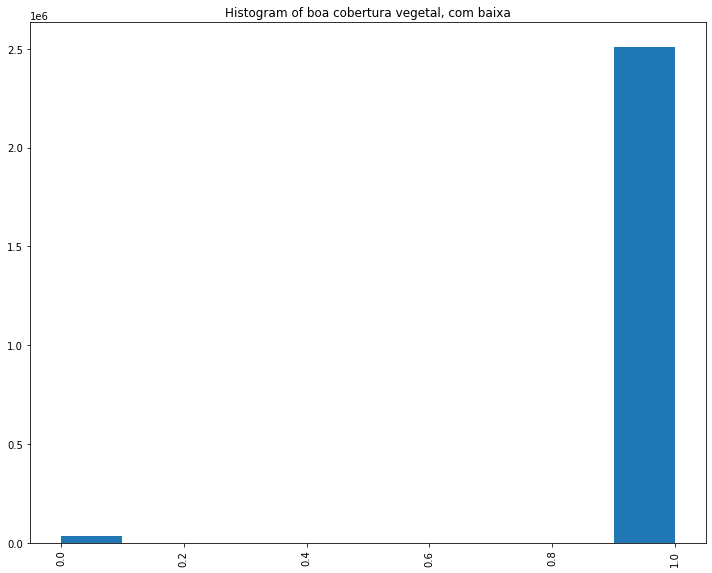

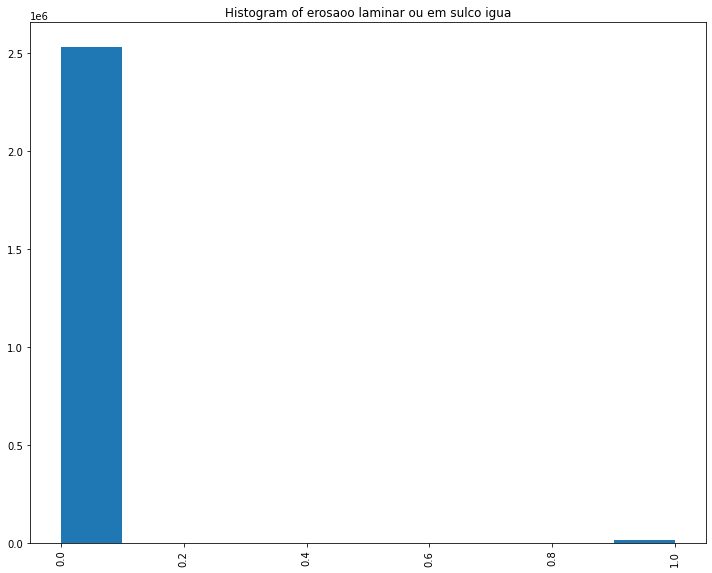

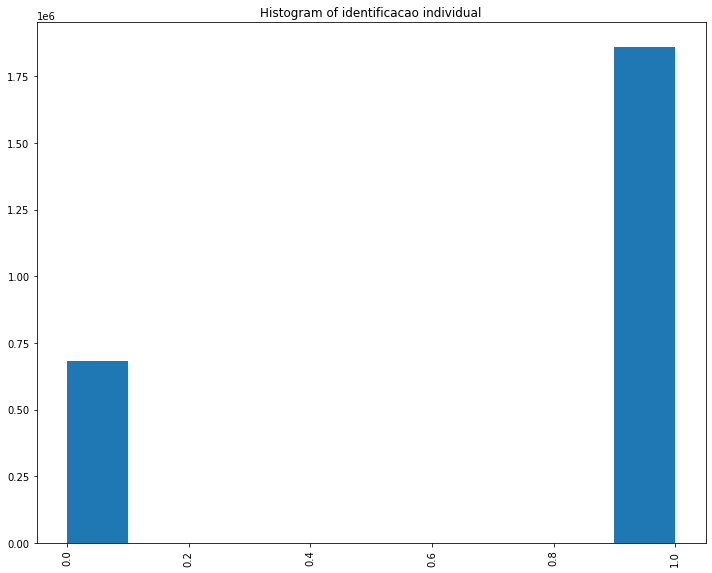

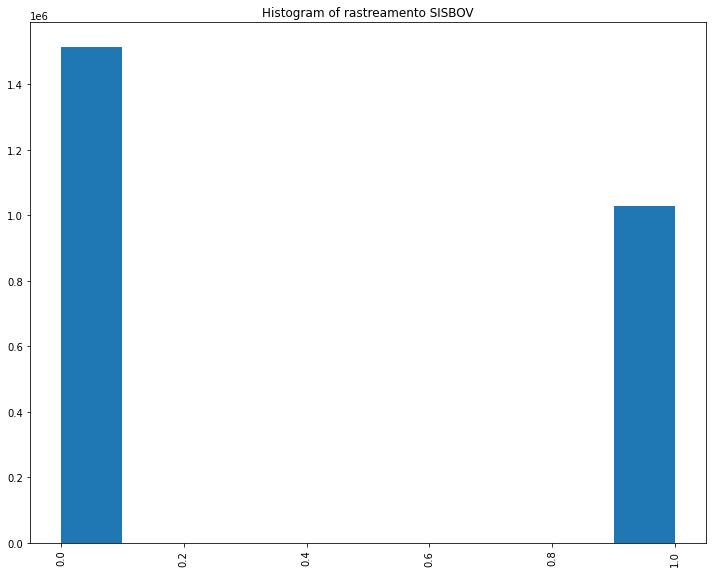

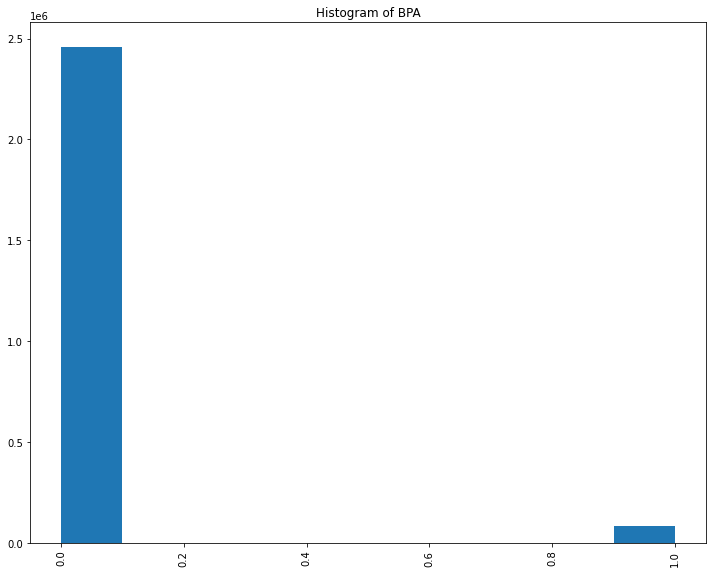

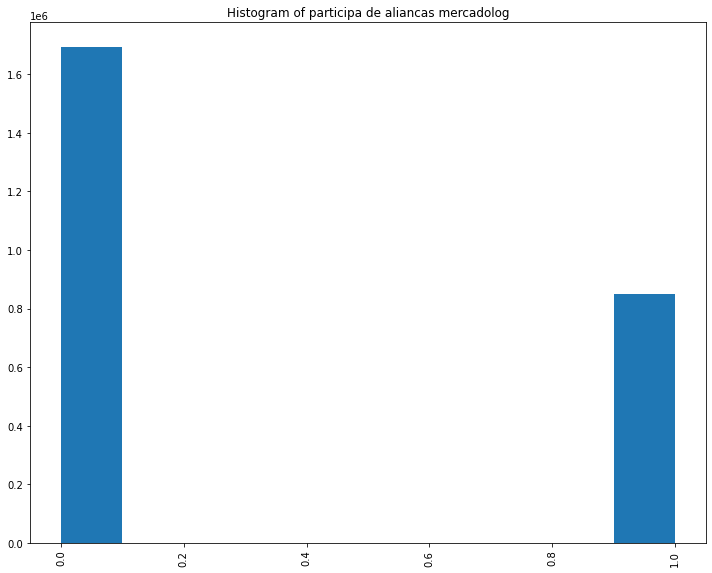

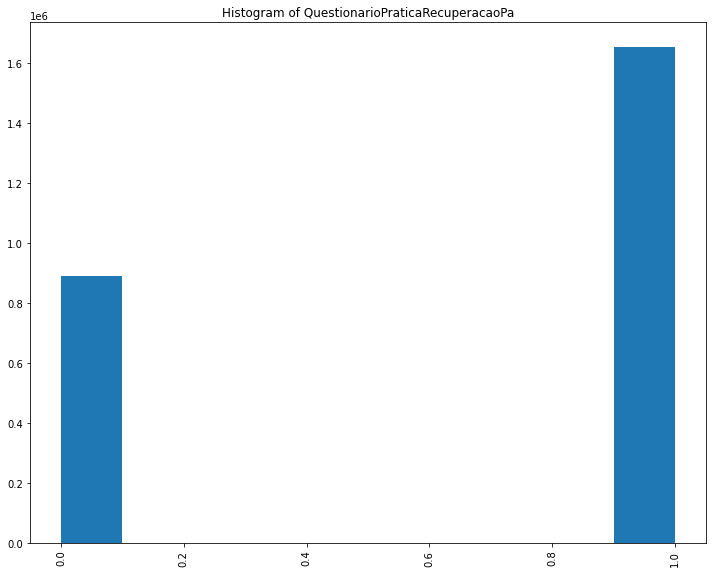

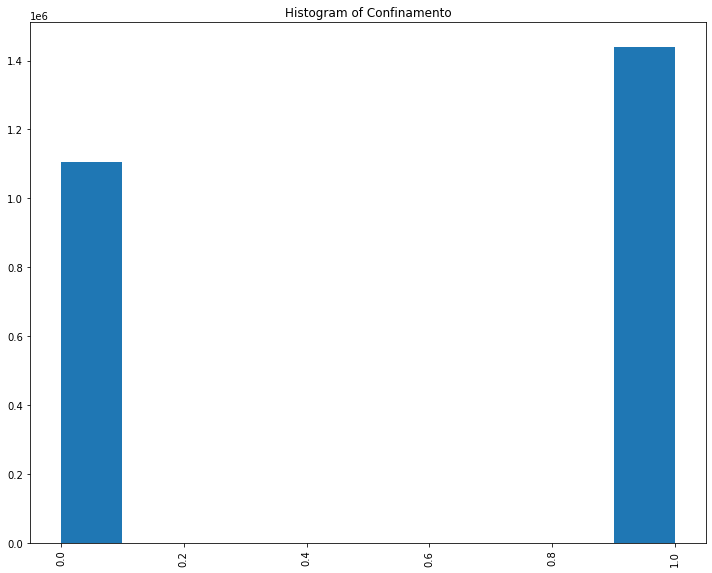

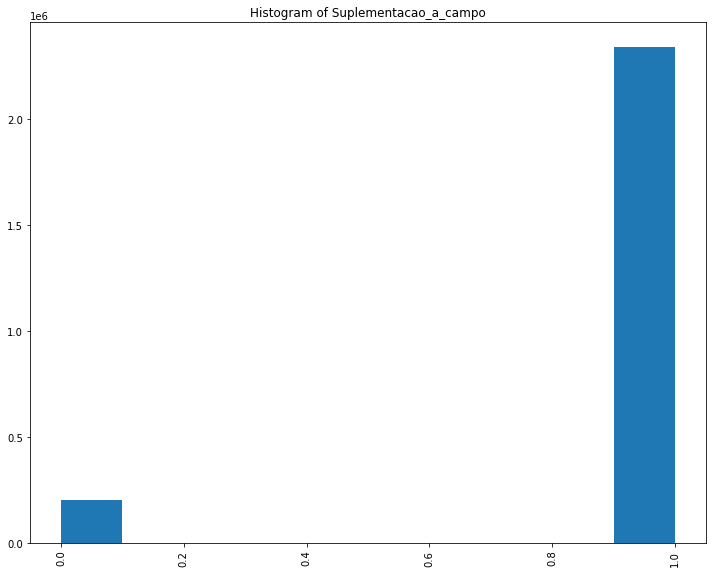

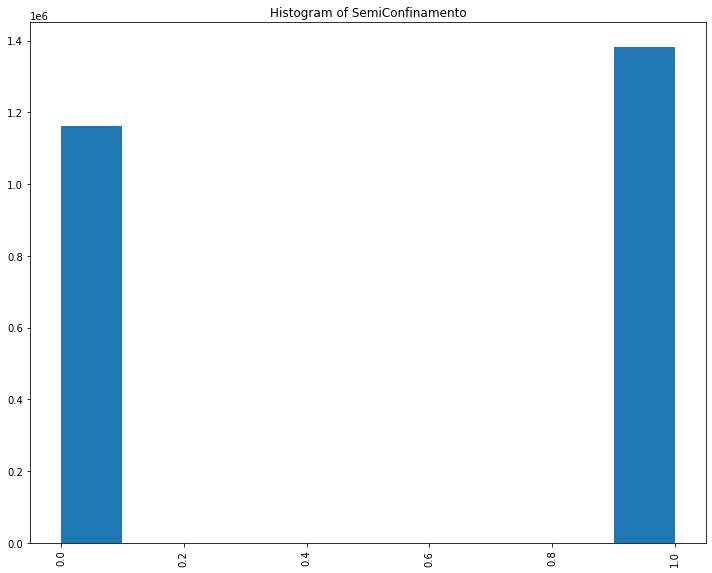

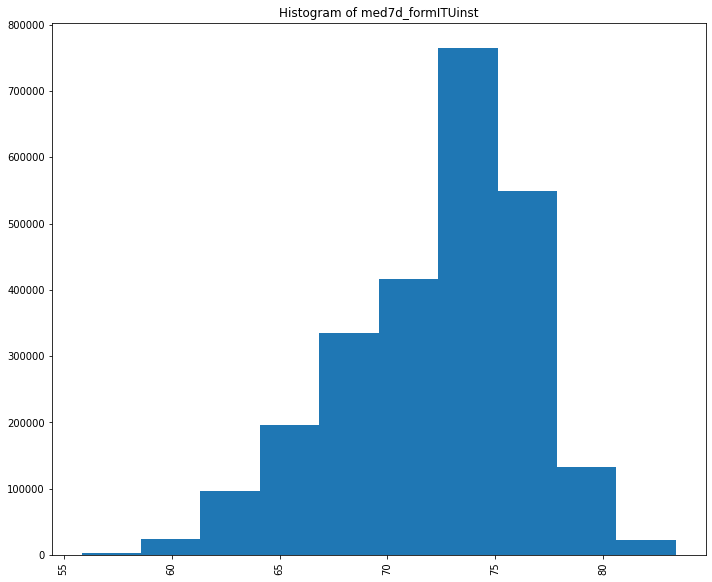

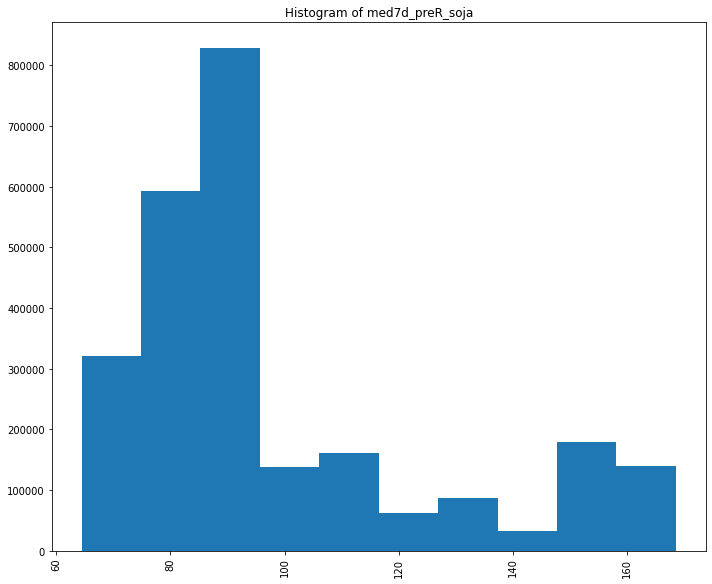

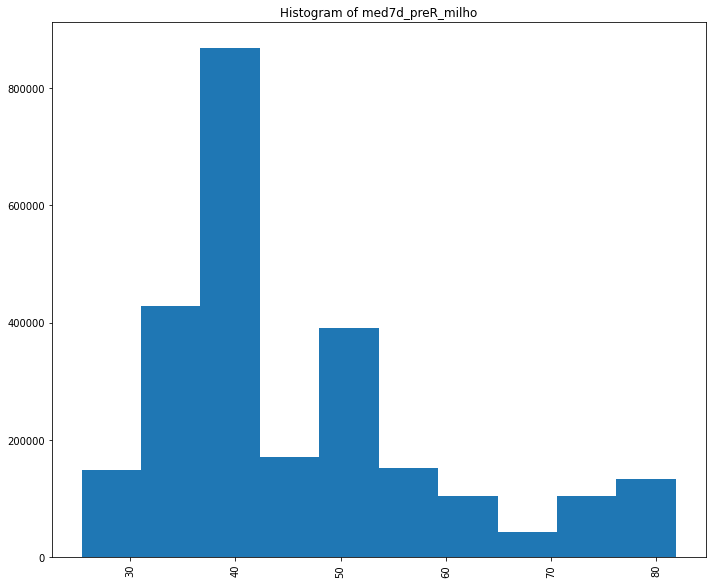

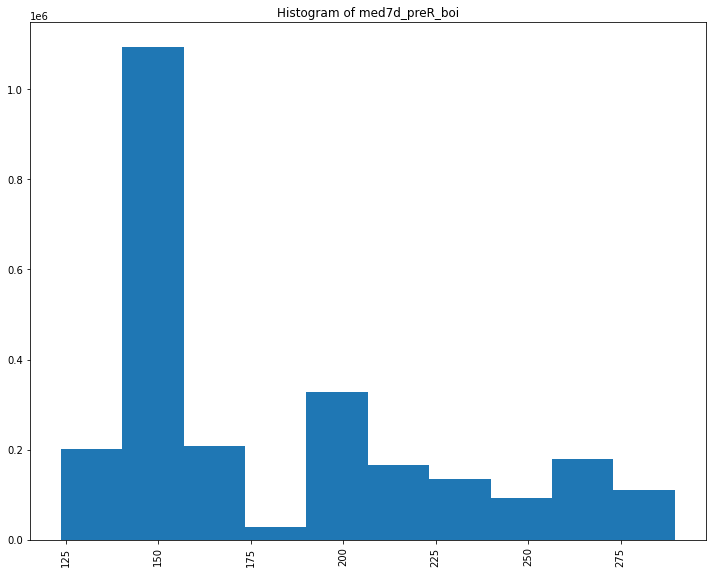

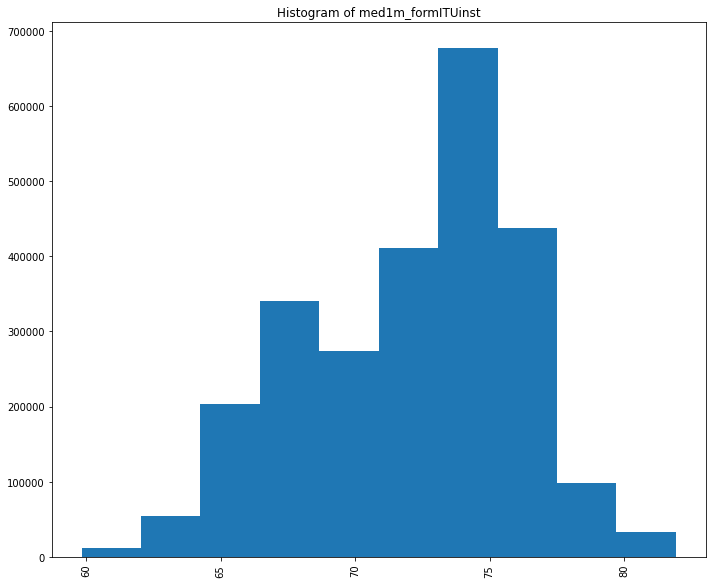

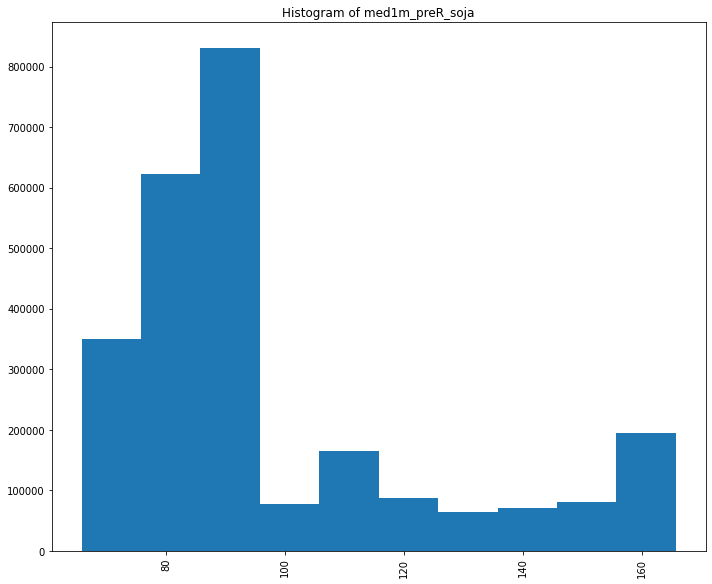

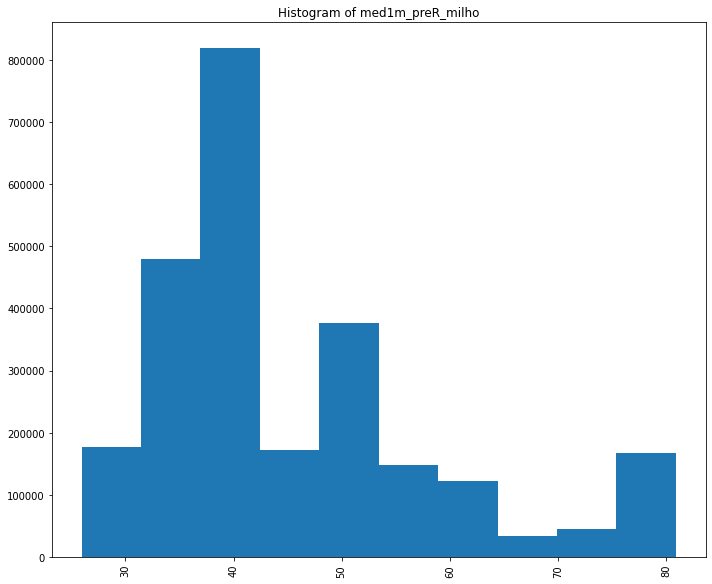

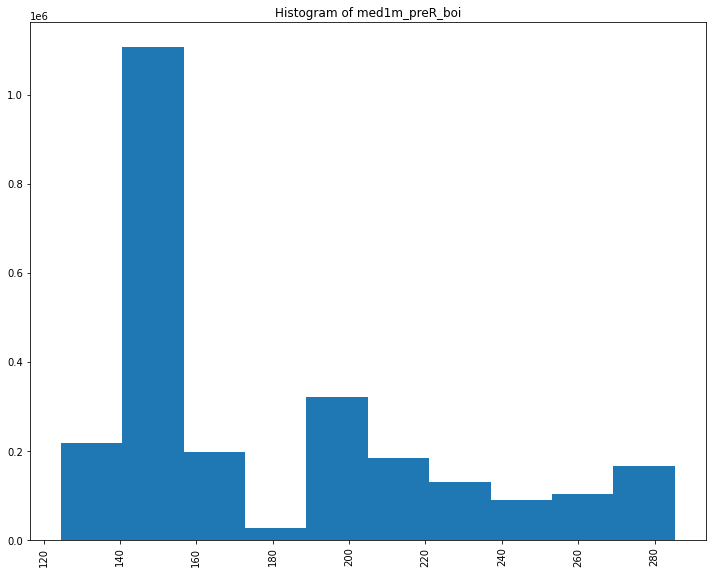

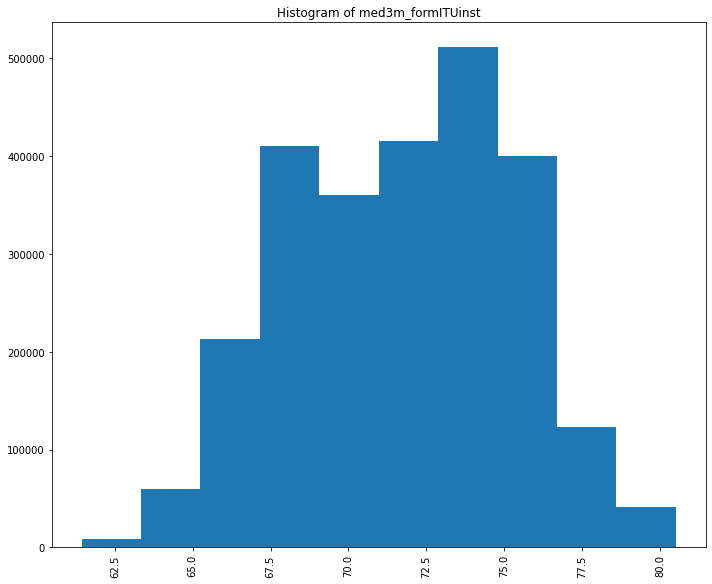

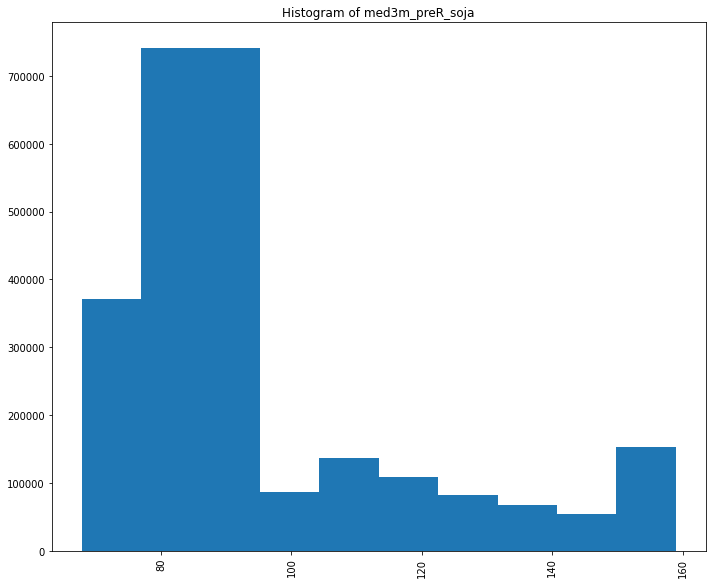

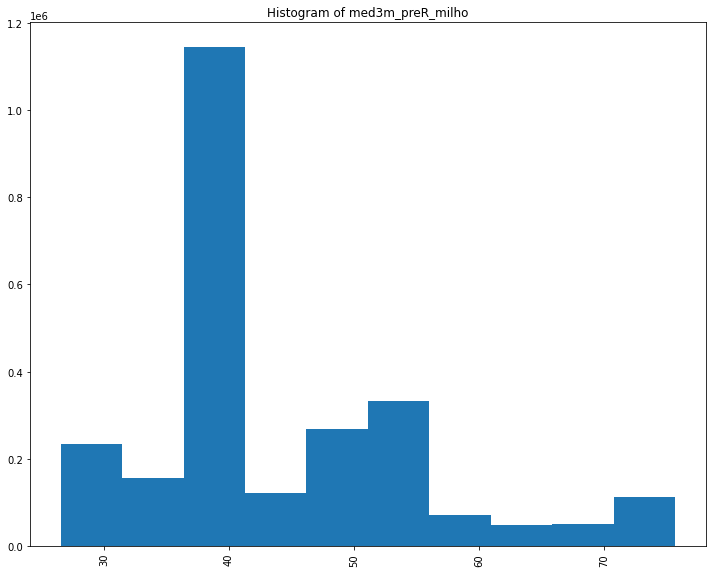

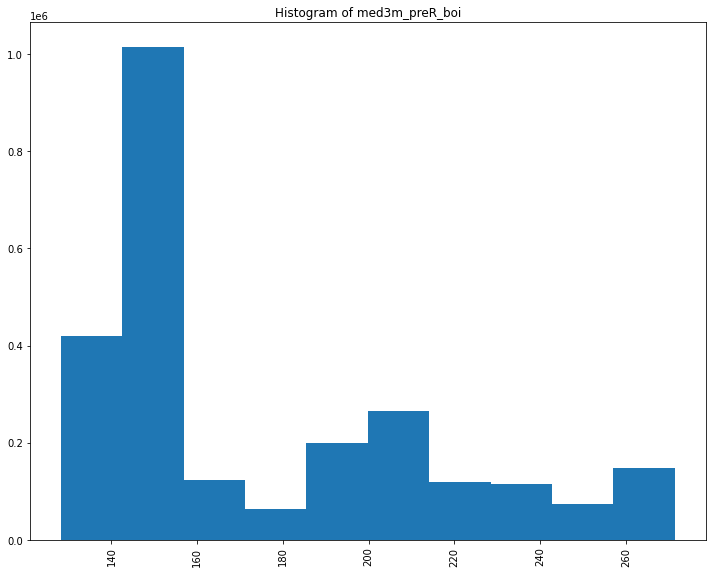

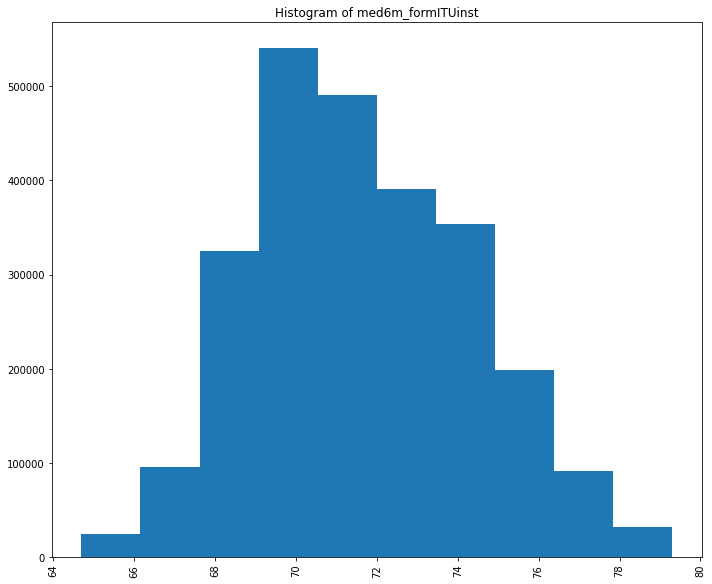

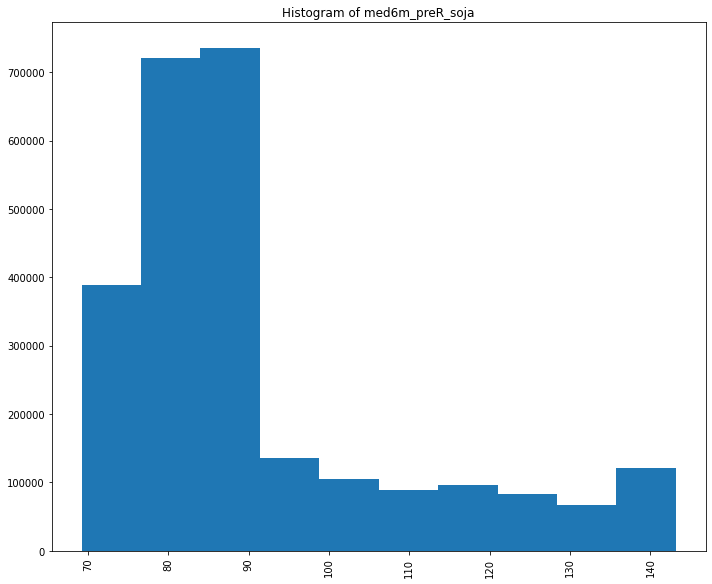

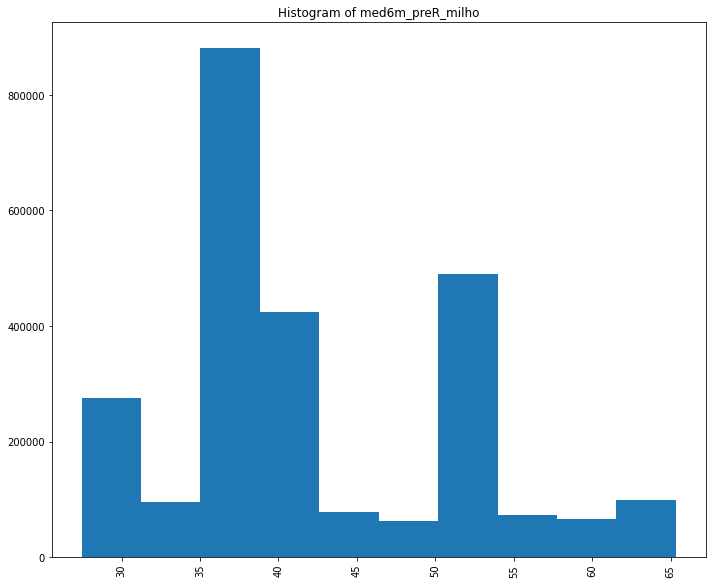

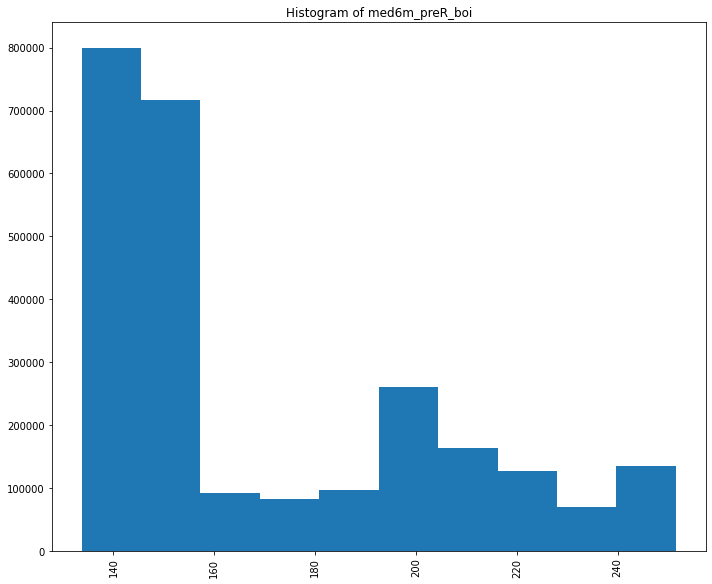

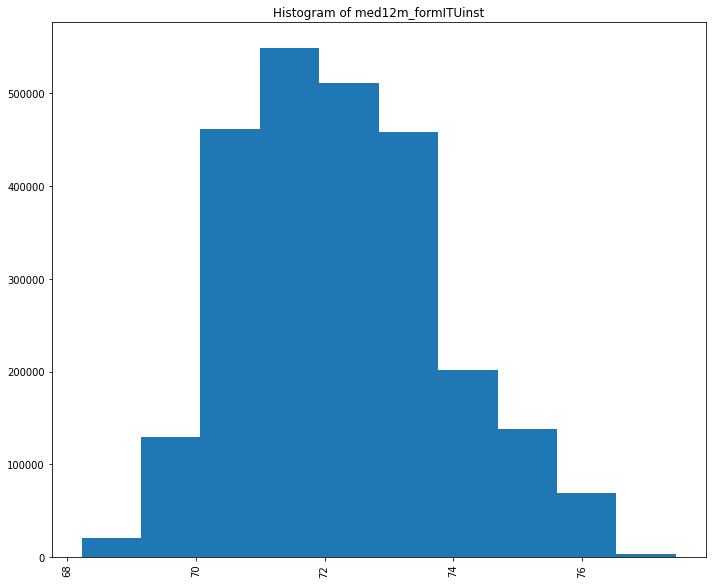

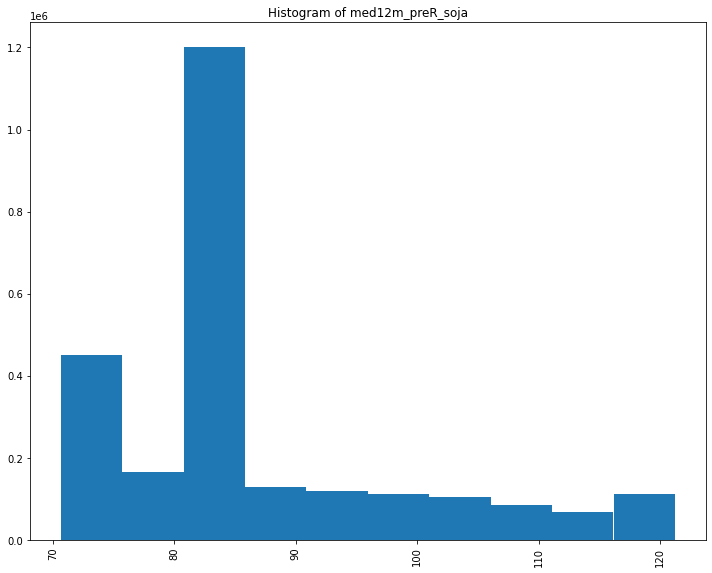

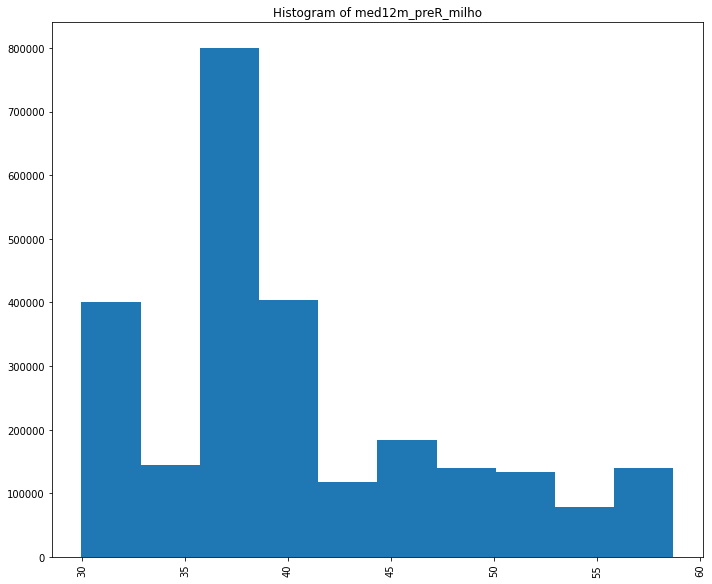

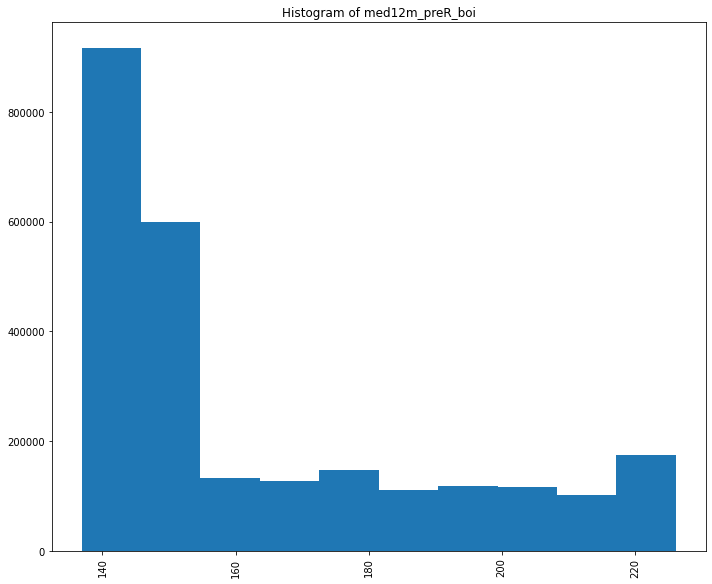

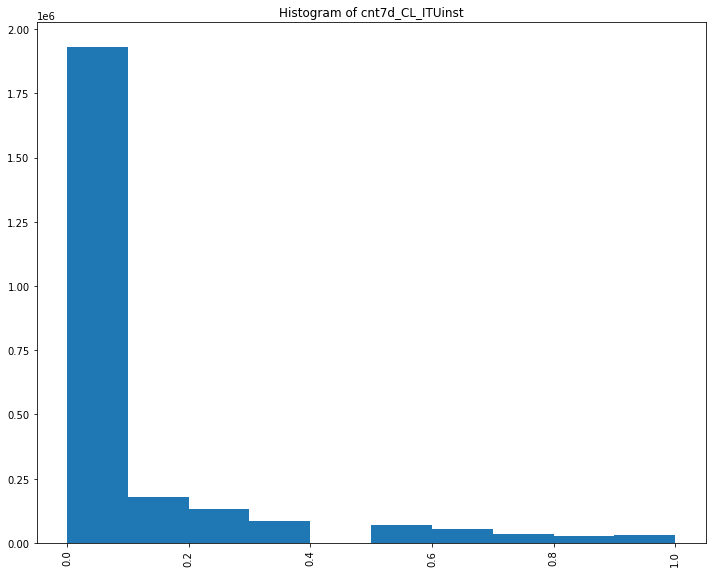

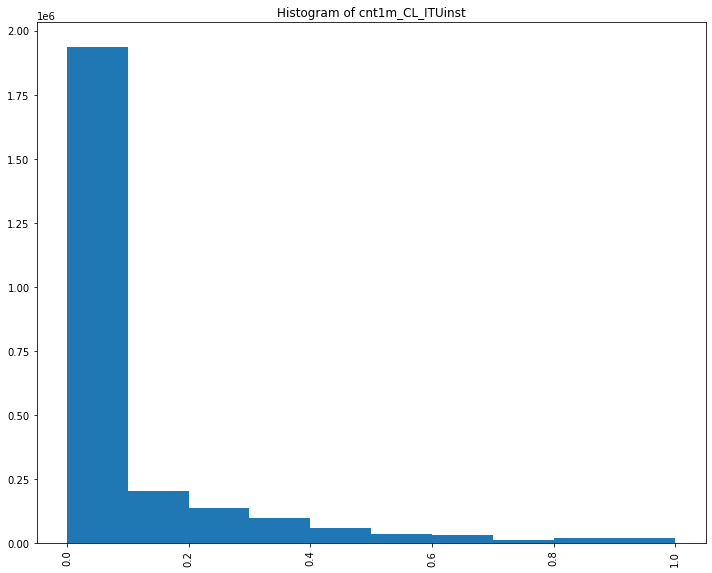

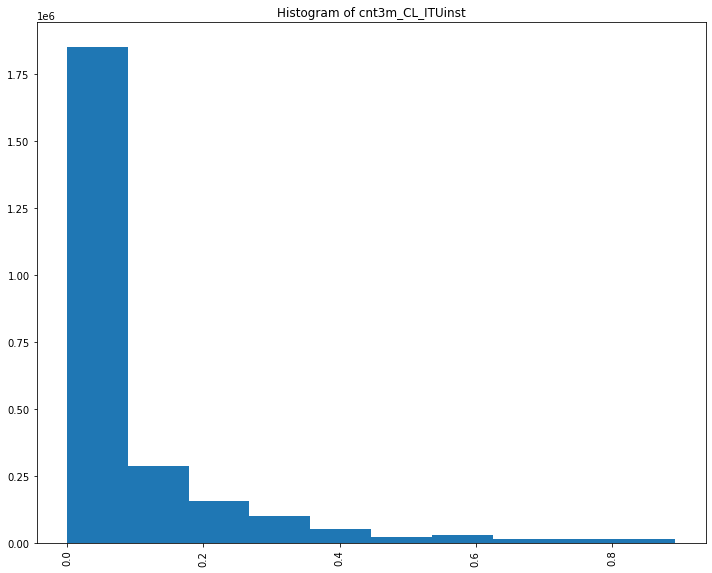

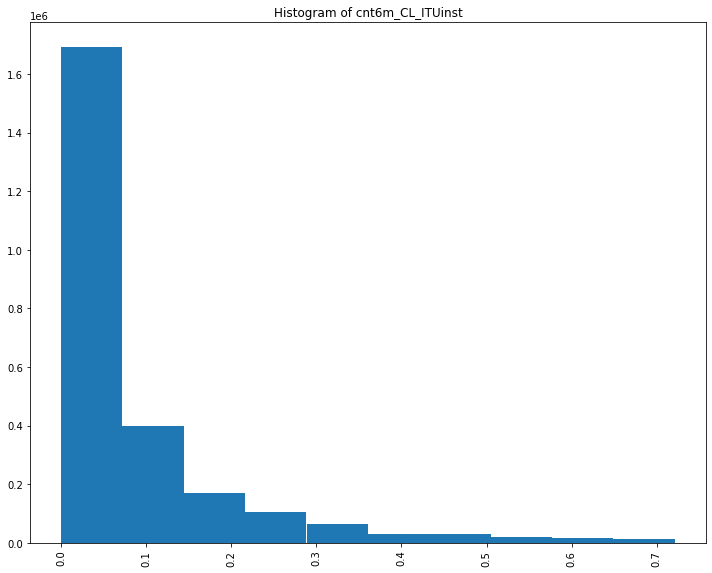

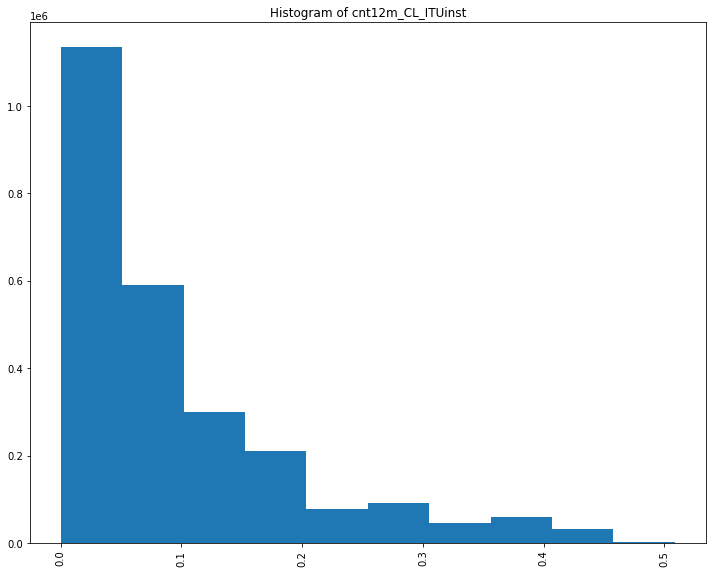

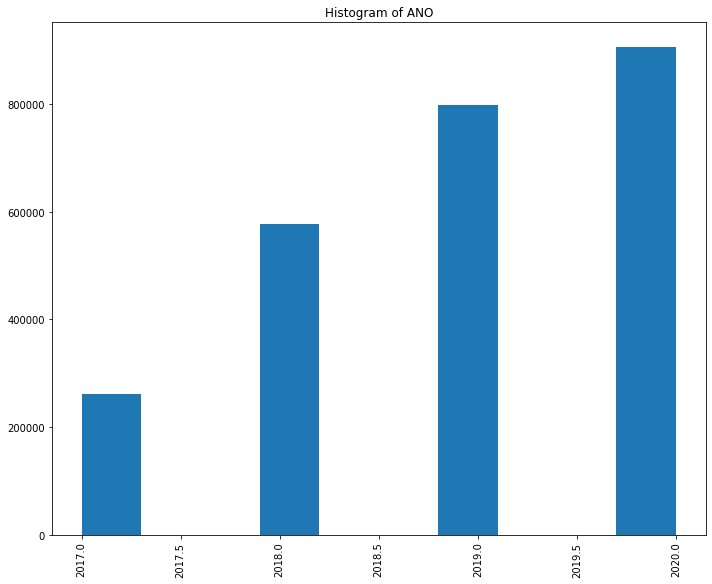

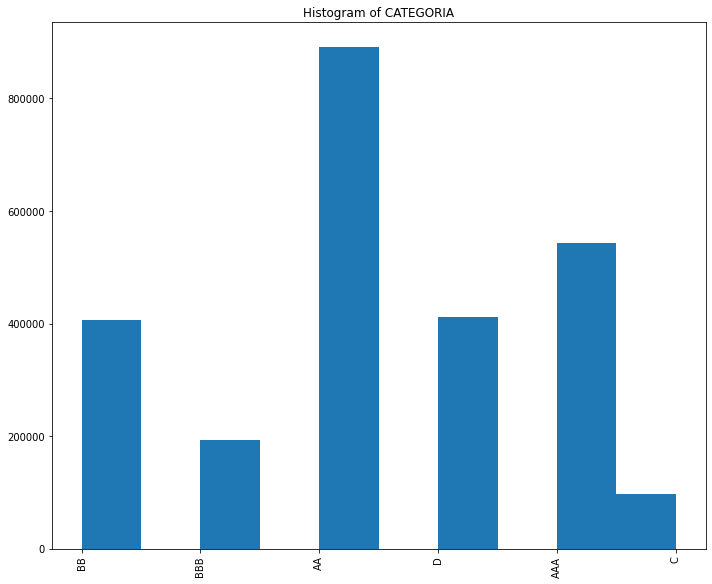

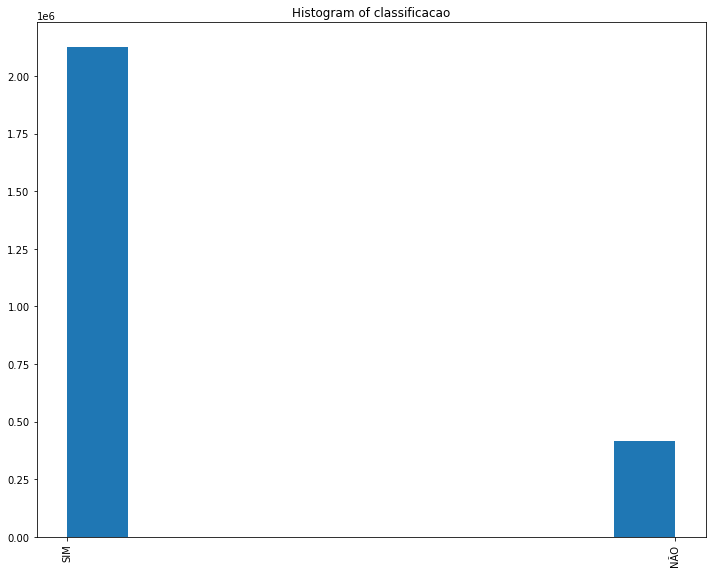



*****FIM IMPRIMIR HISTOGRAM******


In [ ]:
# Print histogram for each attribute
reports.histogram(
    data_frame=precoce_ms_data_frame
)

## Print histogram for each attribute grouped by target class


*****INICIO IMPRIMIR HISTOGRAM GROUPED BY TARGET******


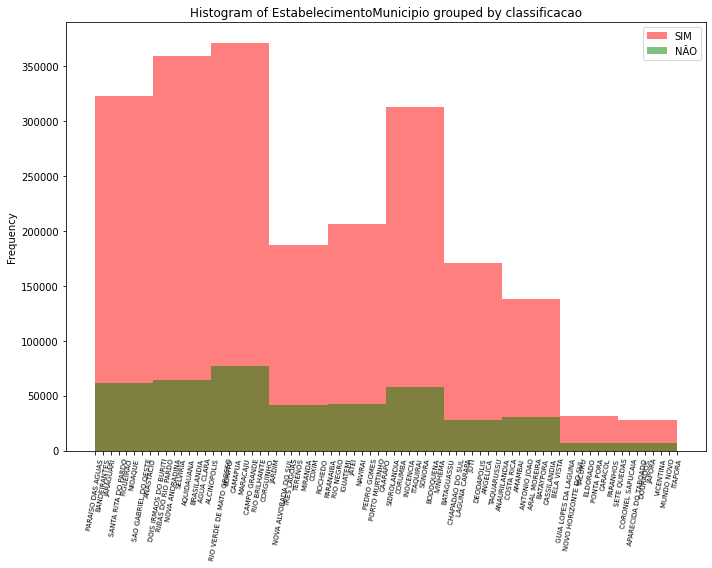

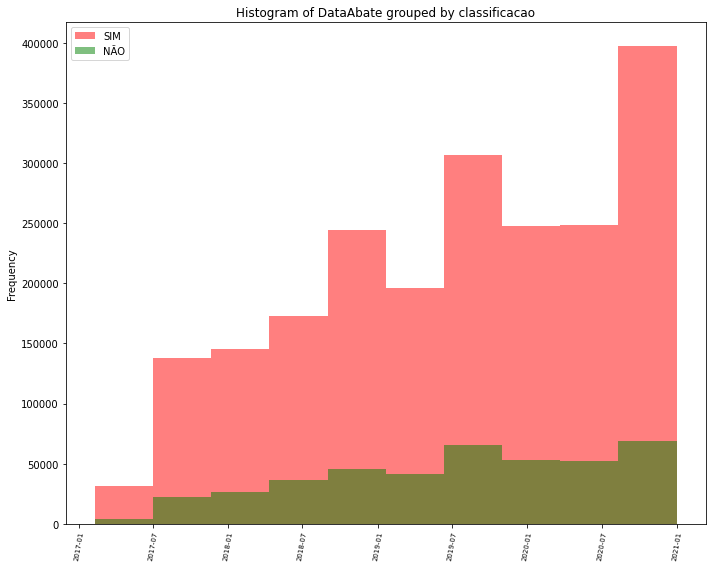

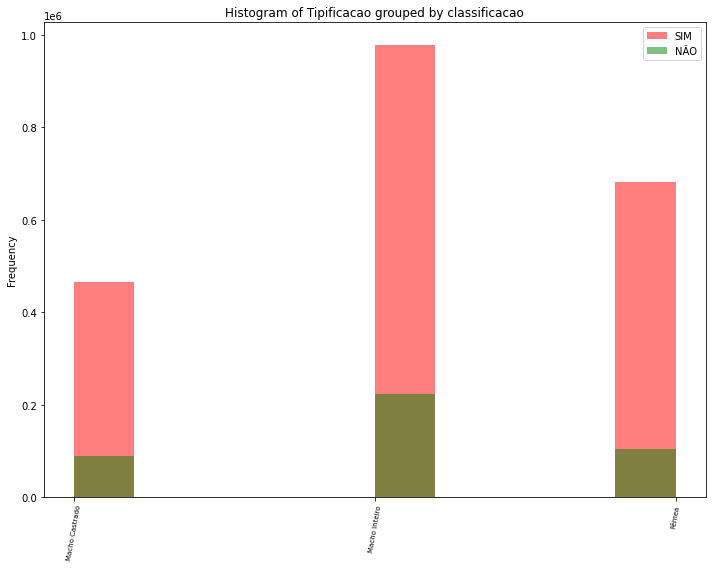

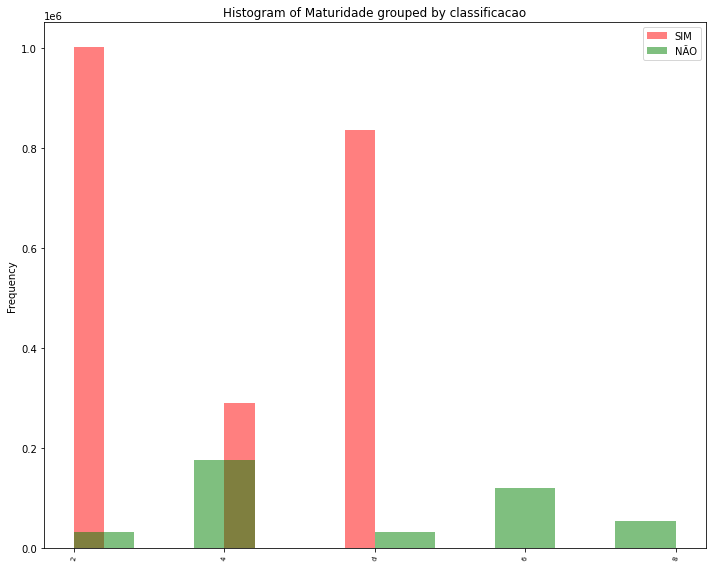

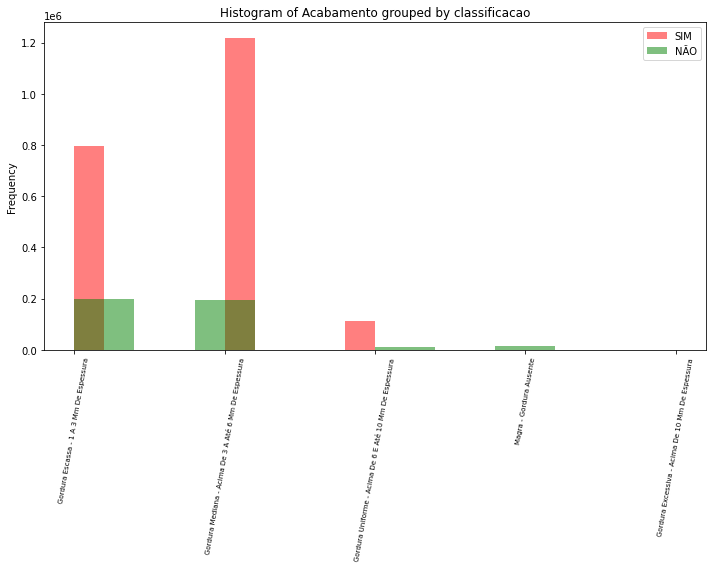

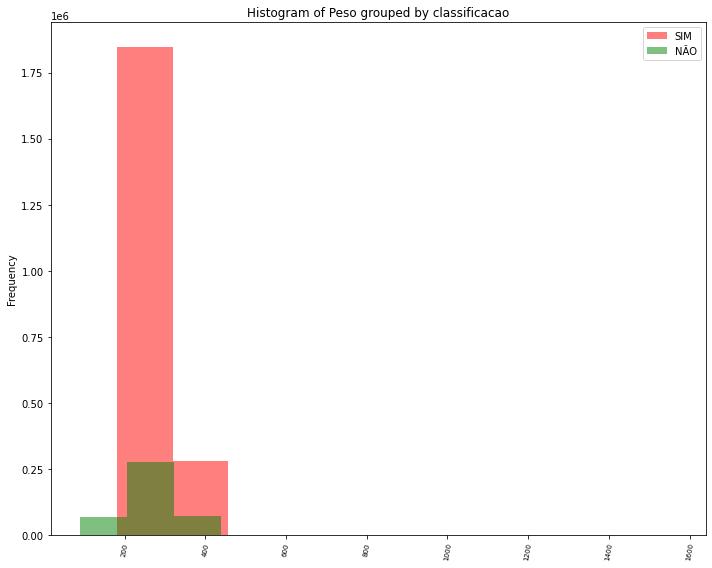

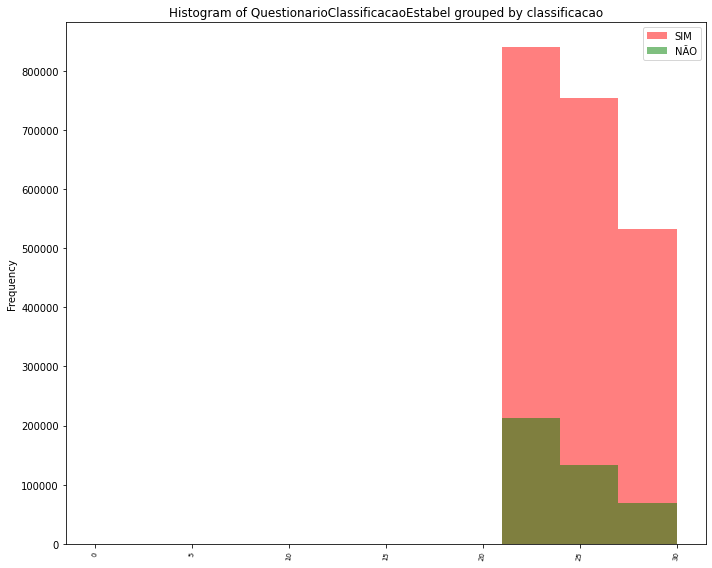

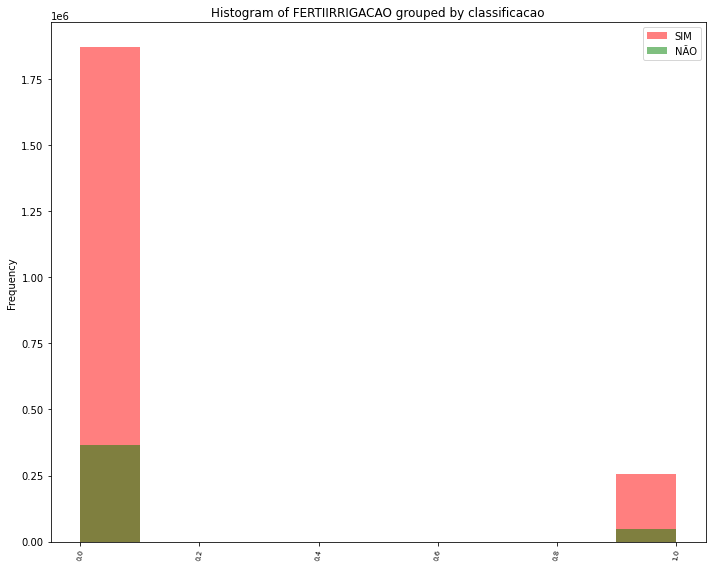

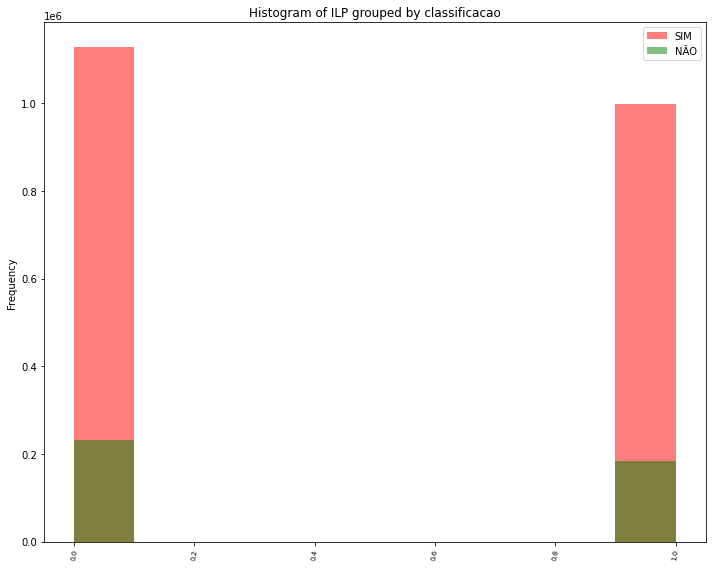

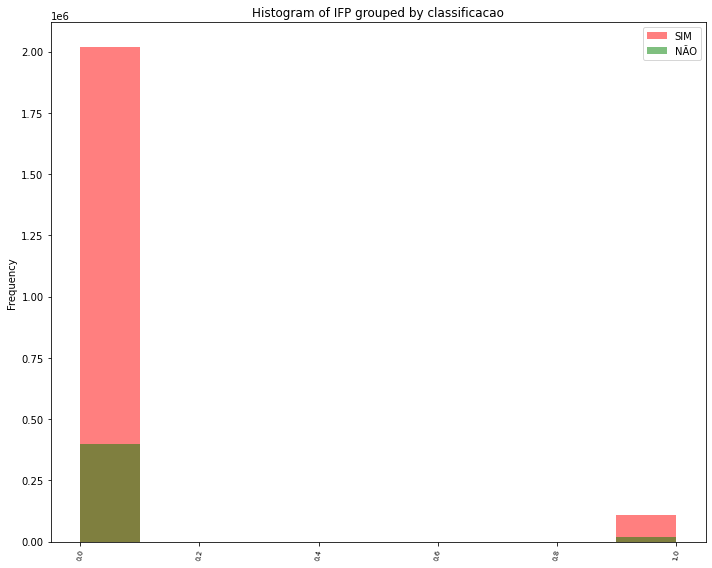

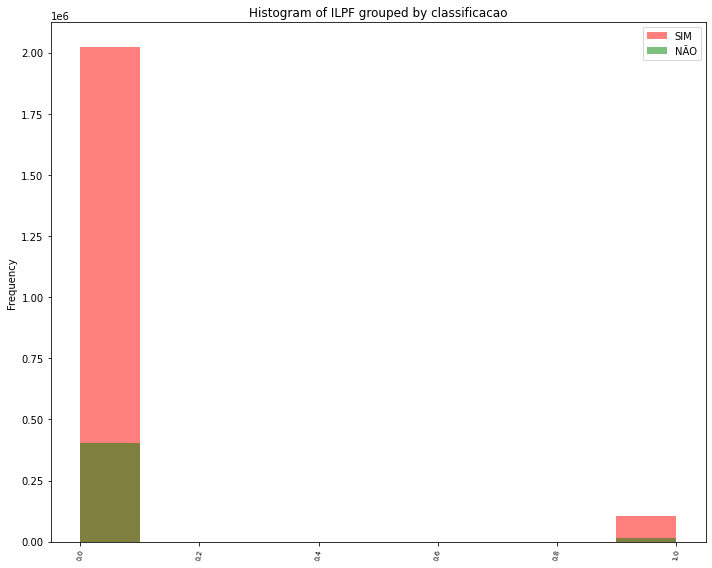

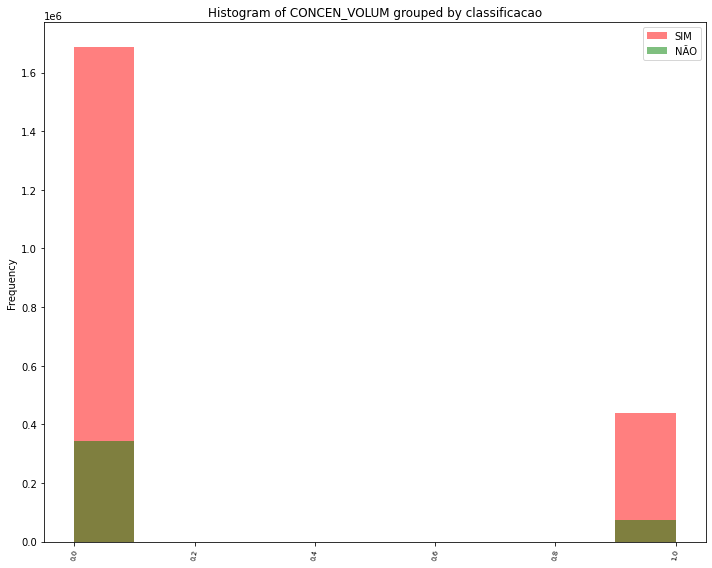

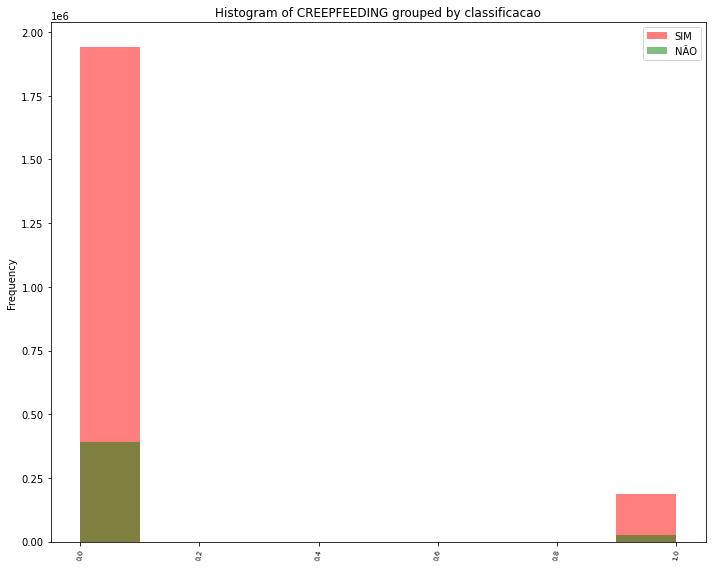

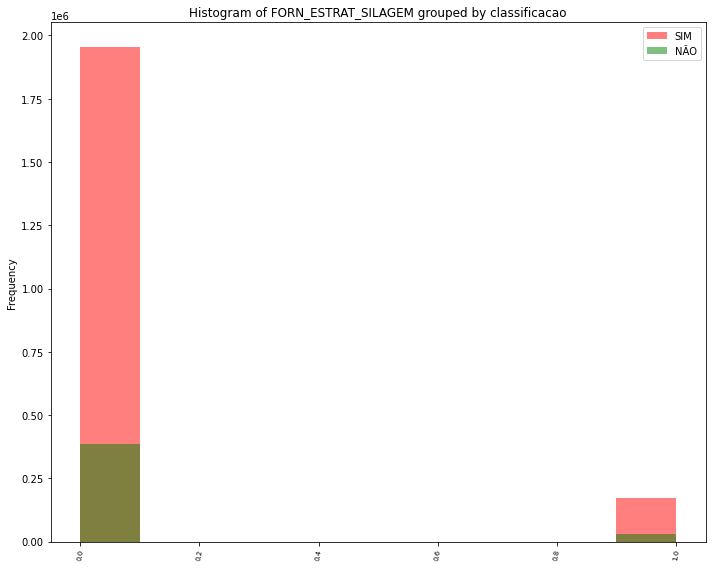

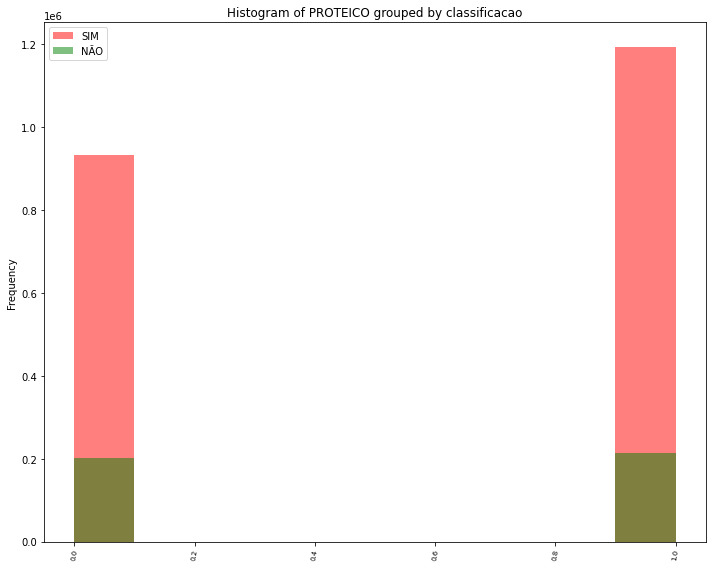

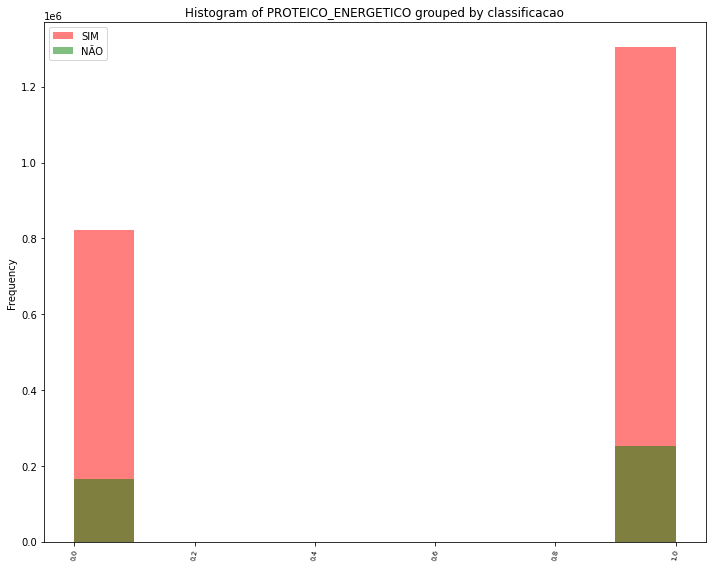

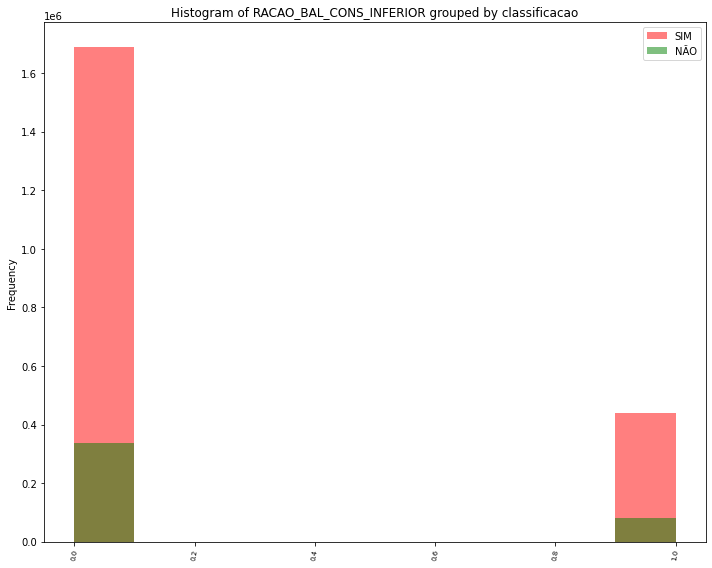

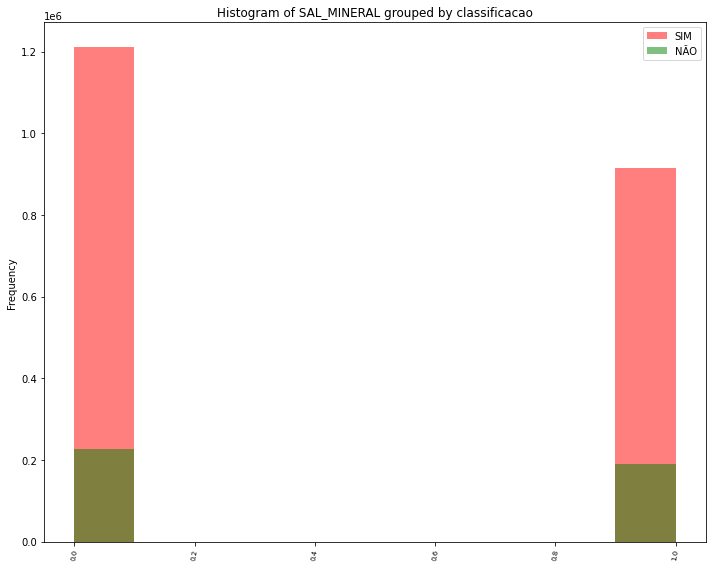

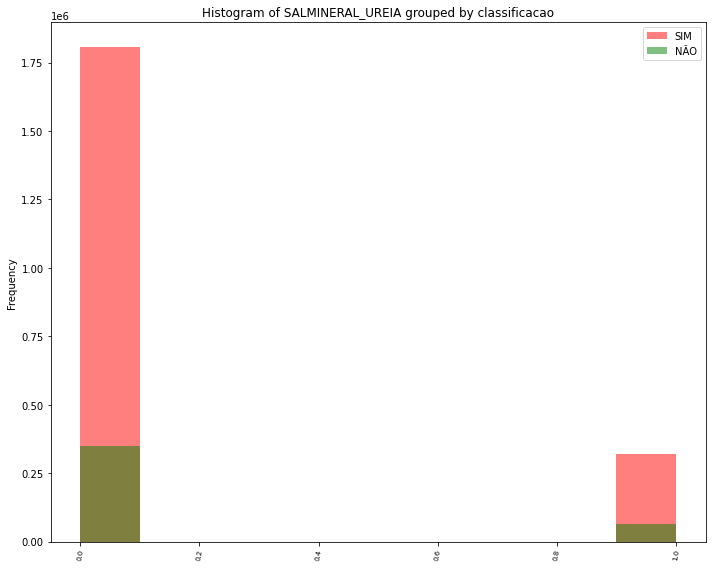

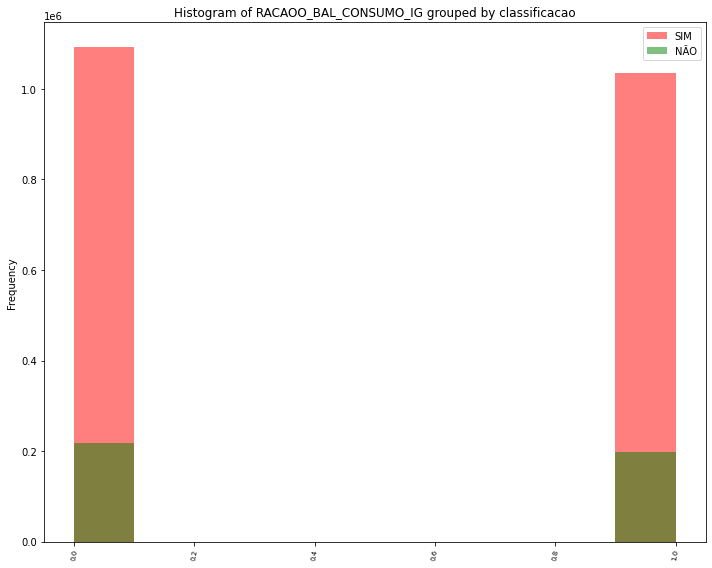

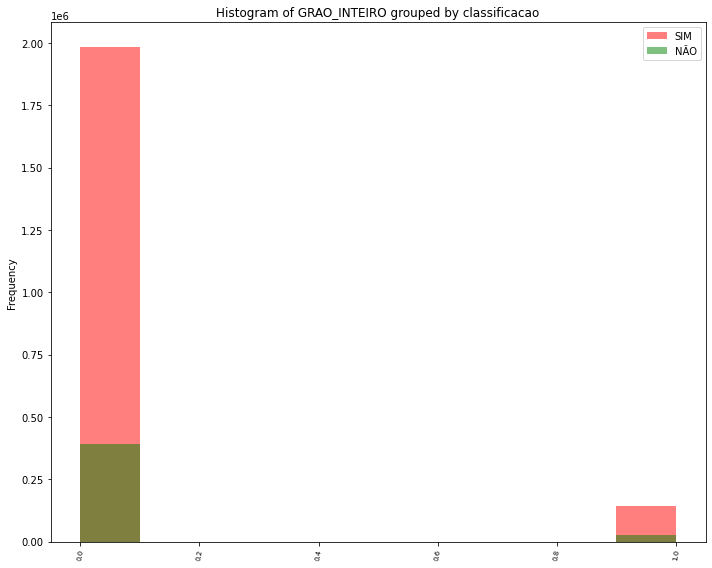

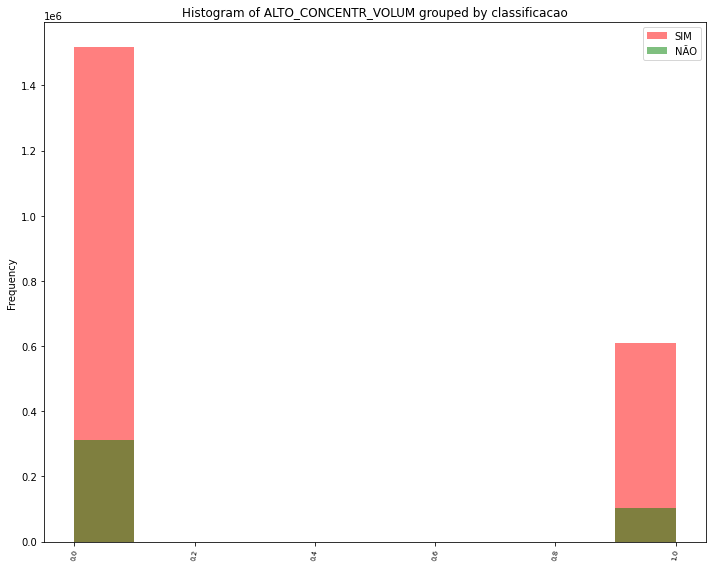

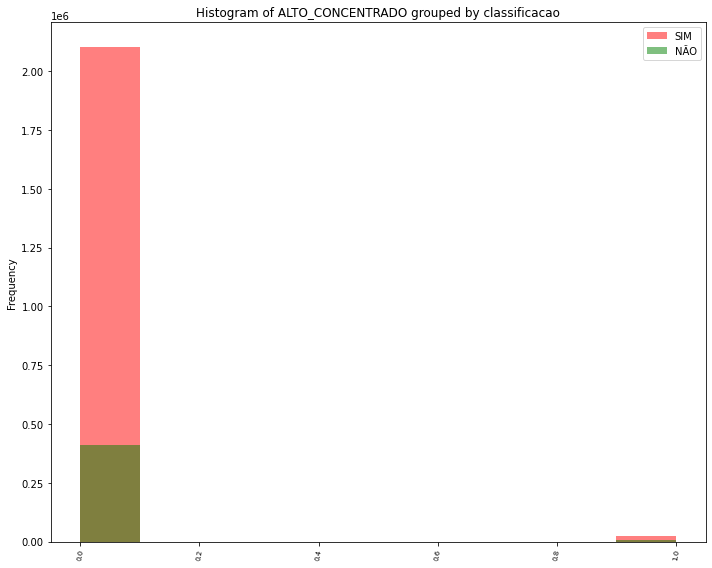

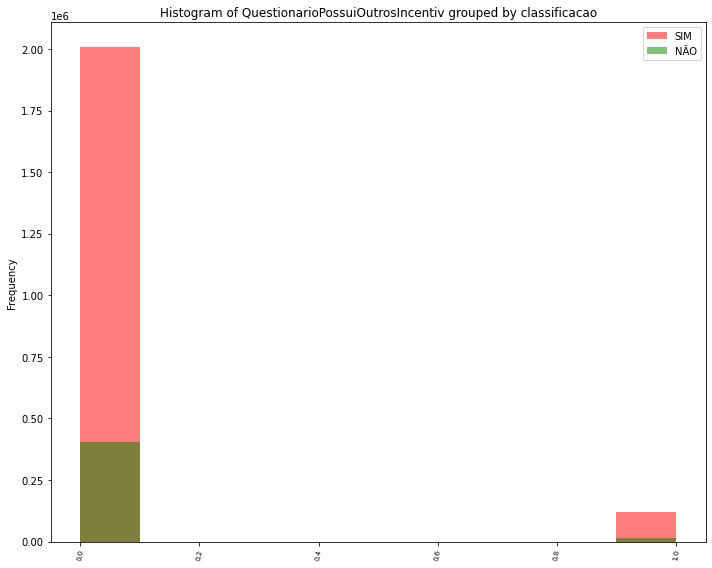

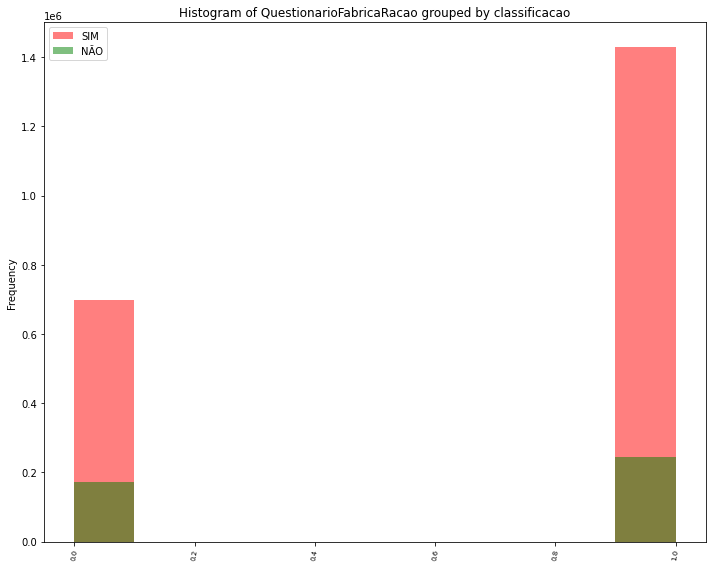

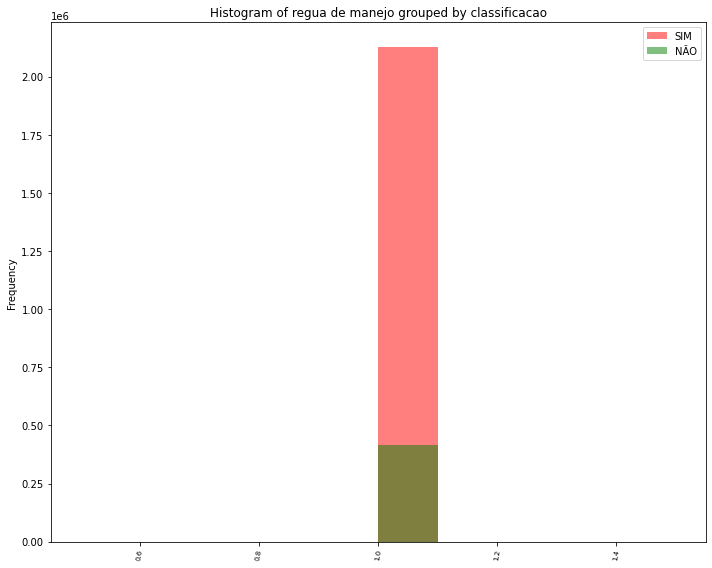

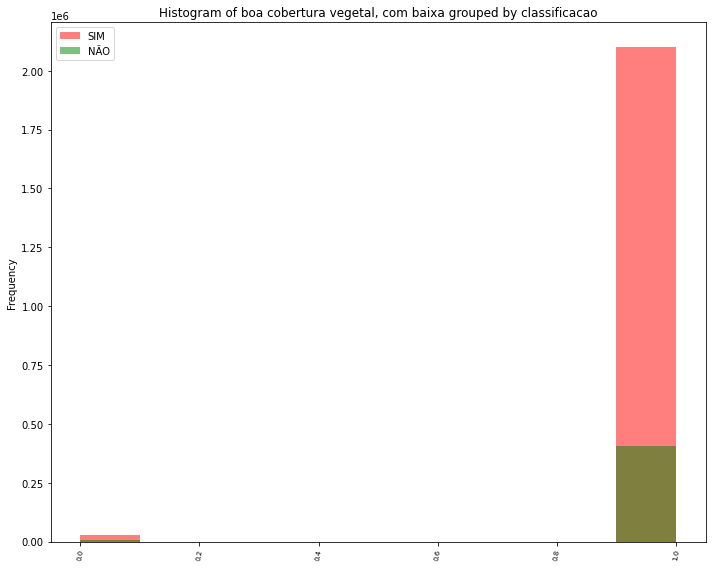

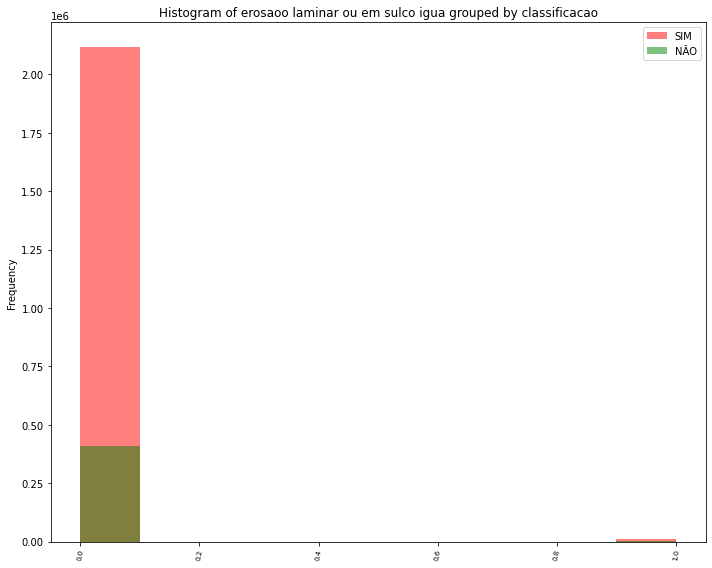

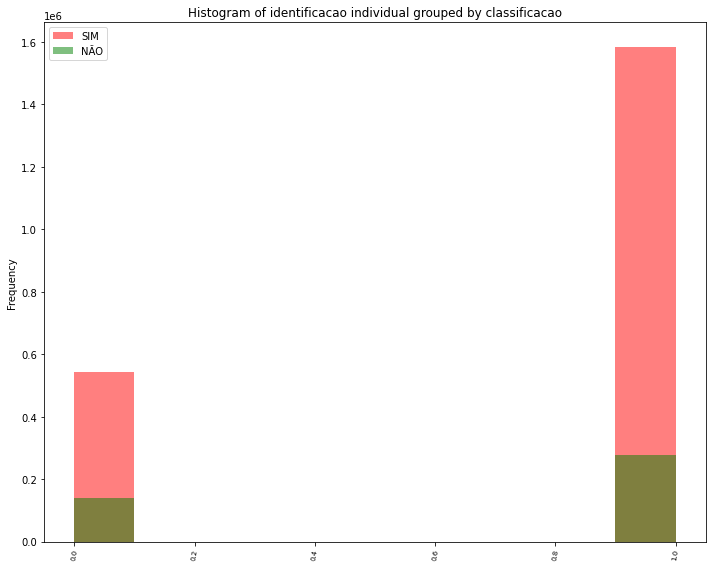

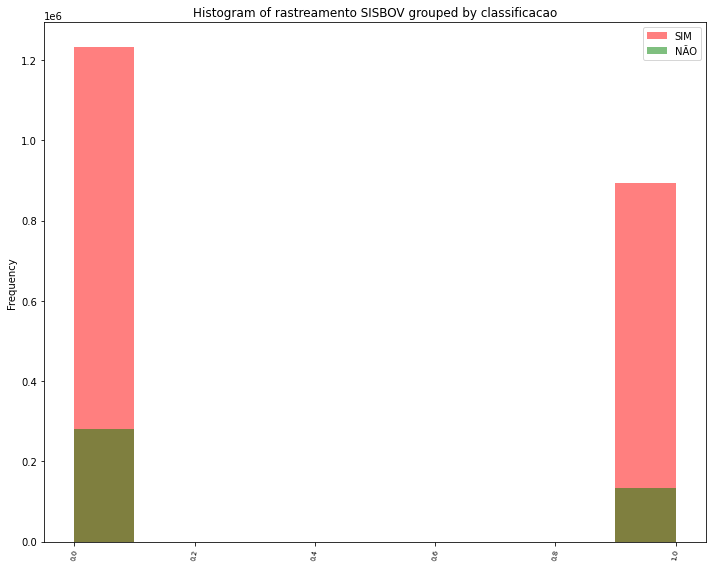

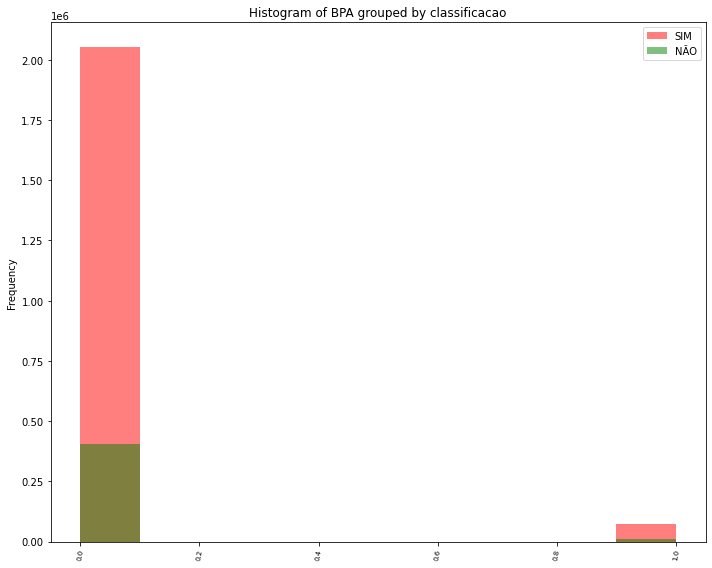

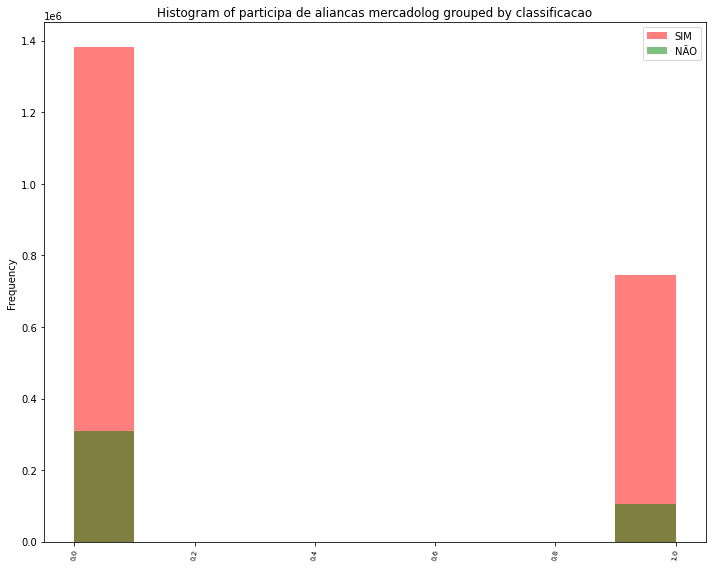

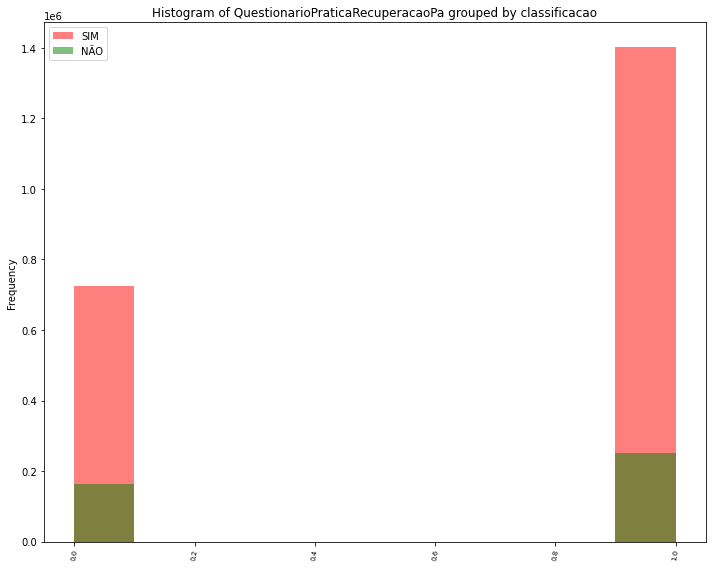

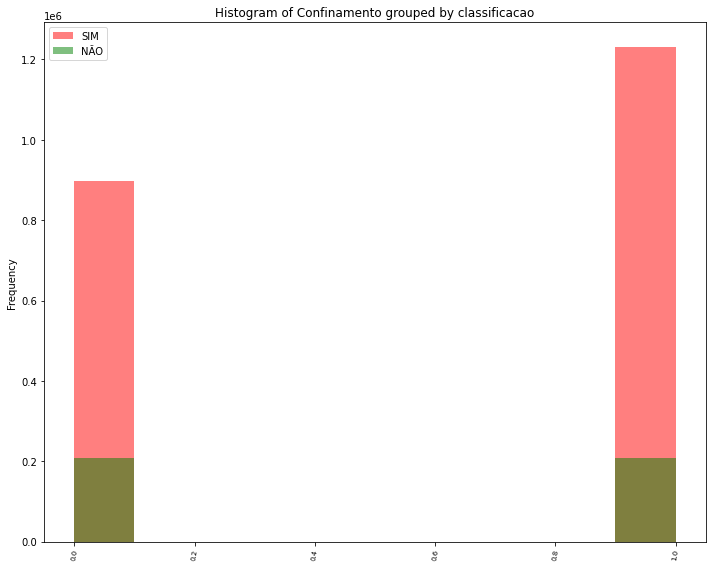

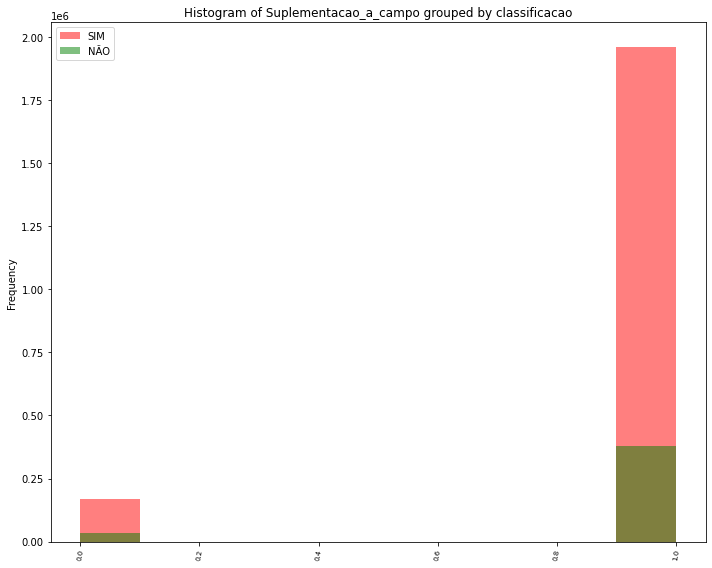

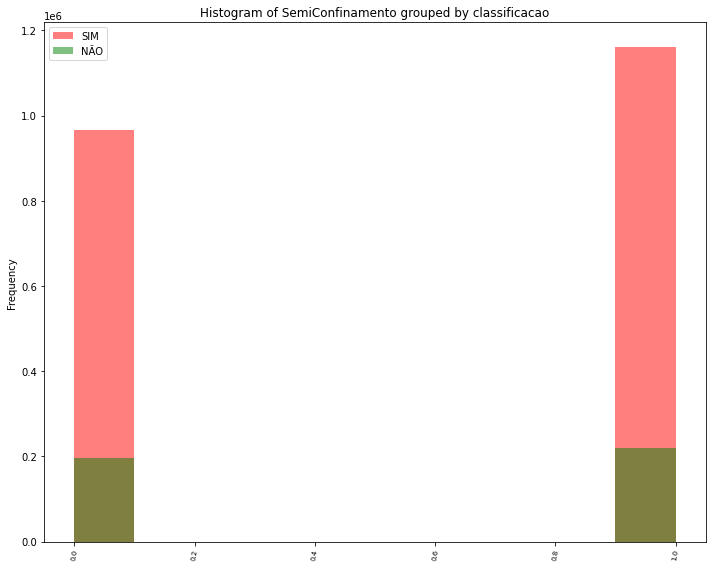

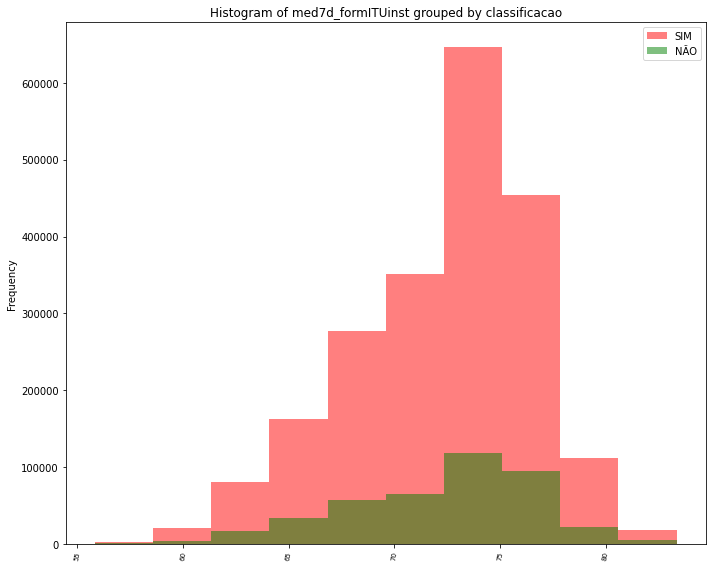

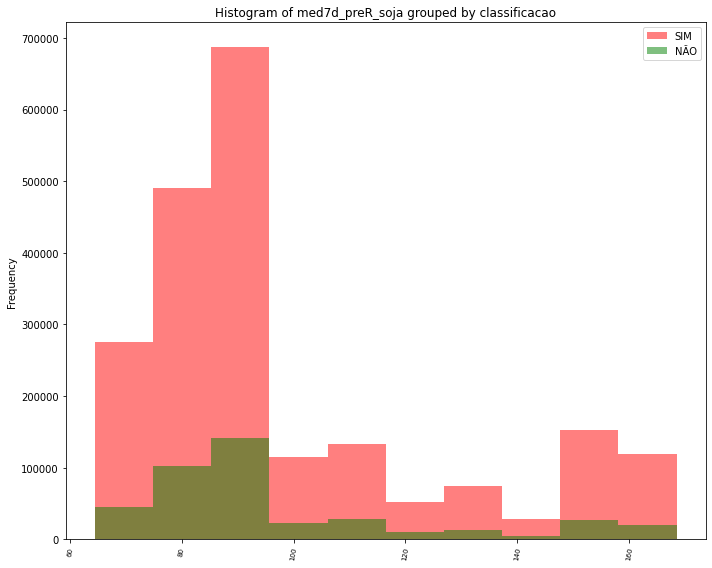

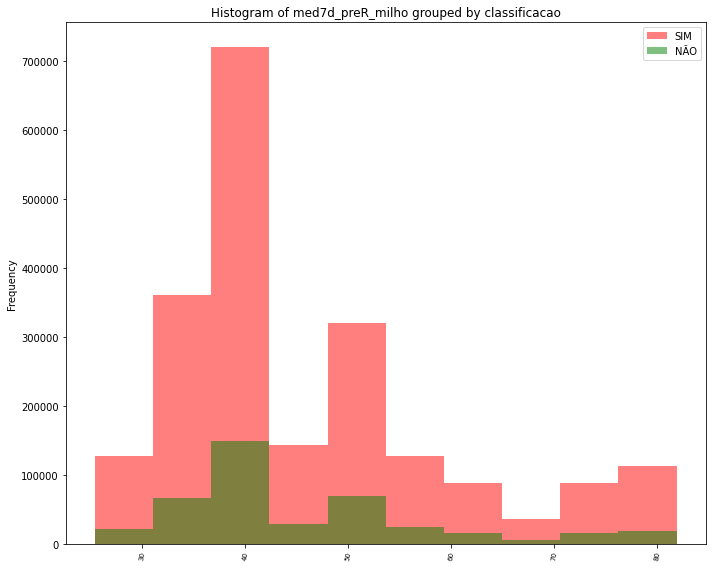

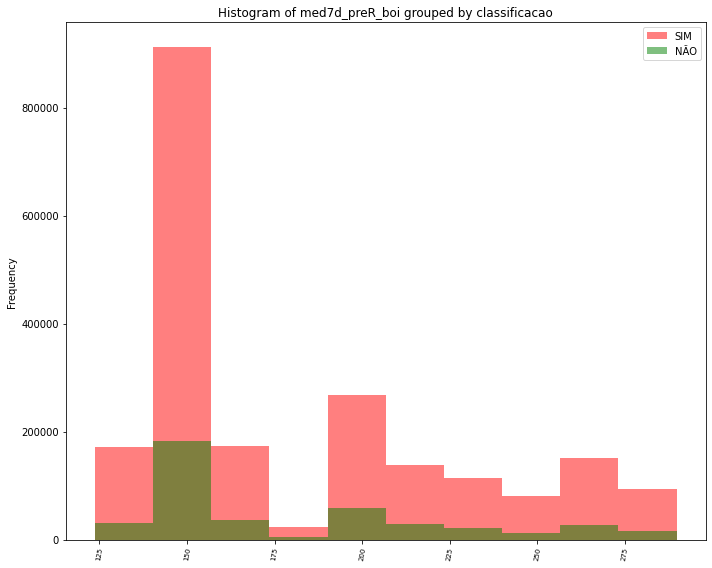

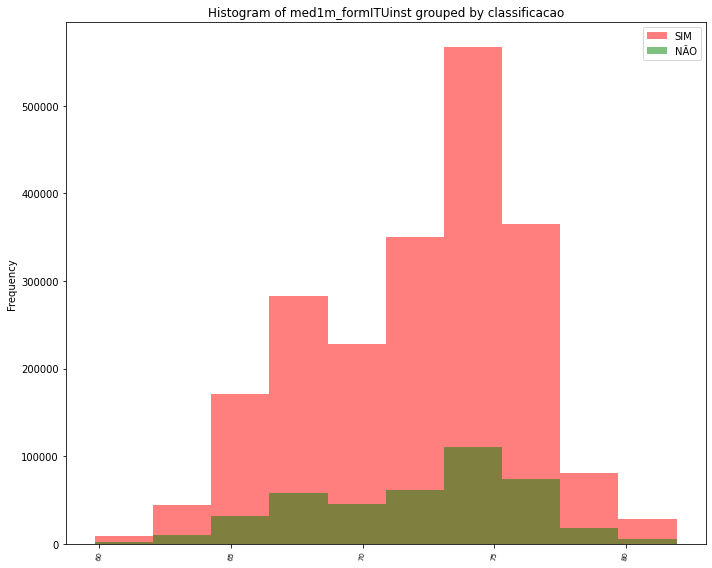

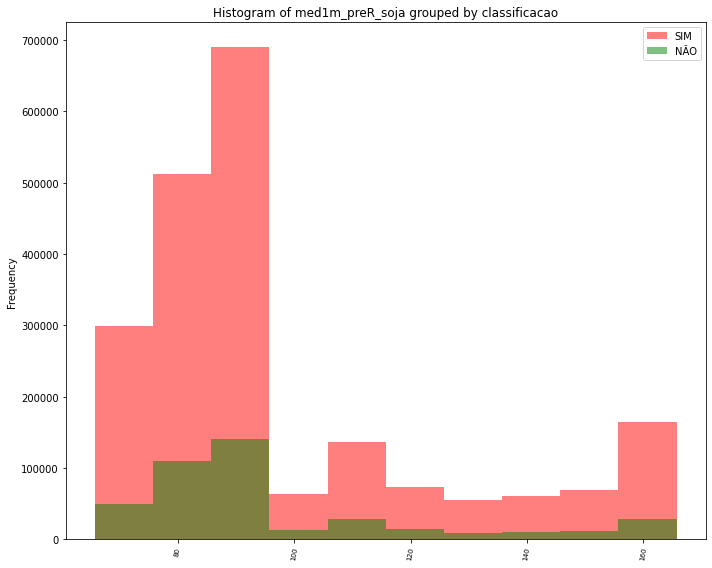

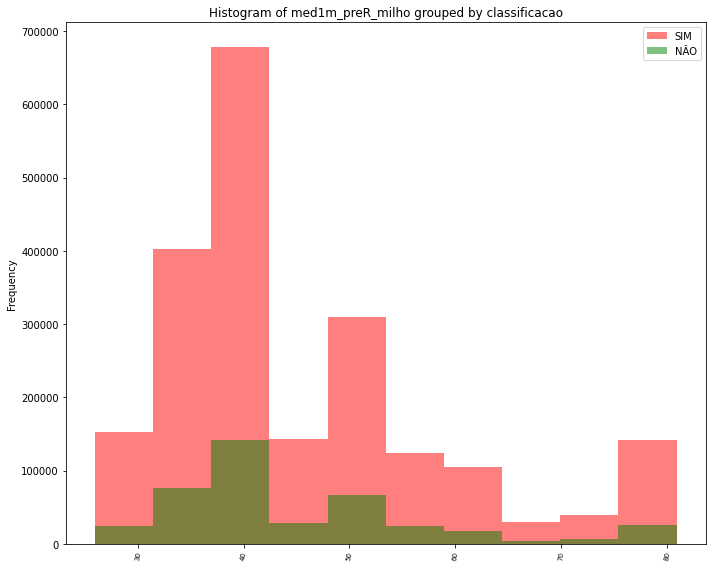

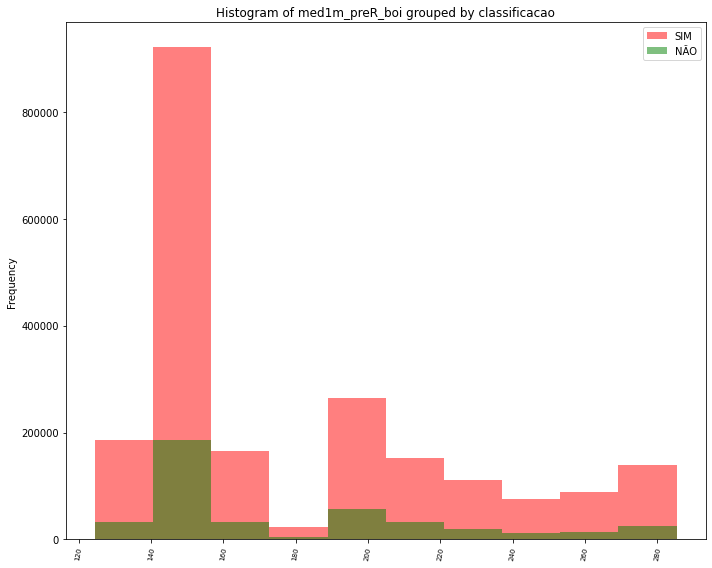

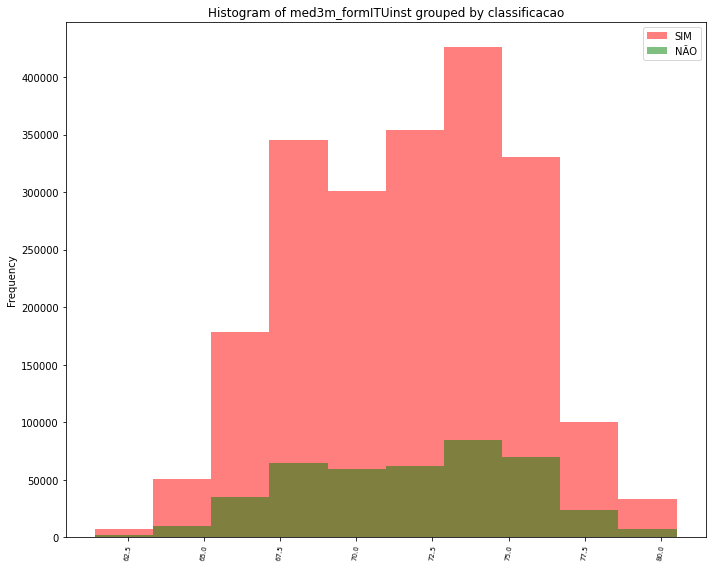

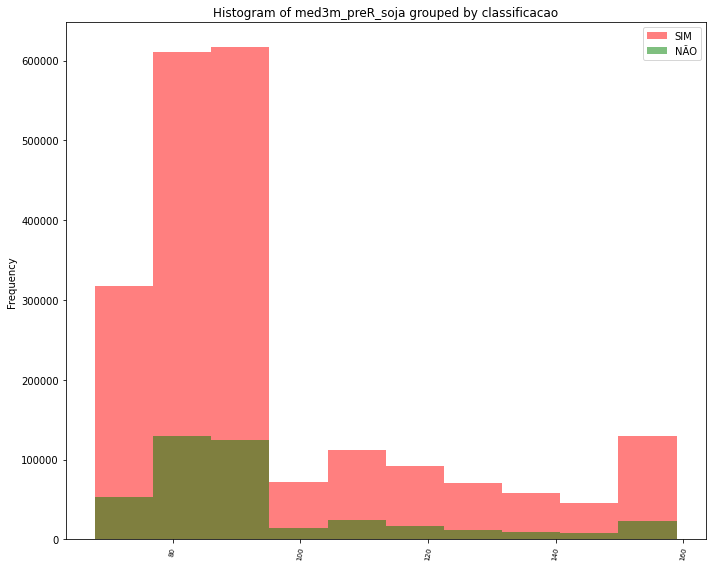

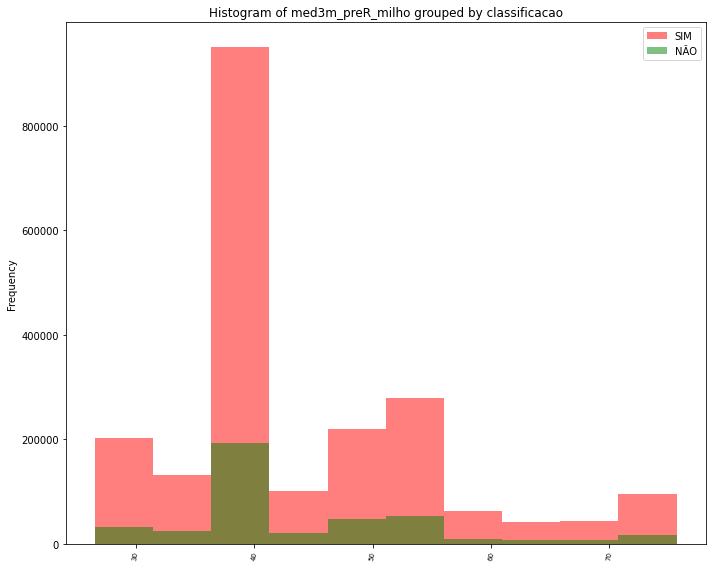

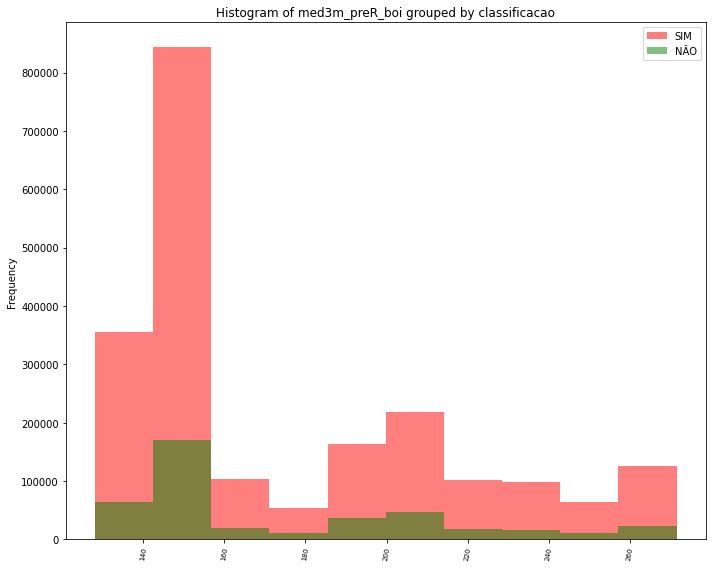

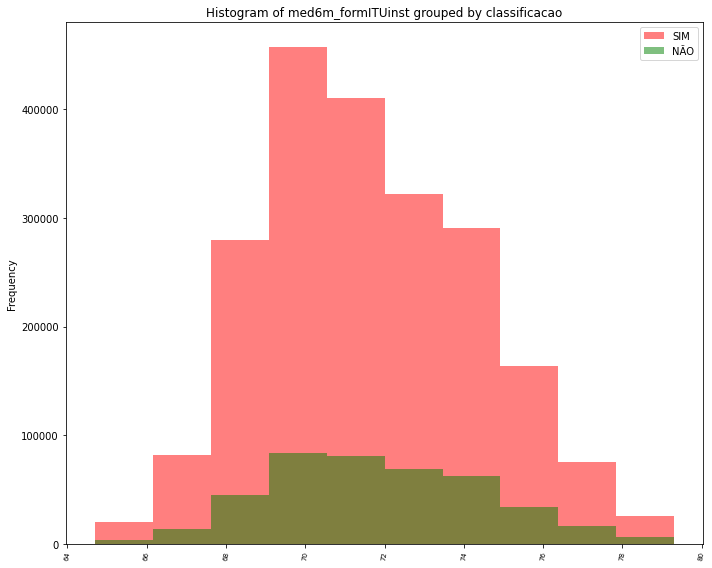

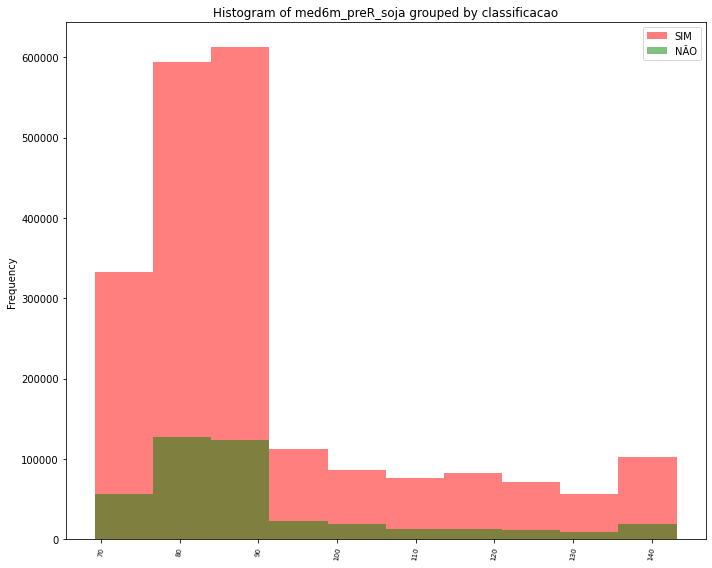

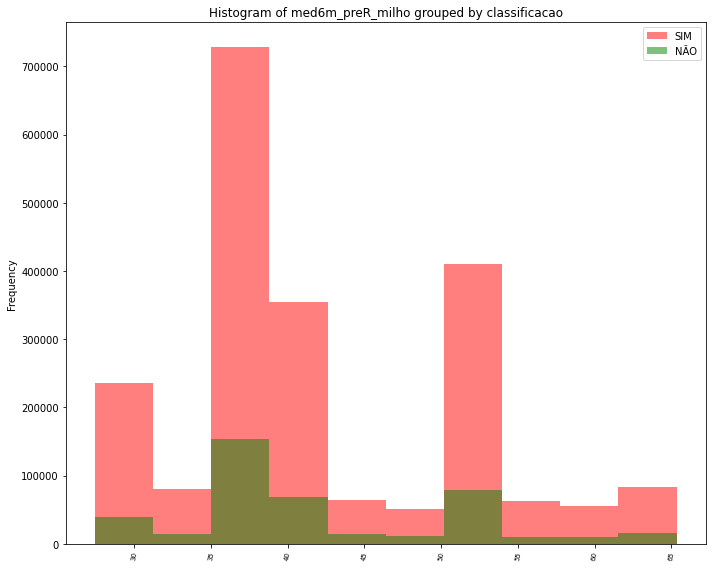

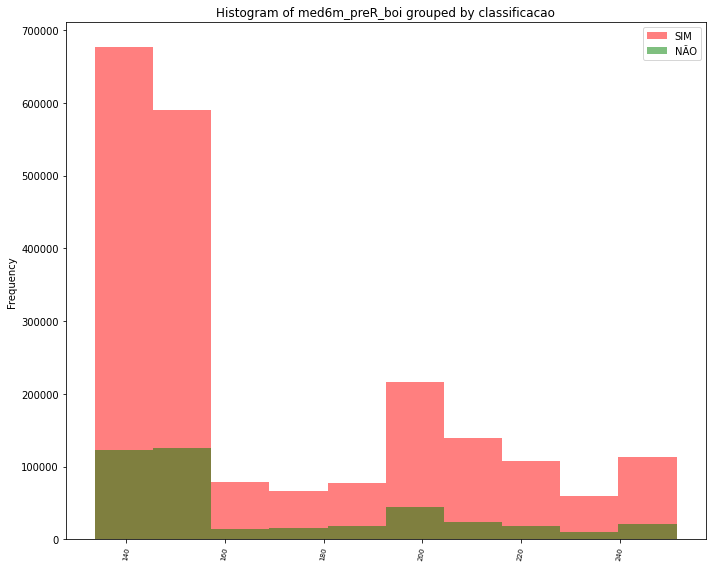

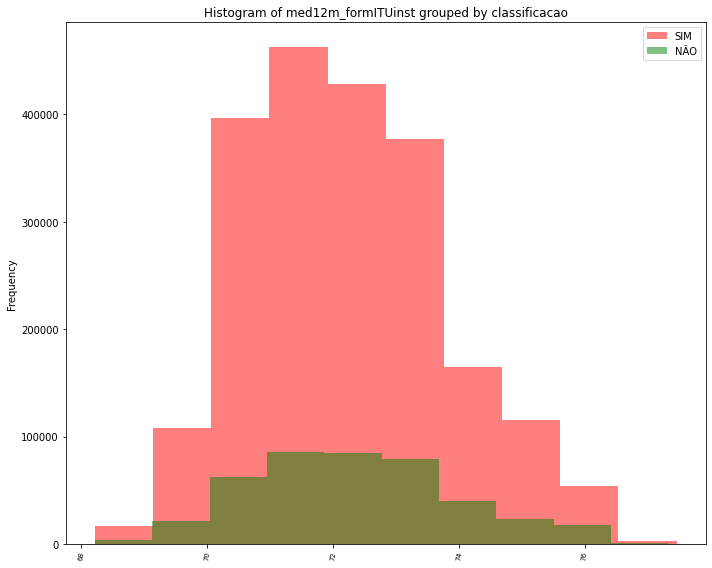

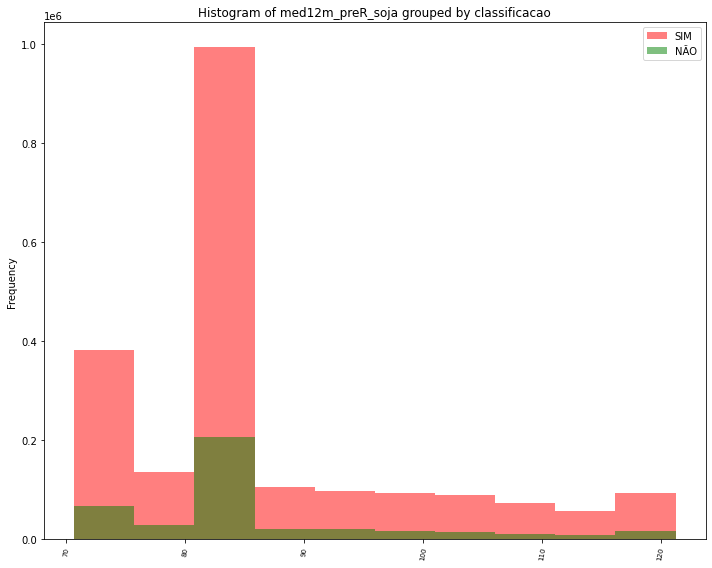

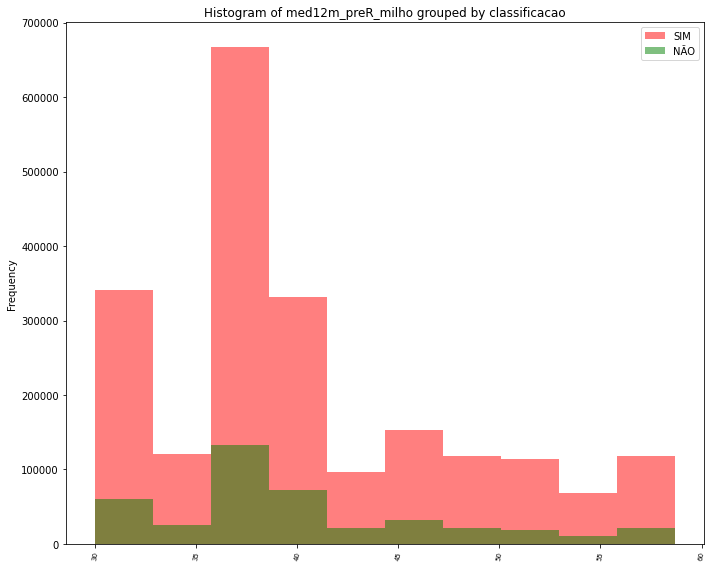

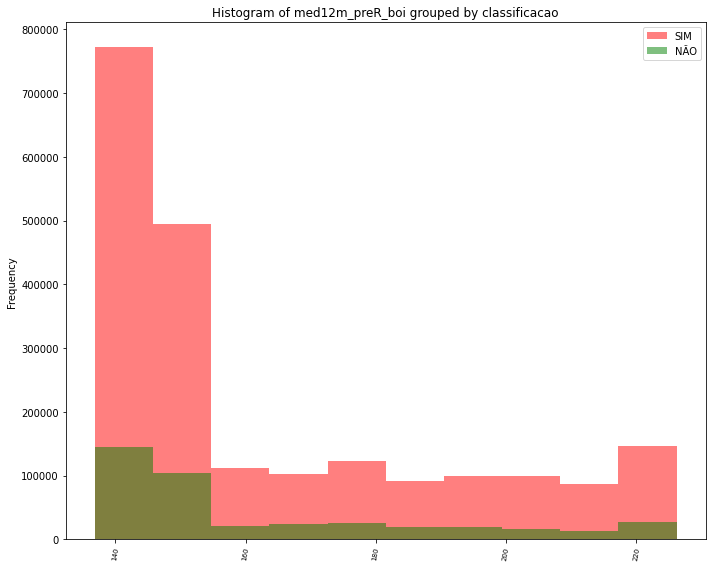

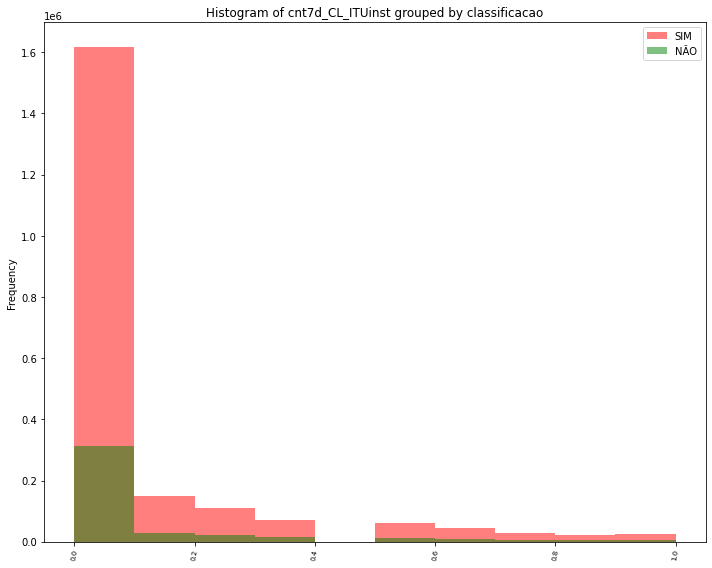

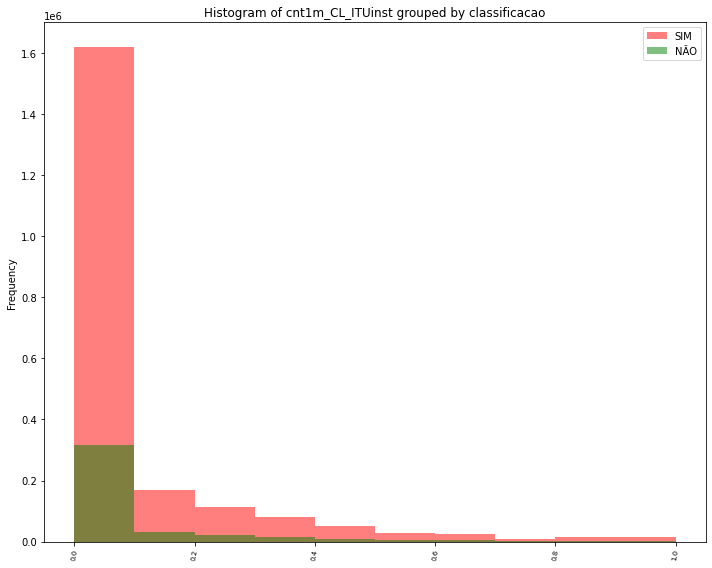

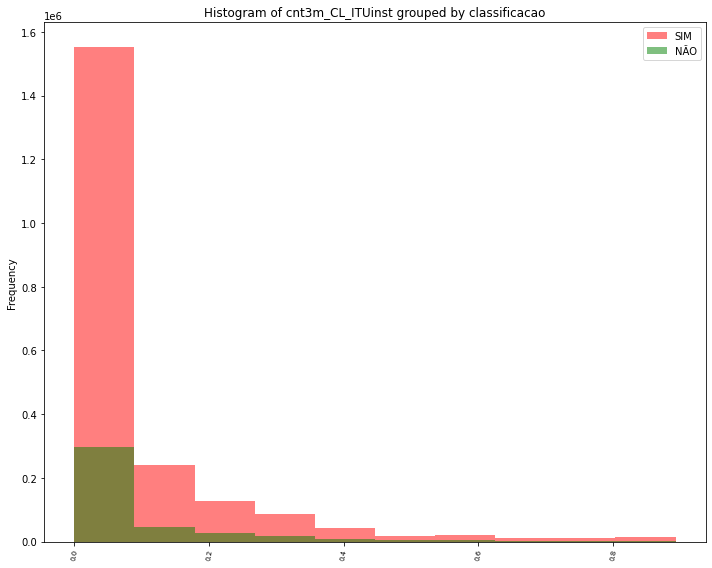

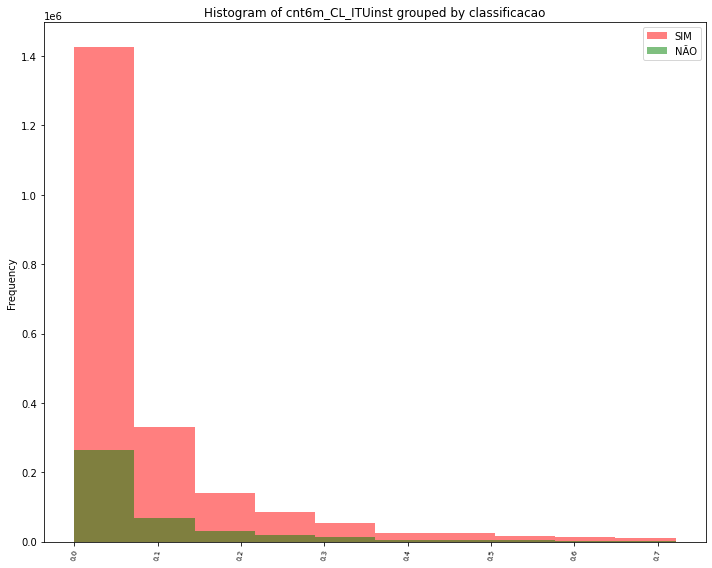

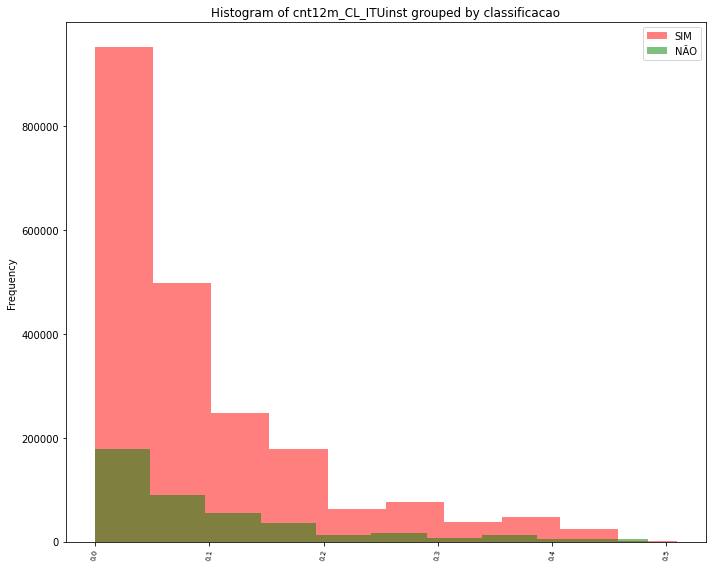

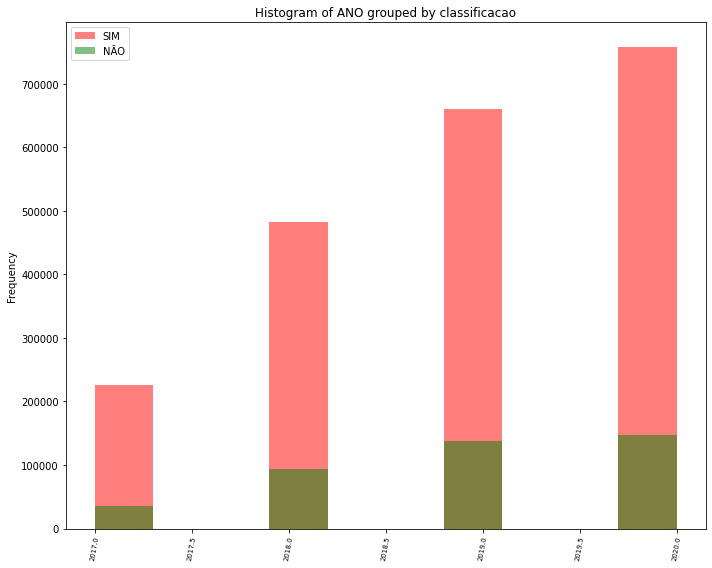

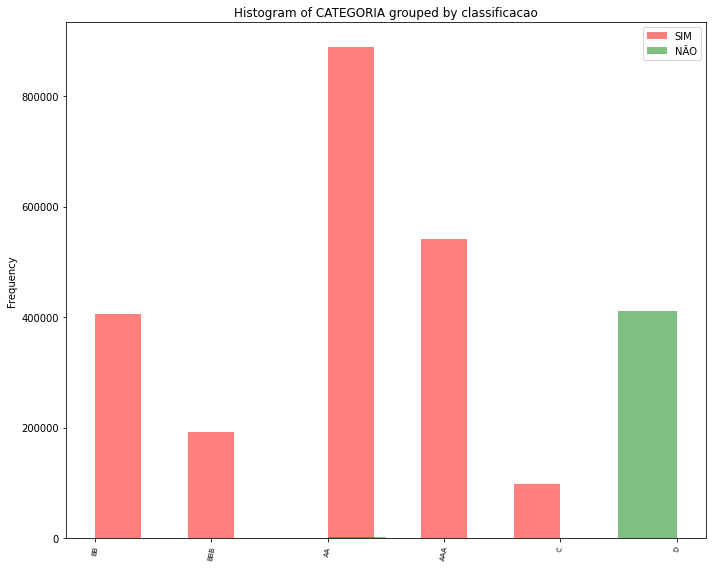

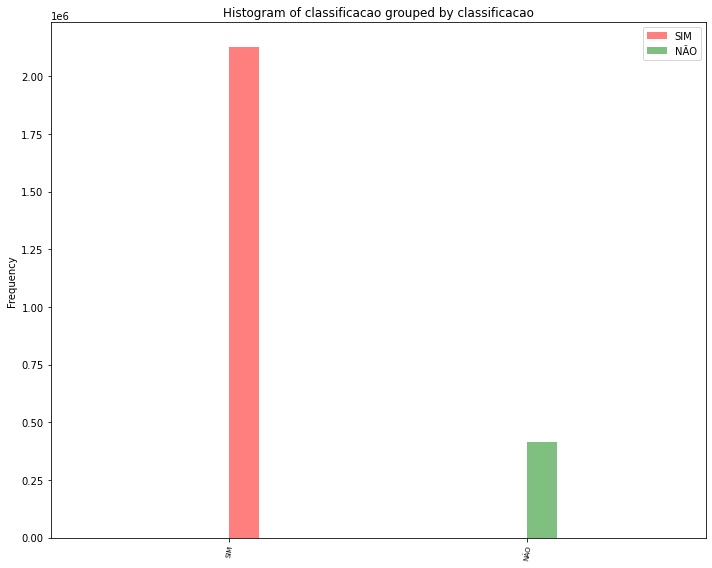



*****FIM IMPRIMIR HISTOGRAM GROUPED BY TARGET******


In [ ]:
# Print histogram for each attribute grouped by target class
reports.histogram_grouped_by_target(
    data_frame=precoce_ms_data_frame, target=settings.class_column
)

## Print boxplot for each attribute


*****INICIO IMPRIMIR BOXPLOT******


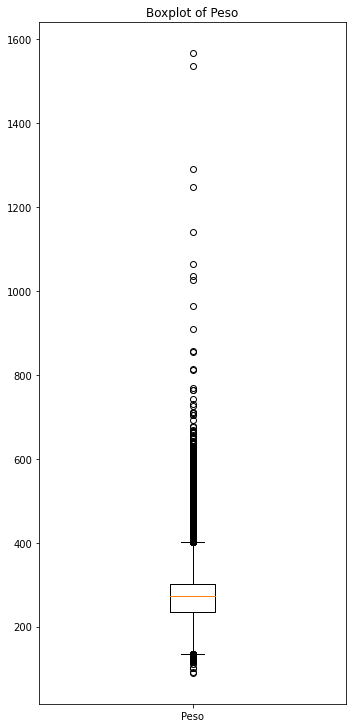

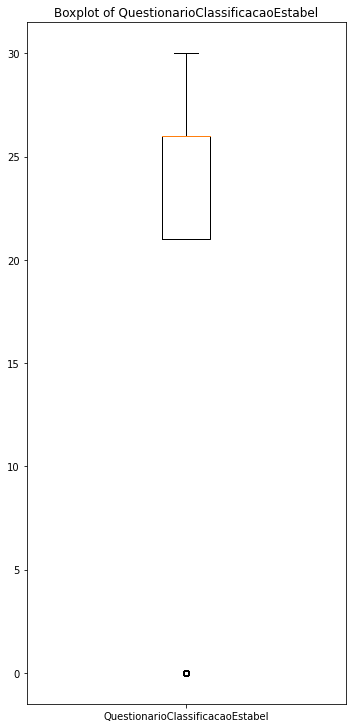

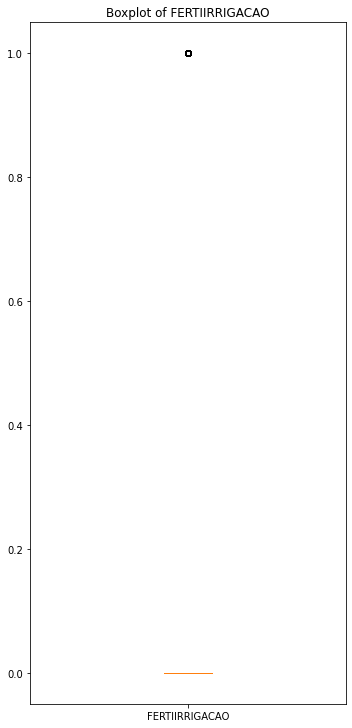

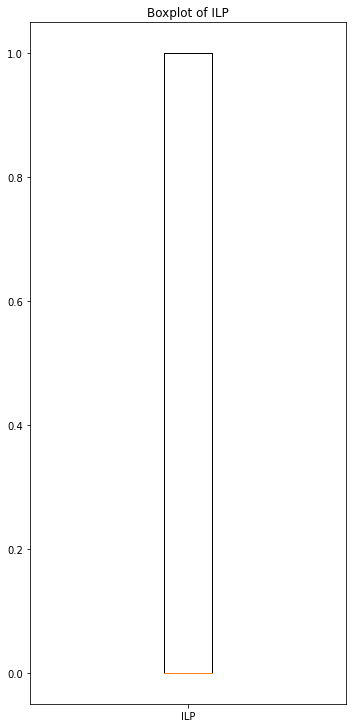

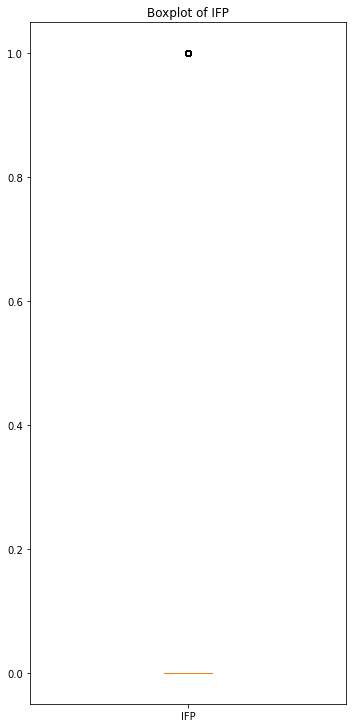

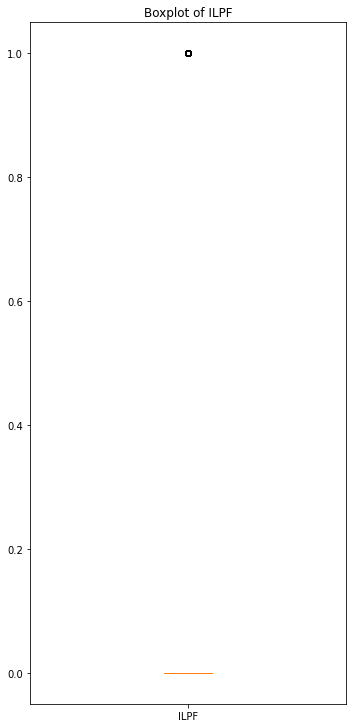

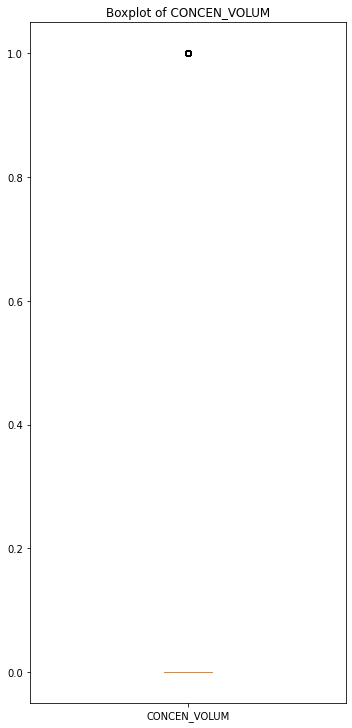

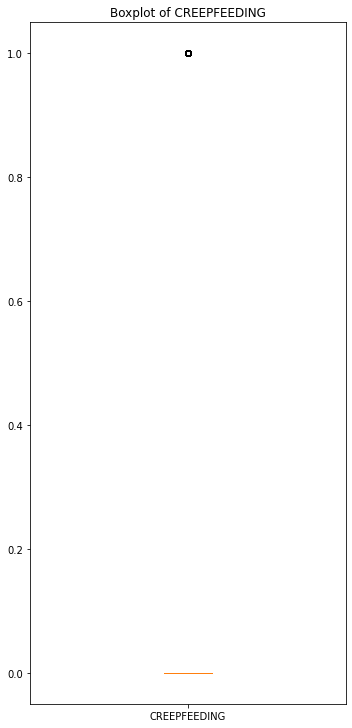

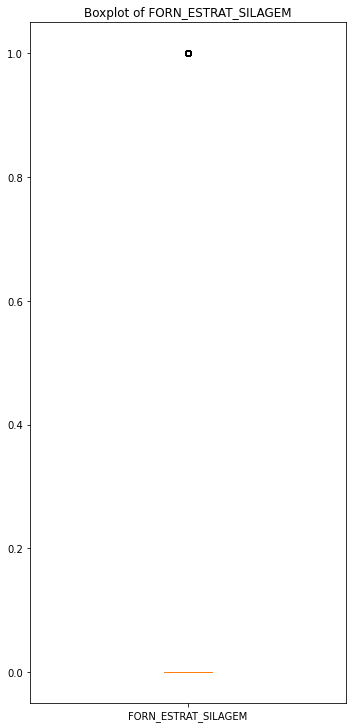

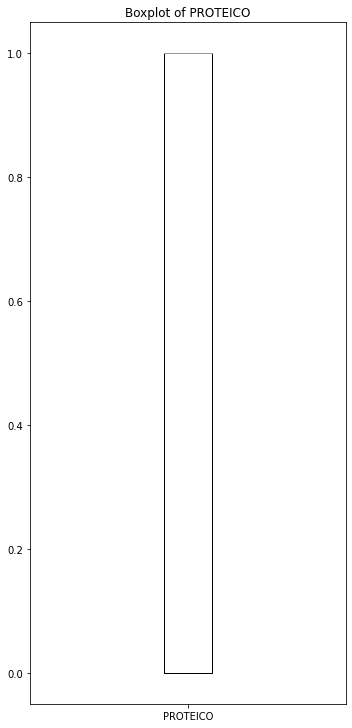

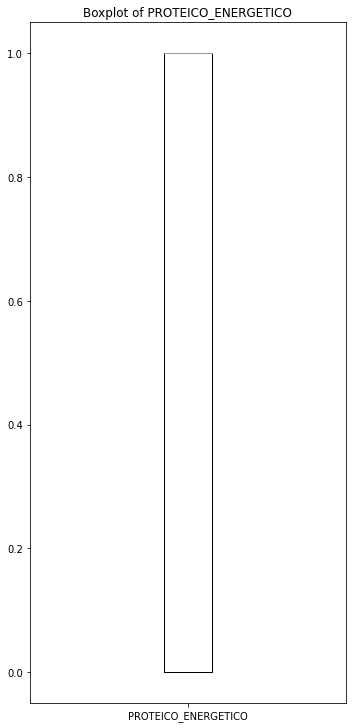

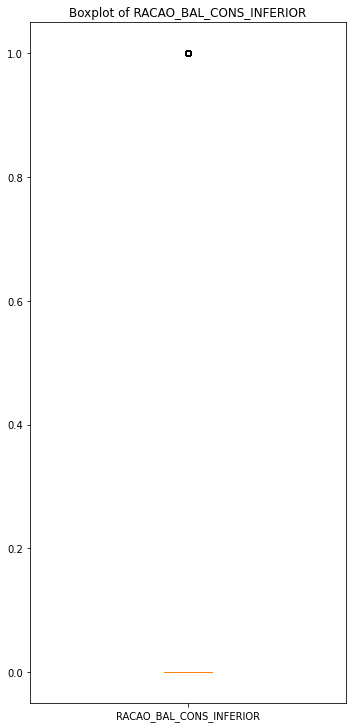

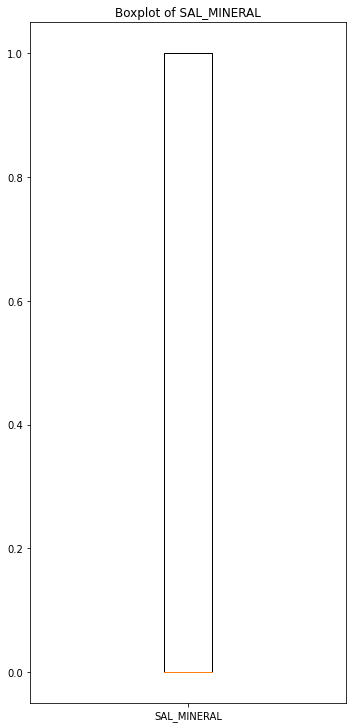

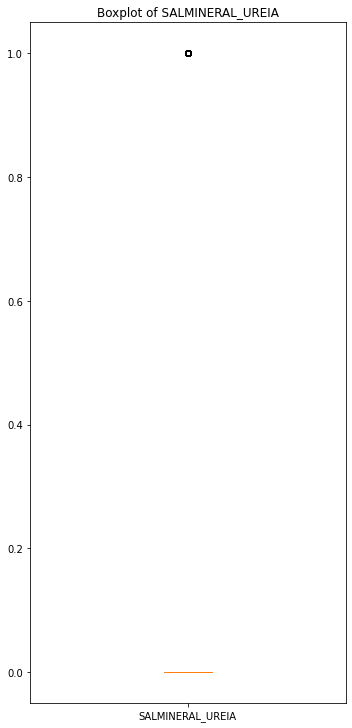

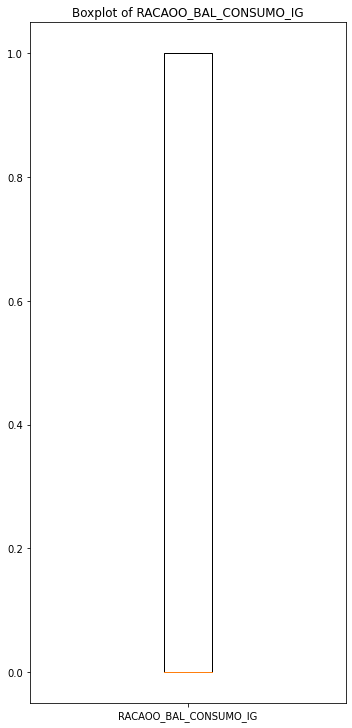

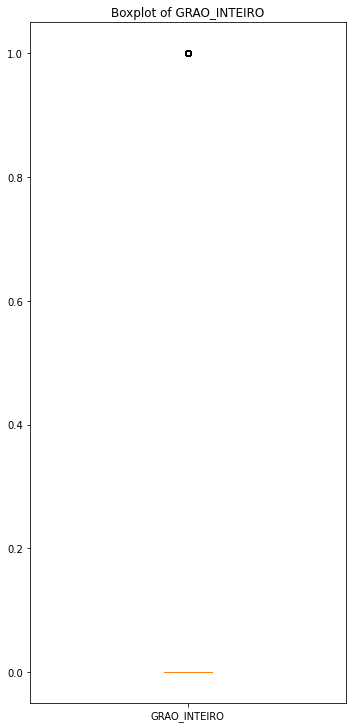

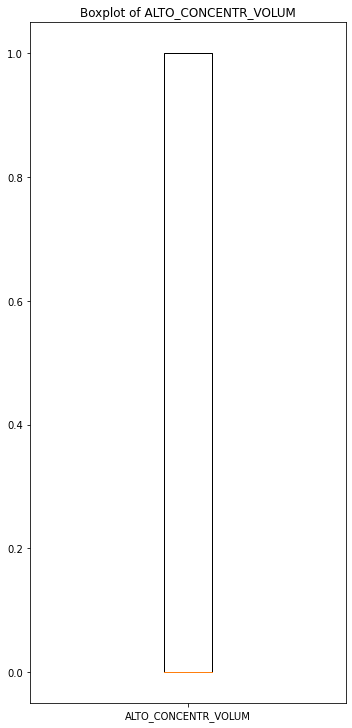

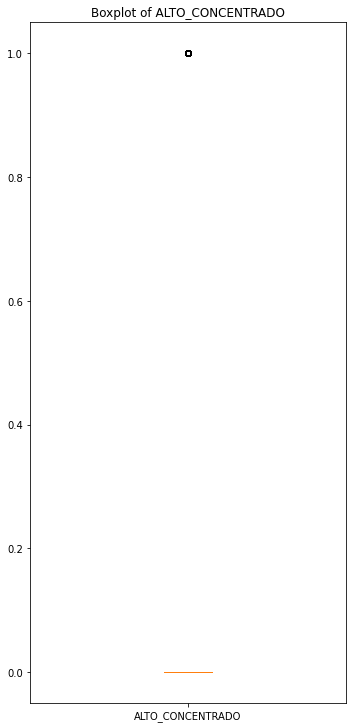

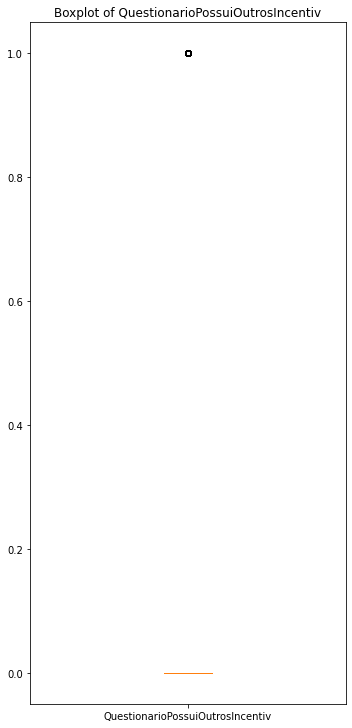

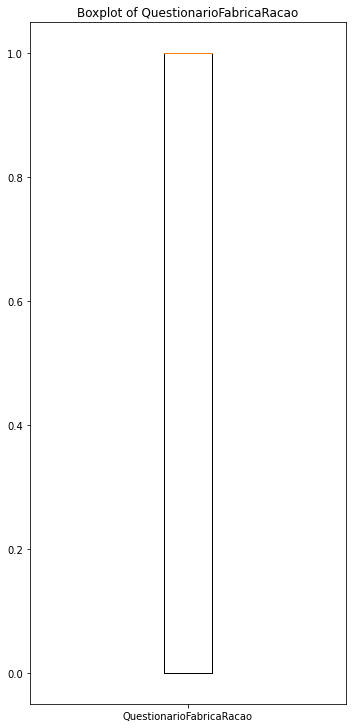

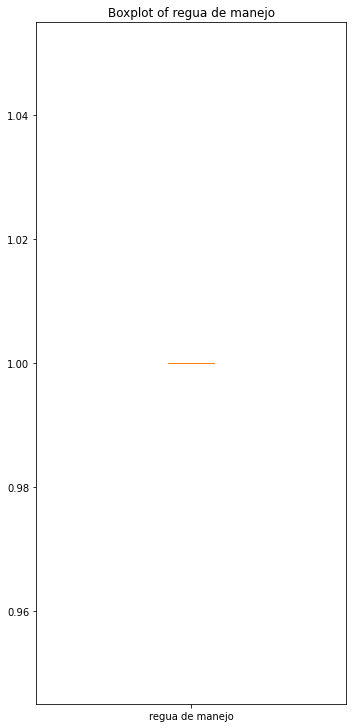

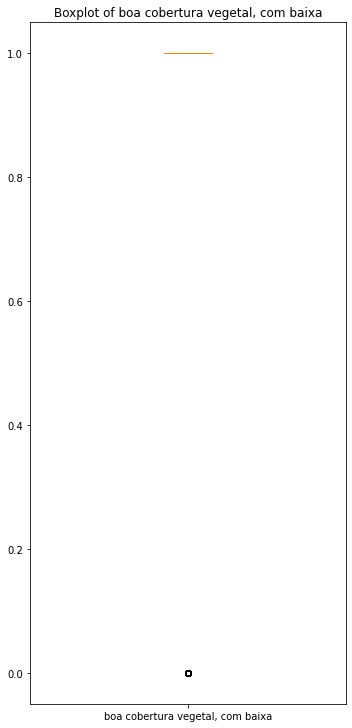

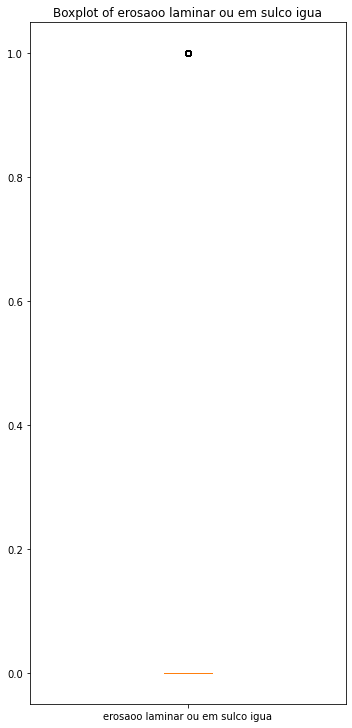

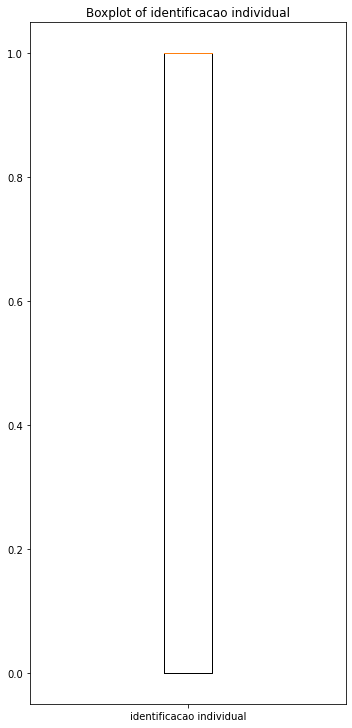

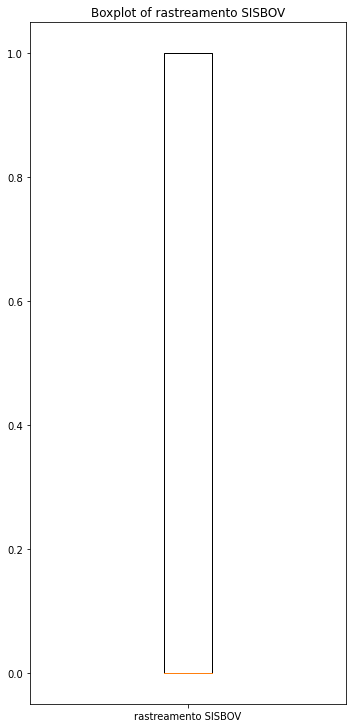

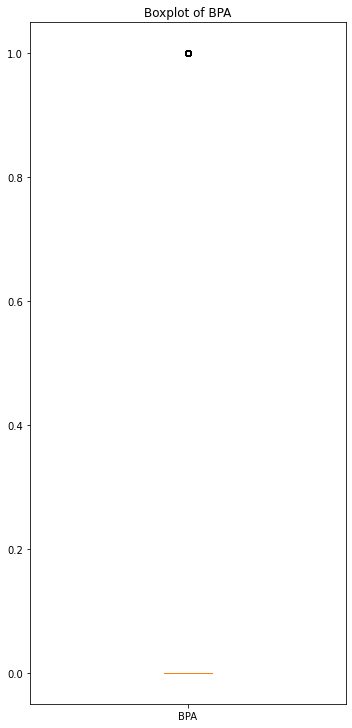

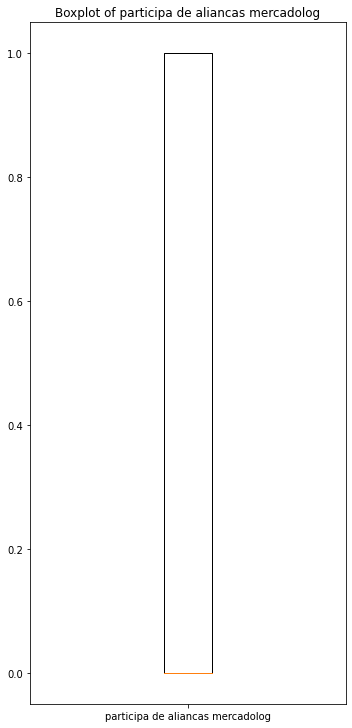

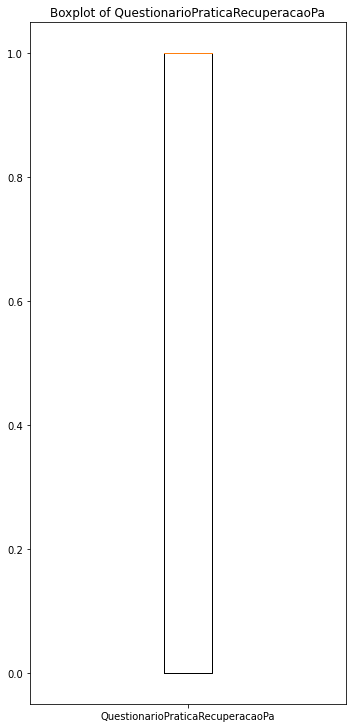

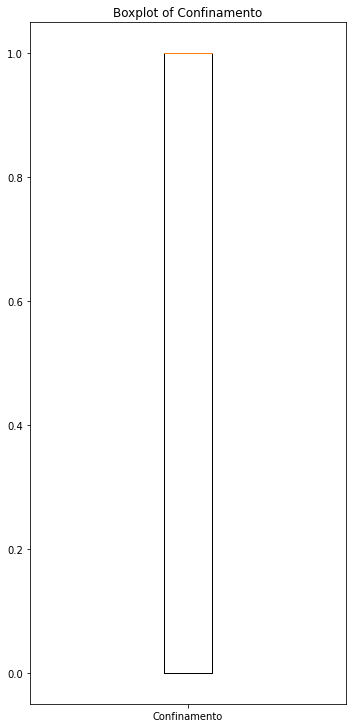

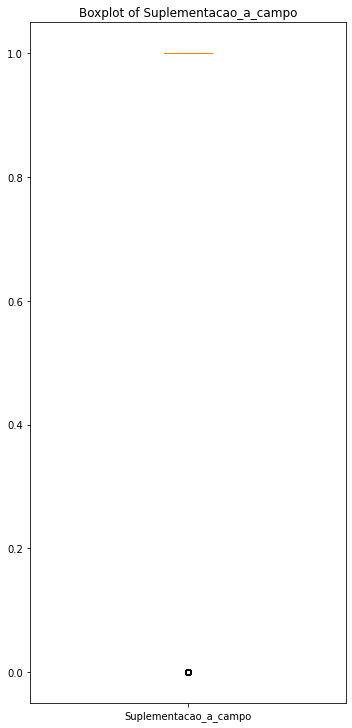

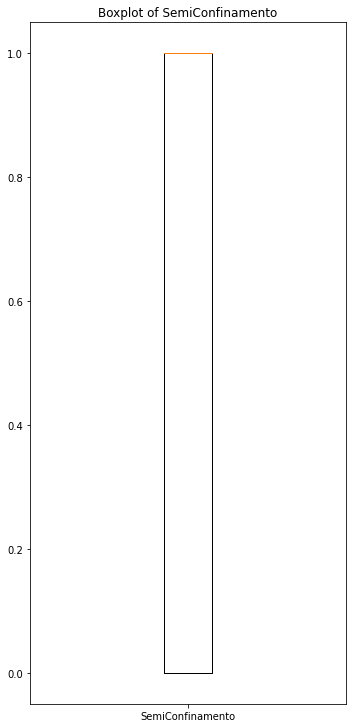

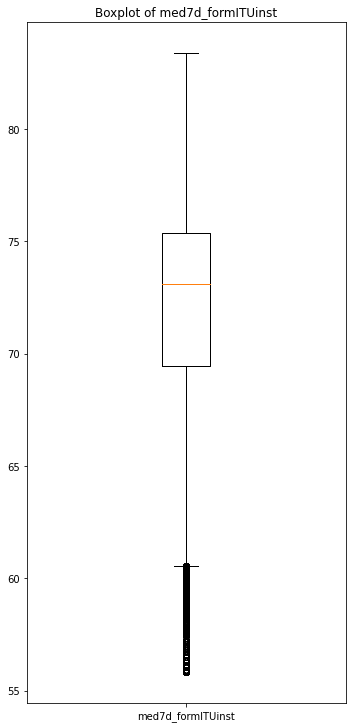

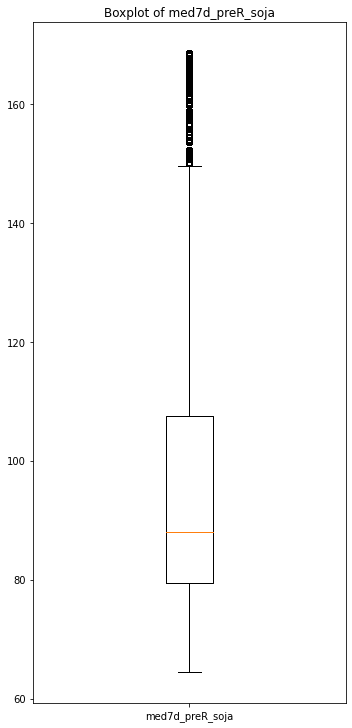

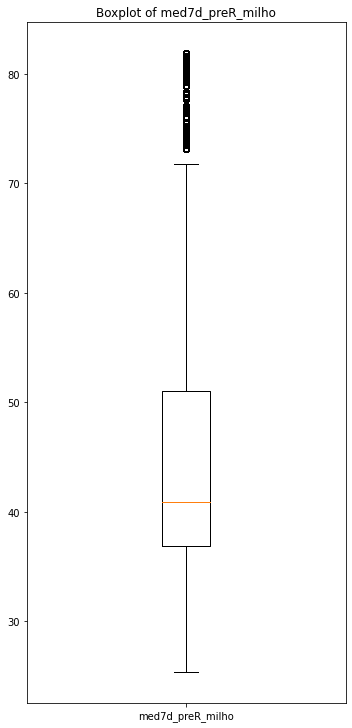

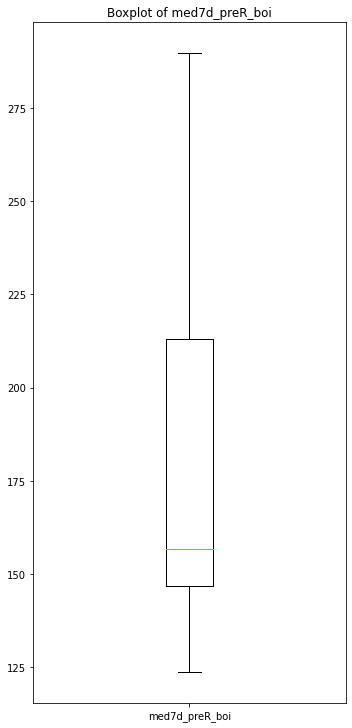

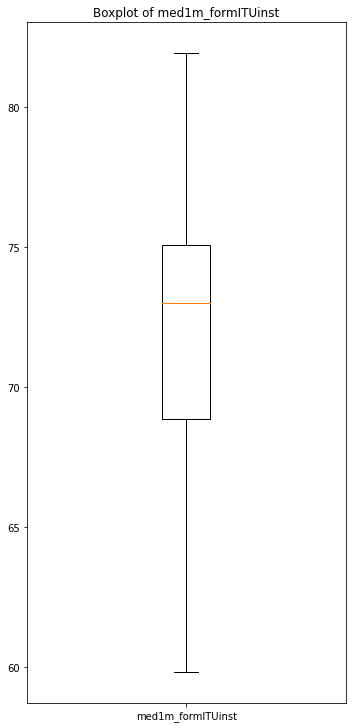

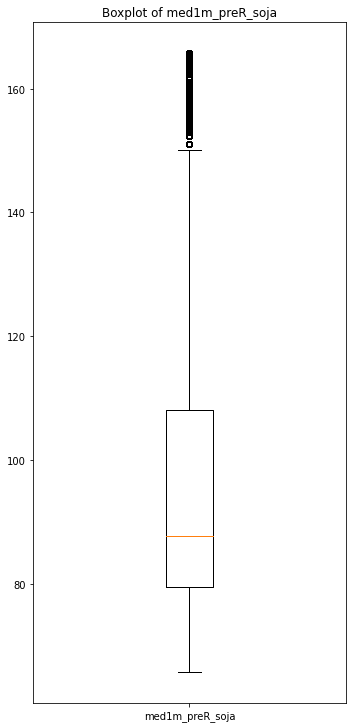

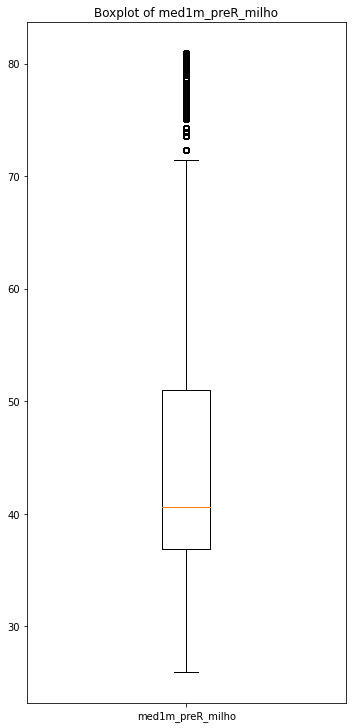

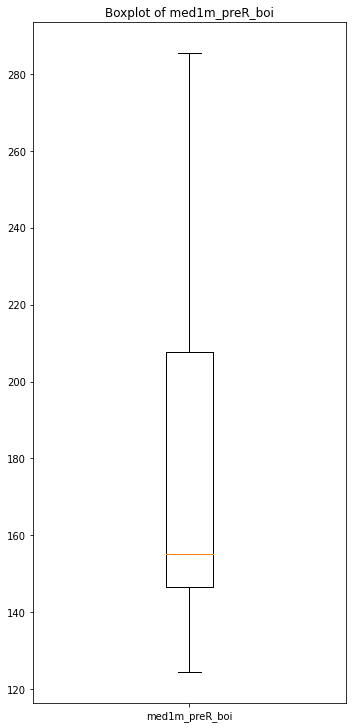

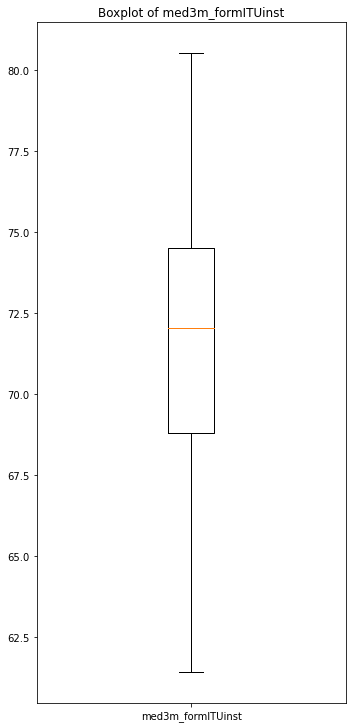

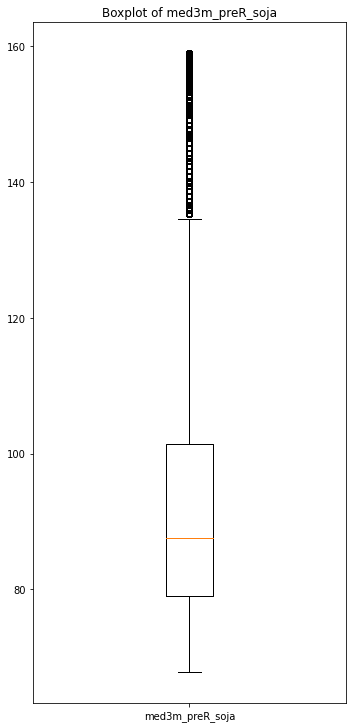

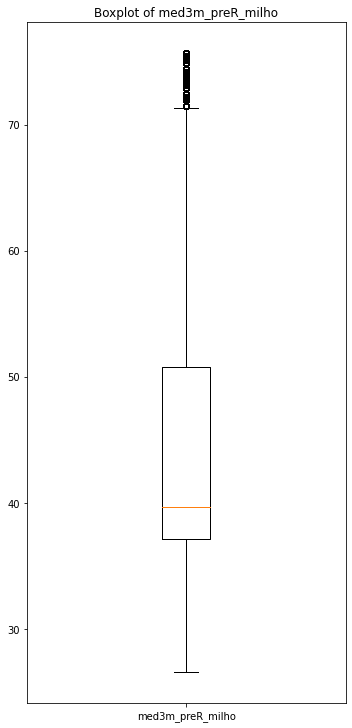

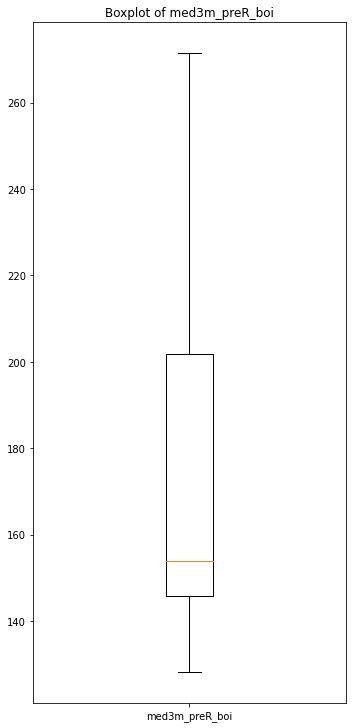

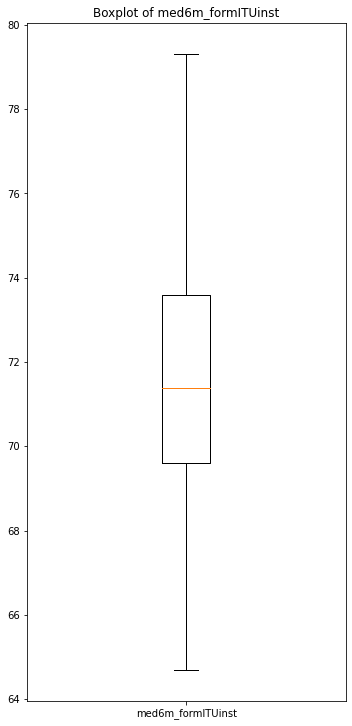

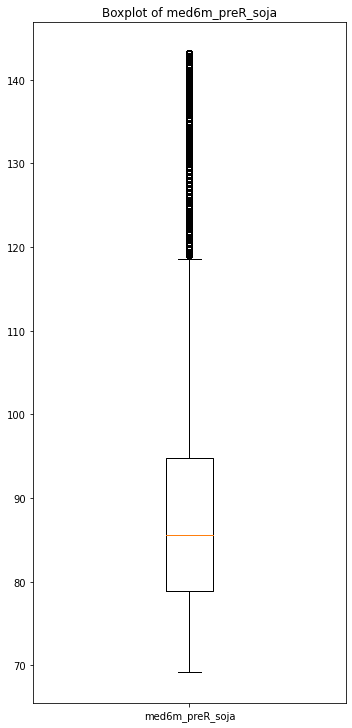

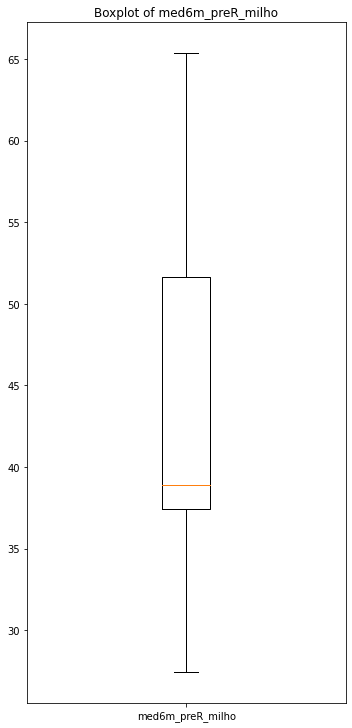

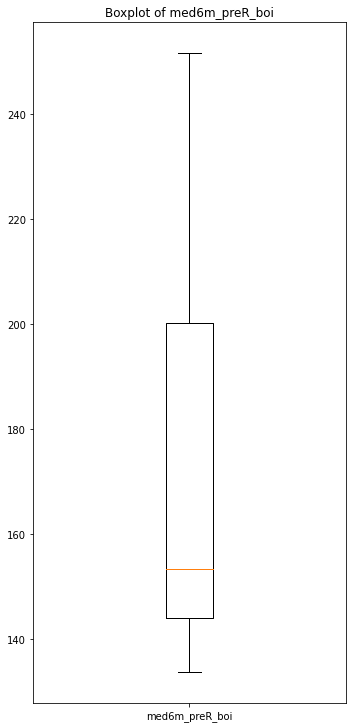

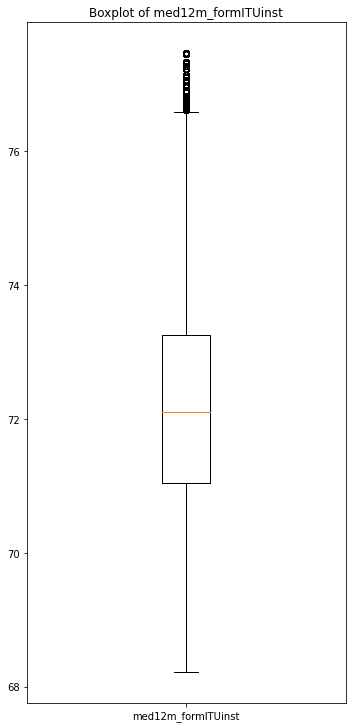

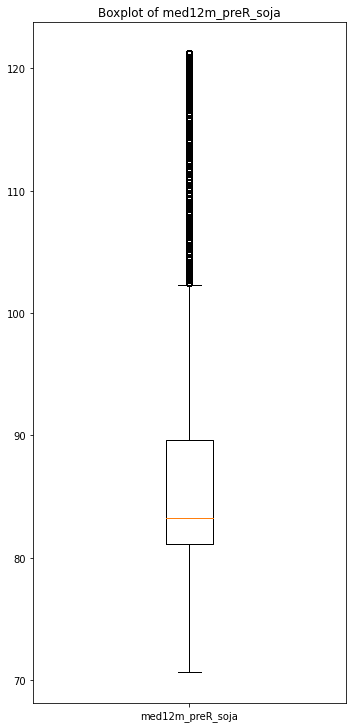

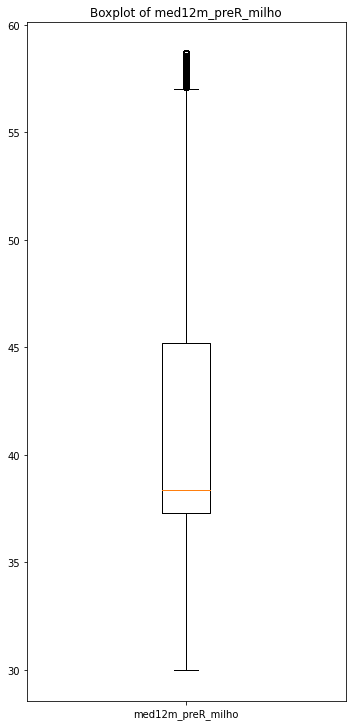

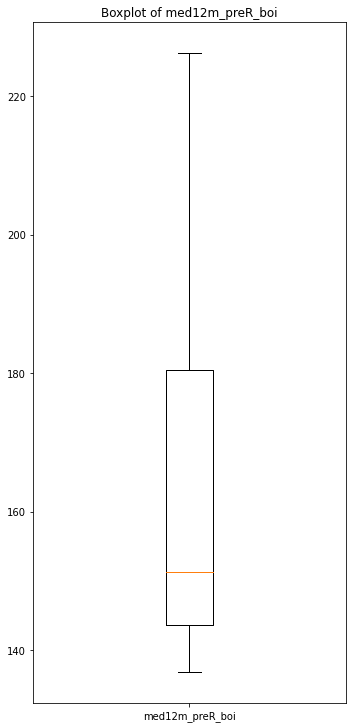

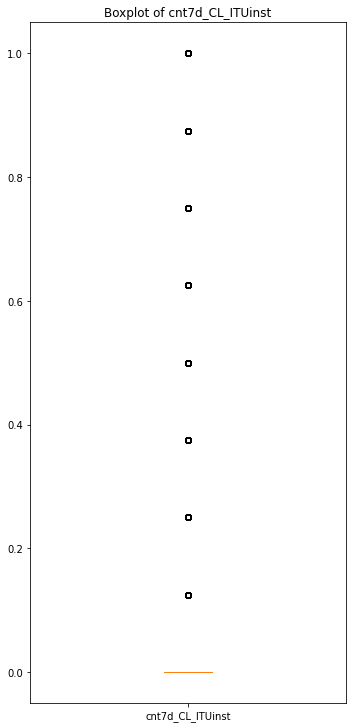

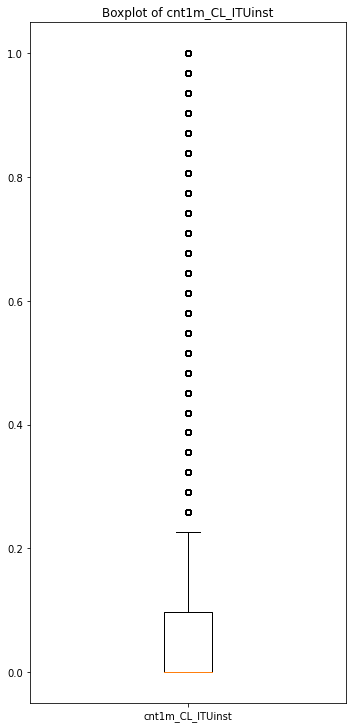

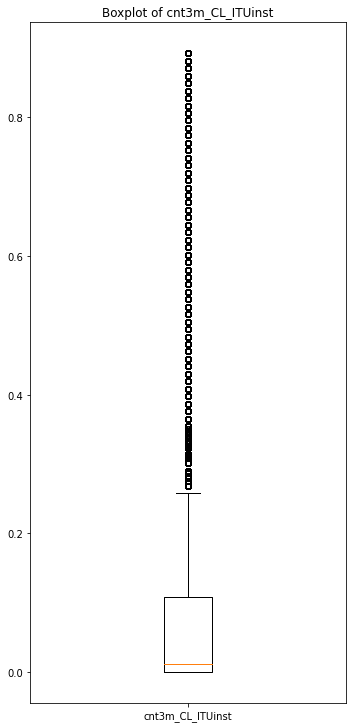

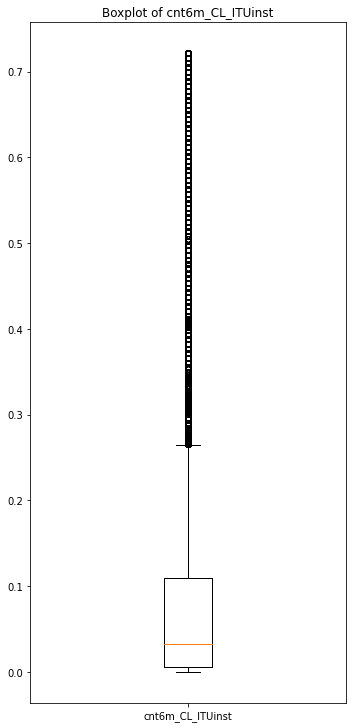

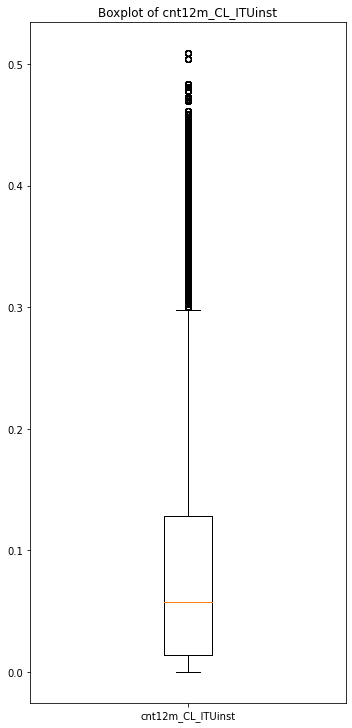

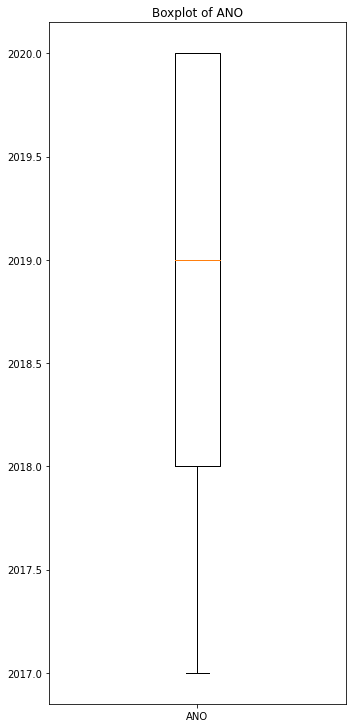



*****FIM IMPRIMIR BOXPLOT******


In [ ]:
# Print boxplot for each attribute
reports.boxplot(data_frame=precoce_ms_data_frame)

## Print boxplot for each attribute by target class


*****INICIO IMPRIMIR BOXPLOT GROUPED BY TARGET******


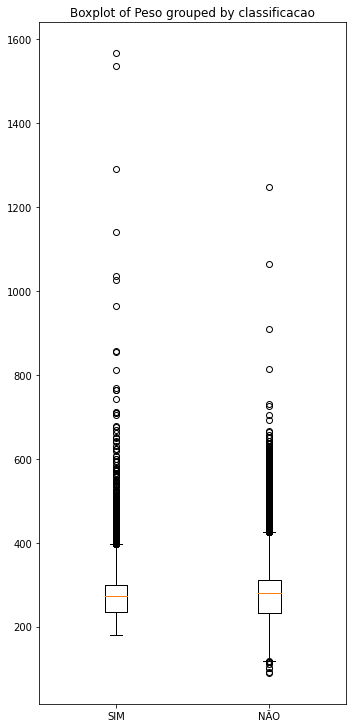

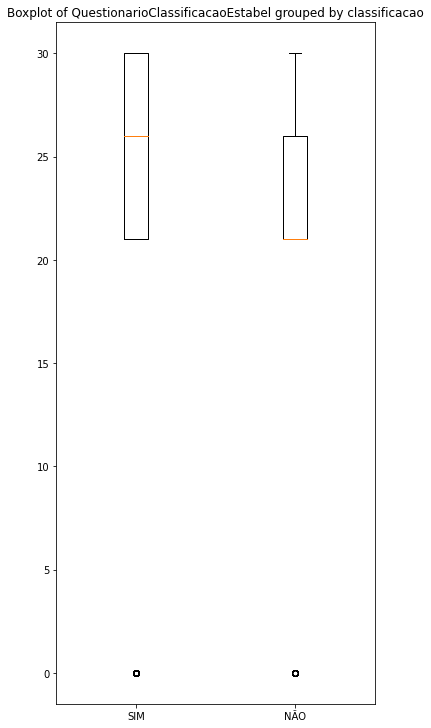

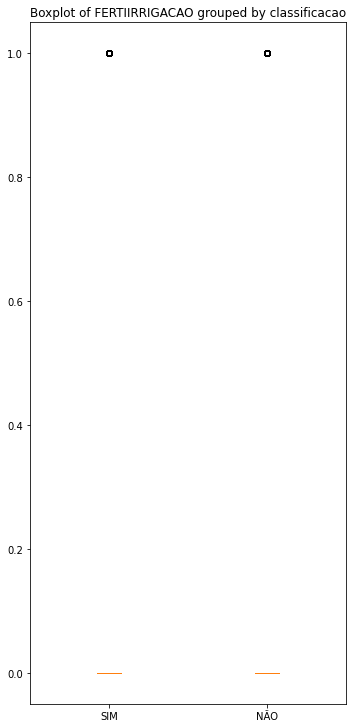

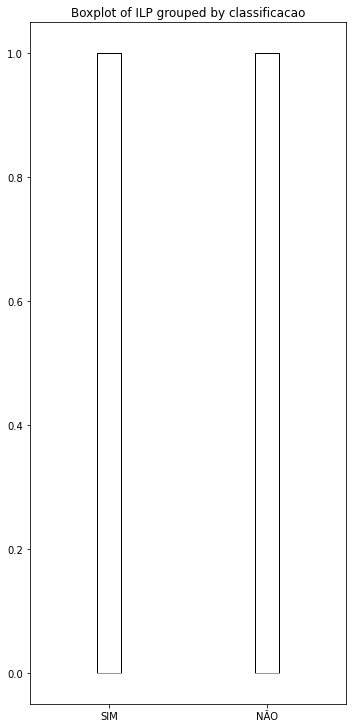

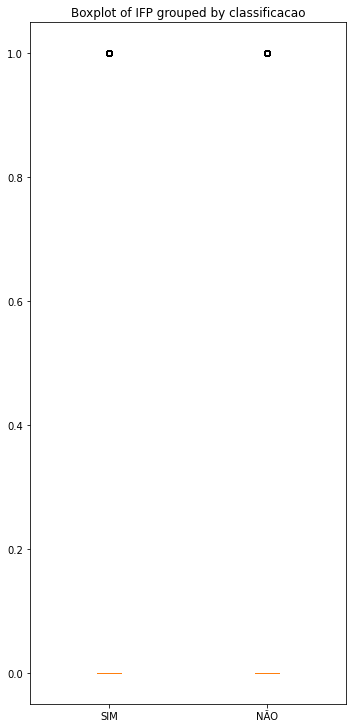

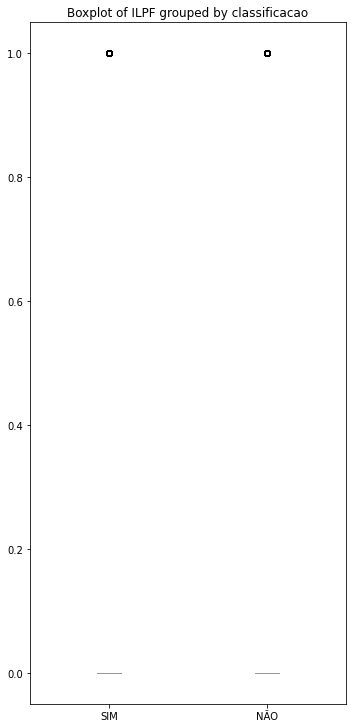

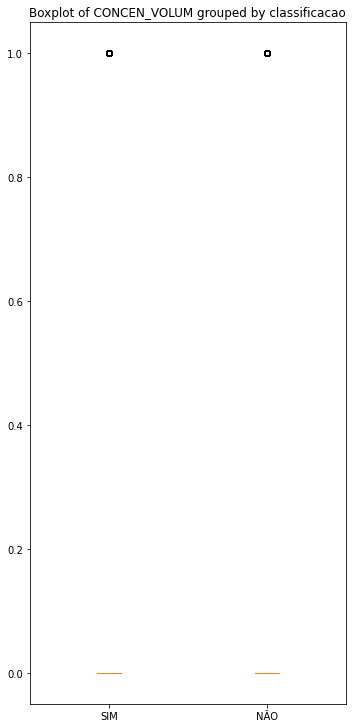

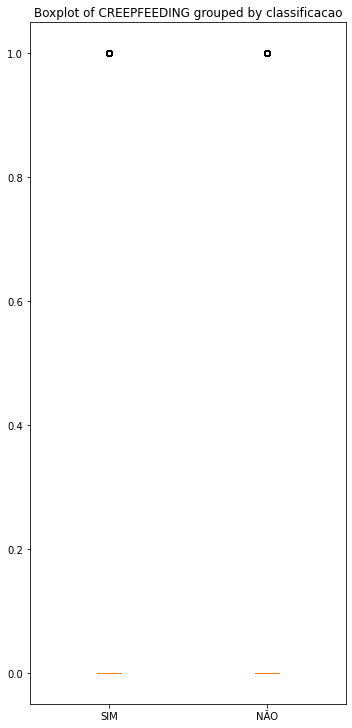

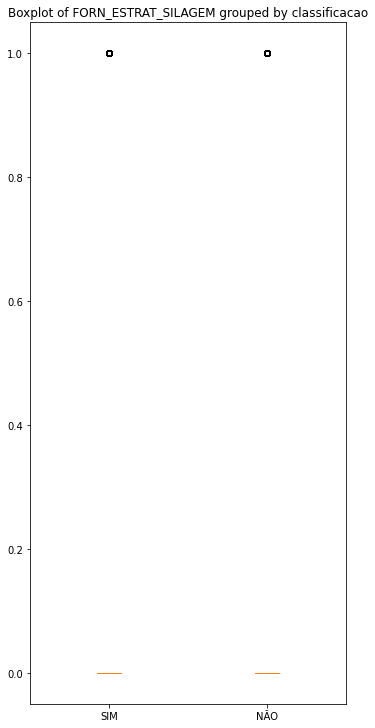

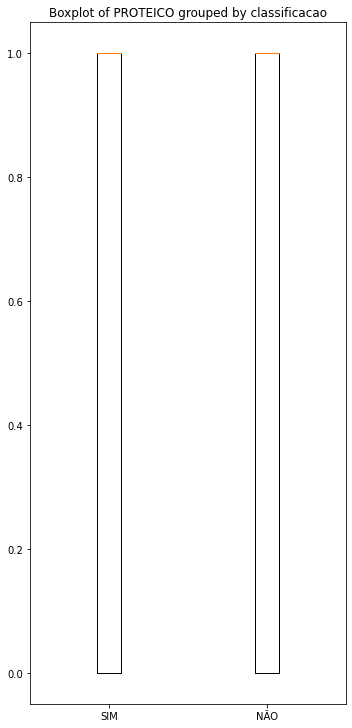

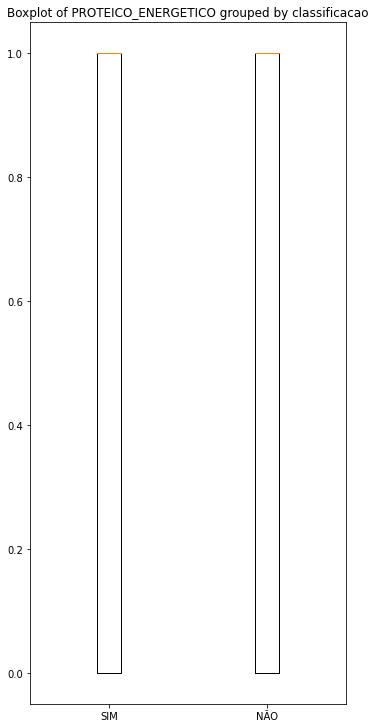

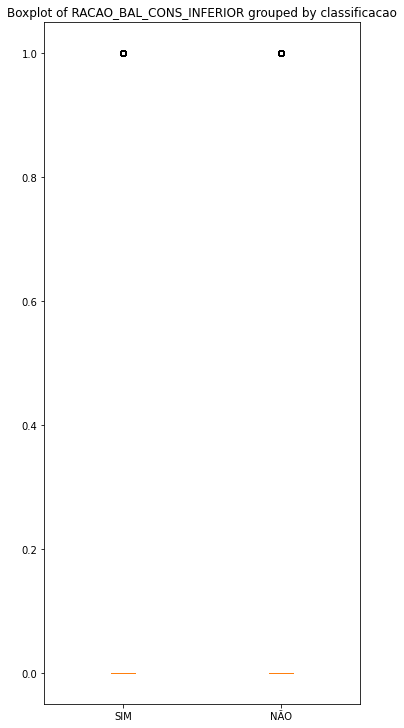

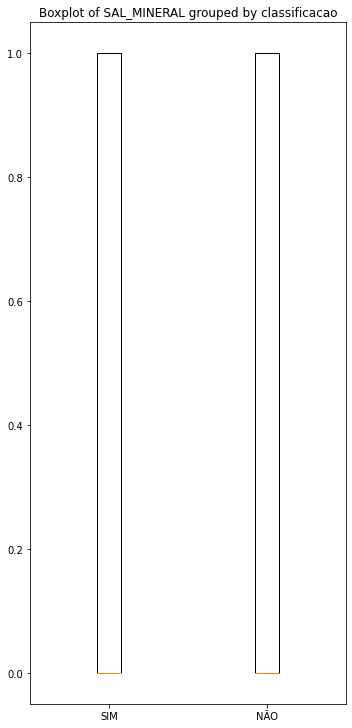

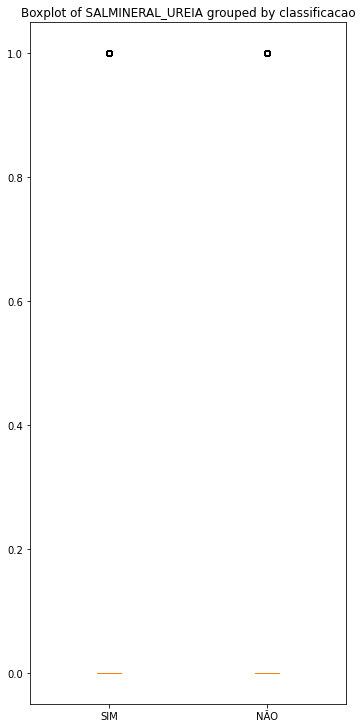

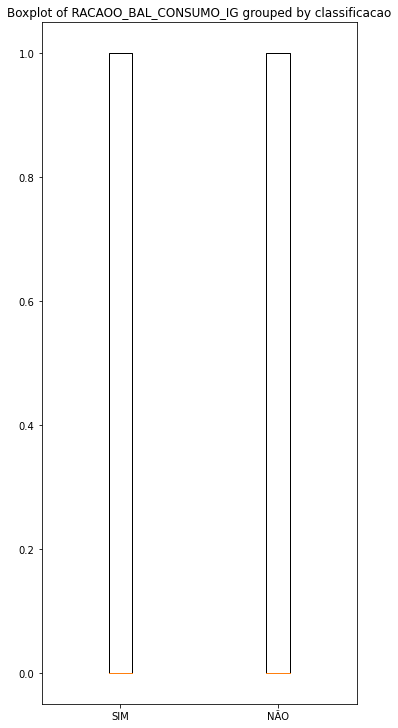

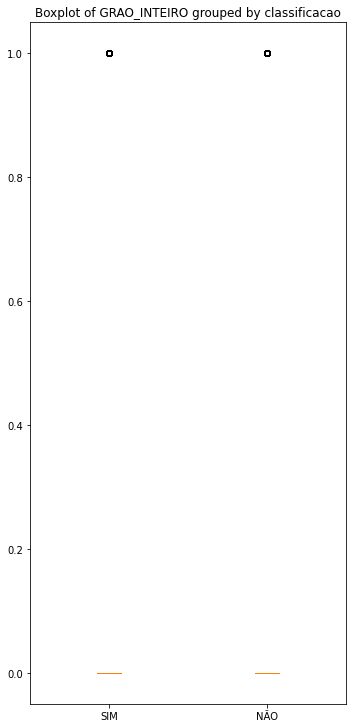

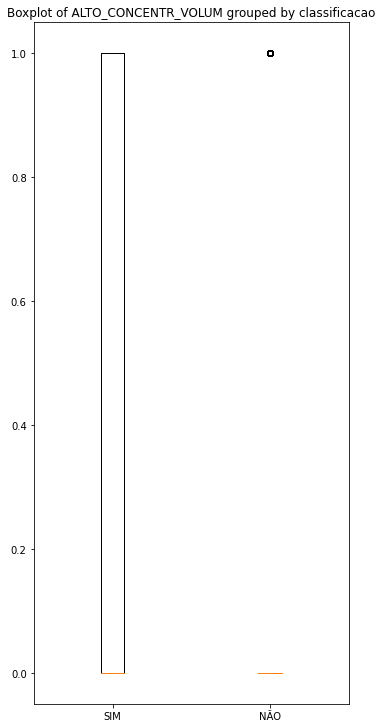

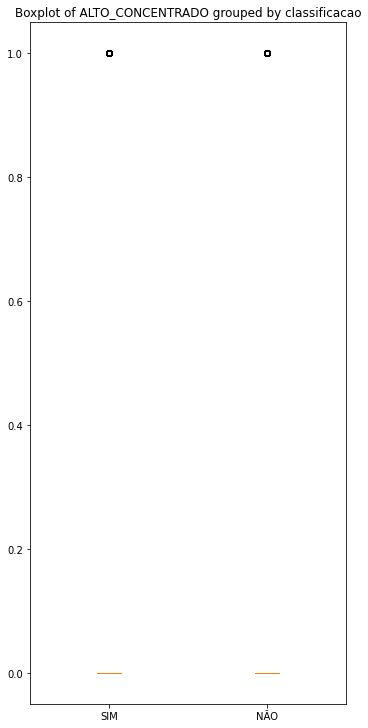

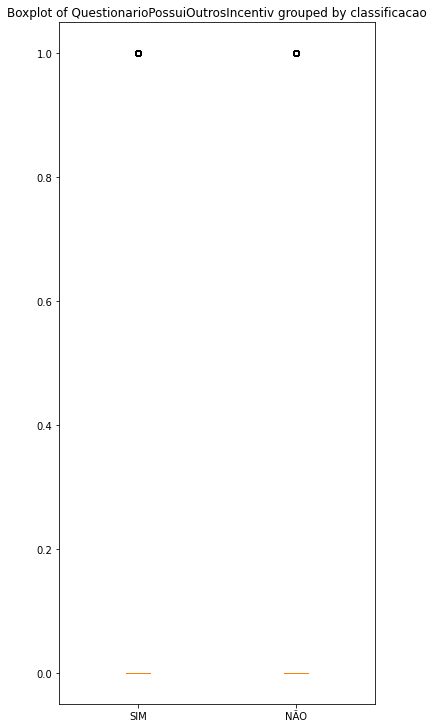

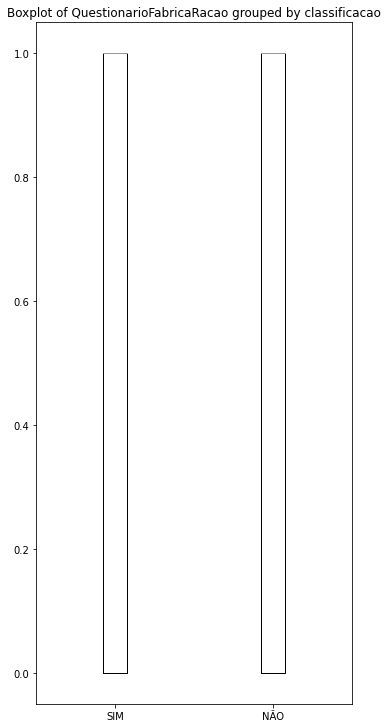

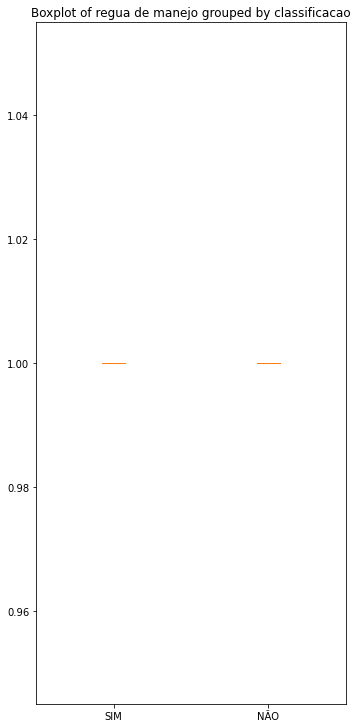

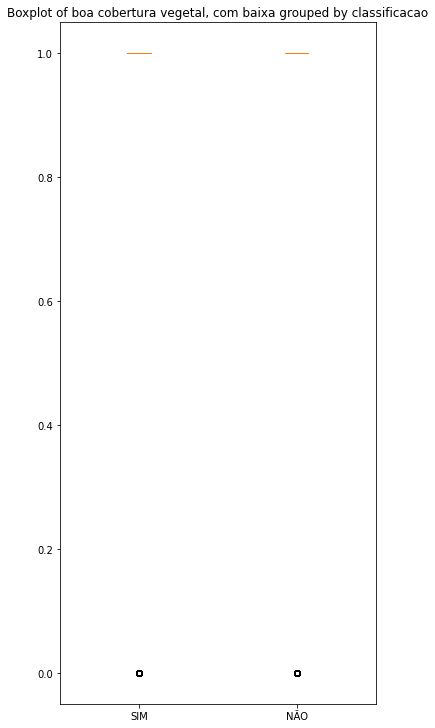

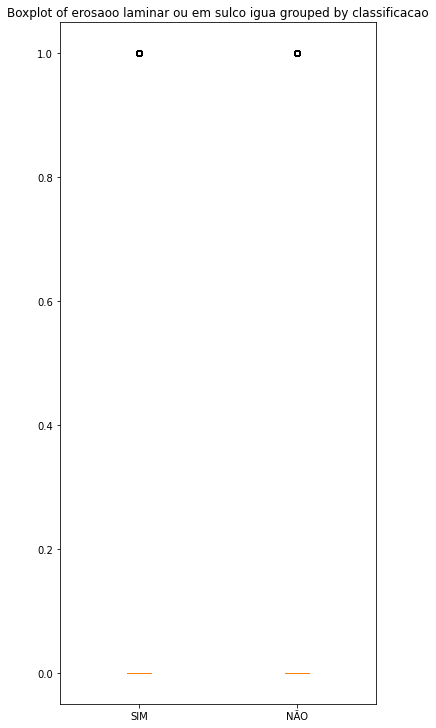

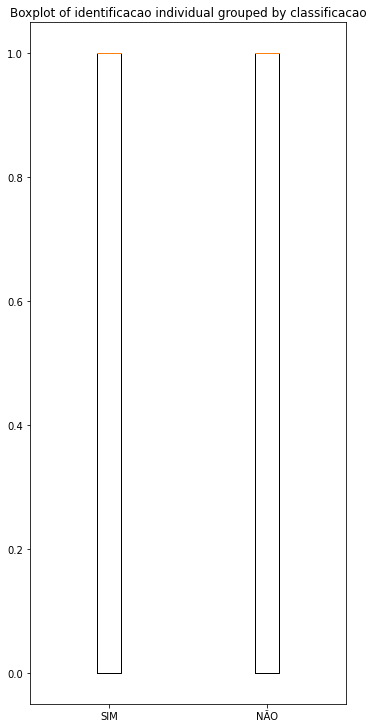

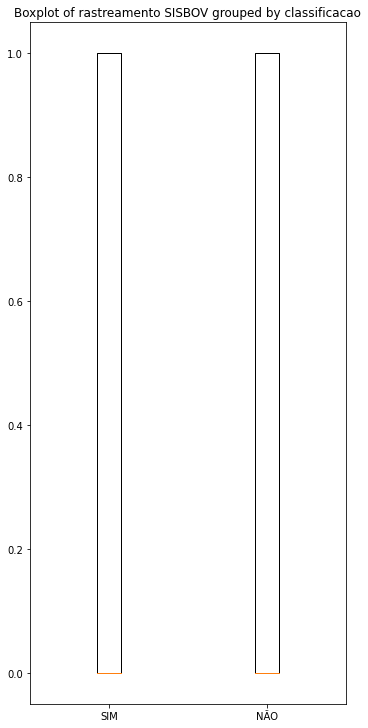

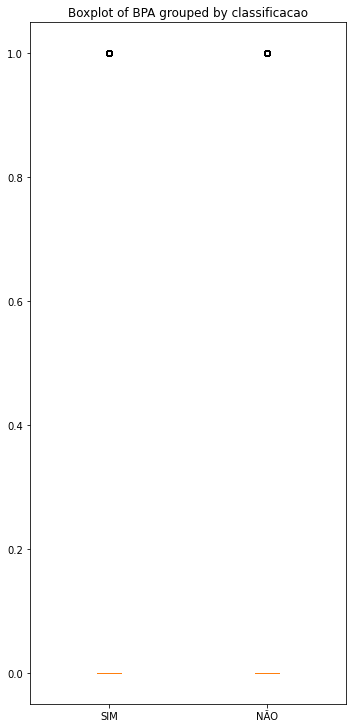

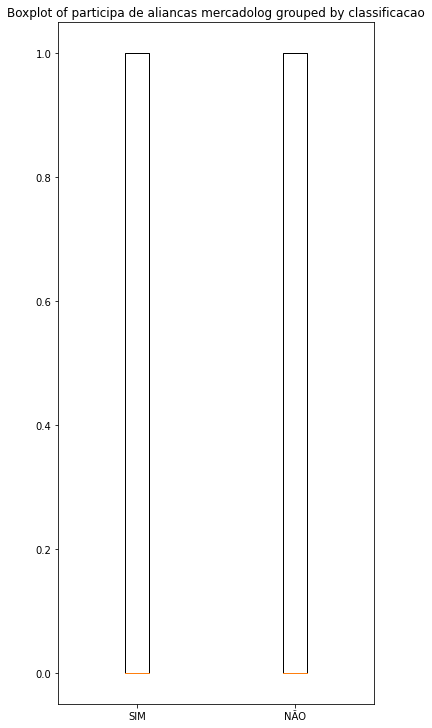

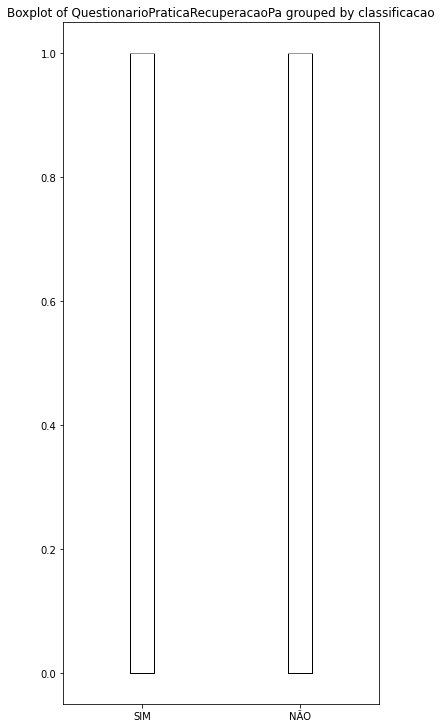

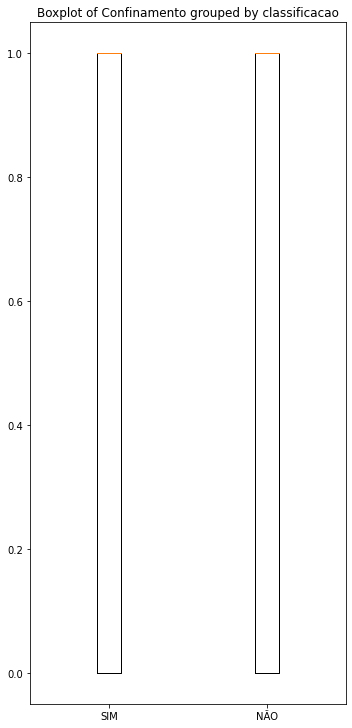

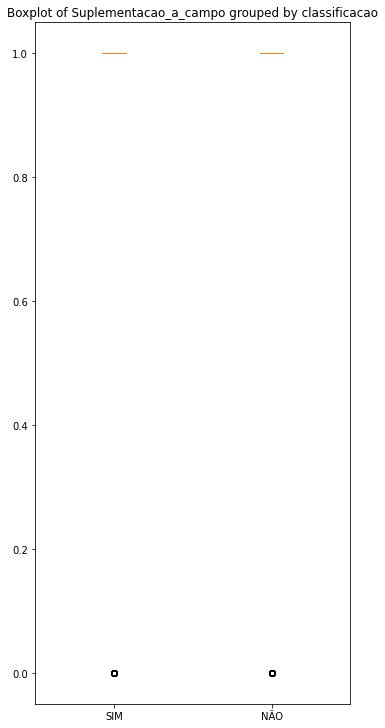

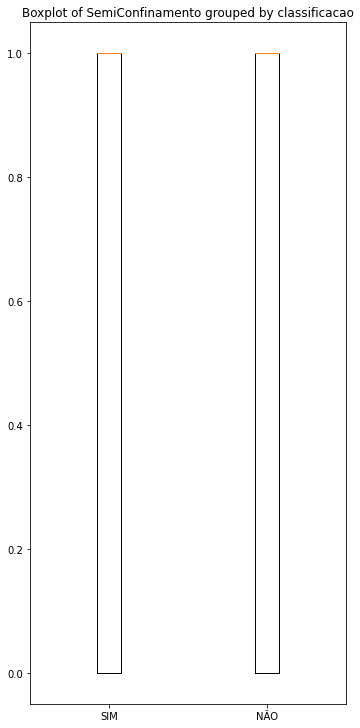

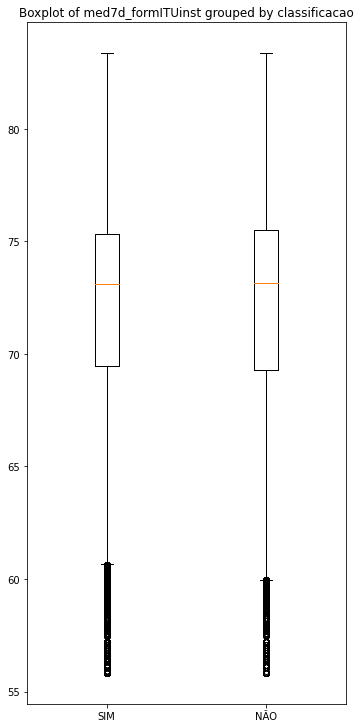

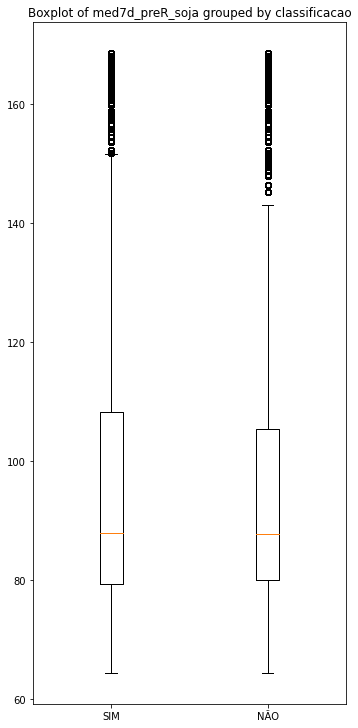

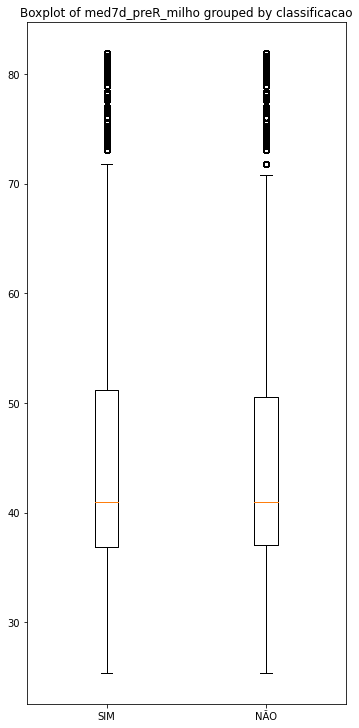

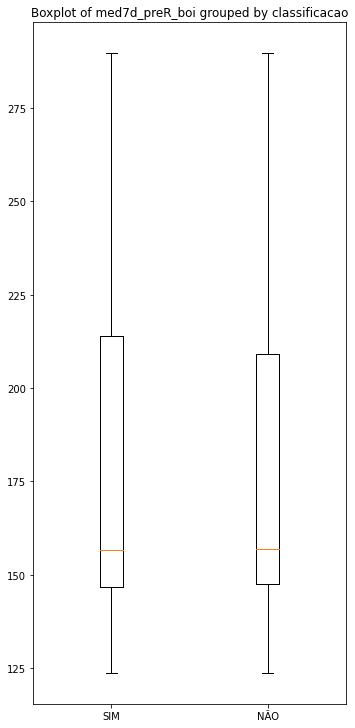

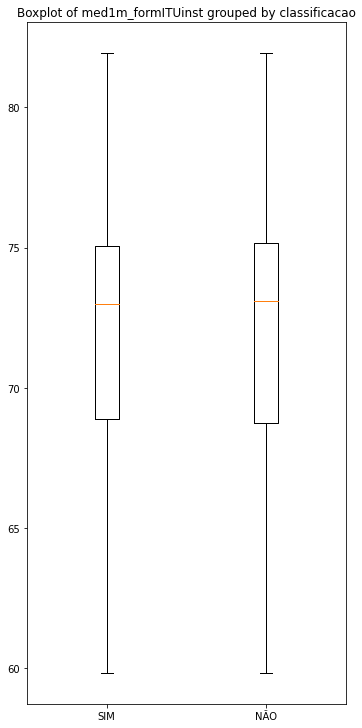

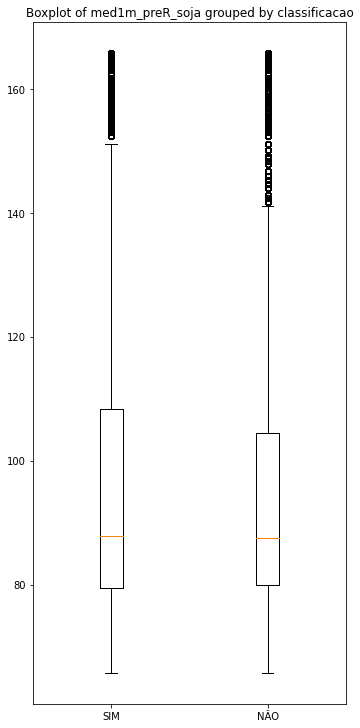

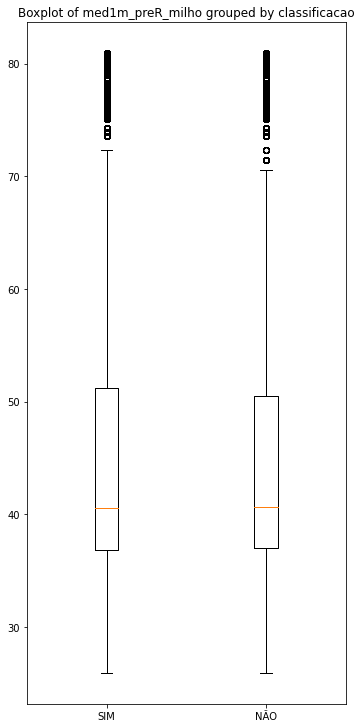

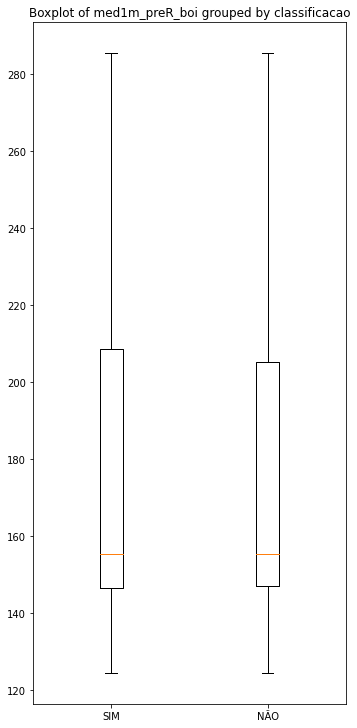

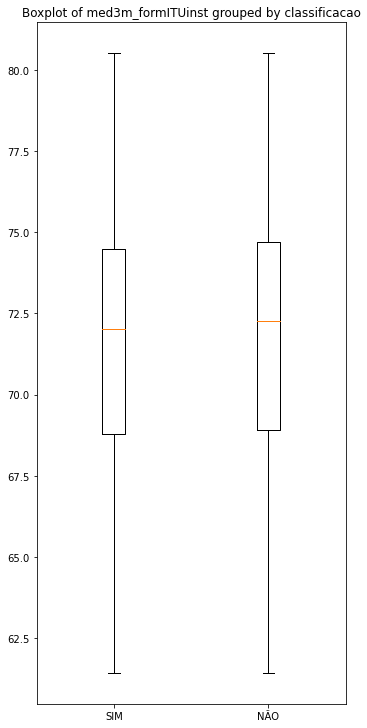

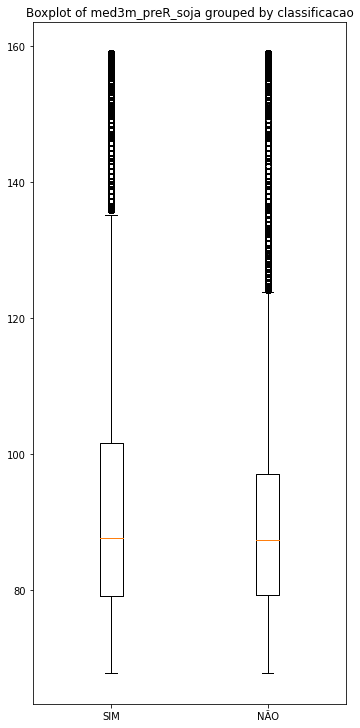

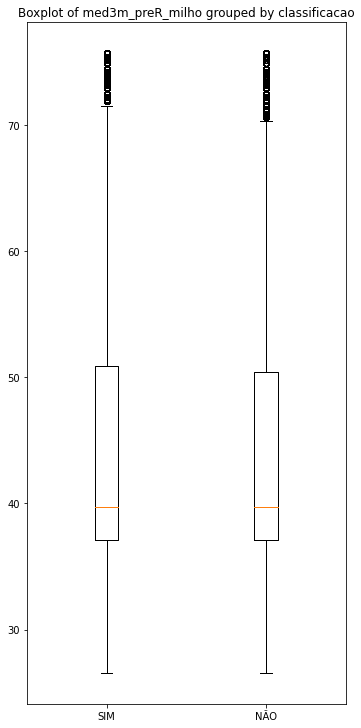

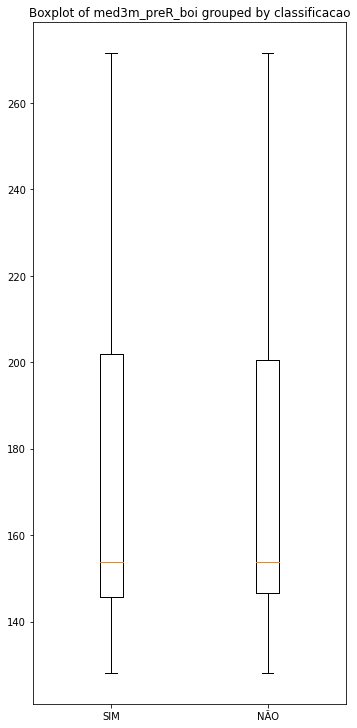

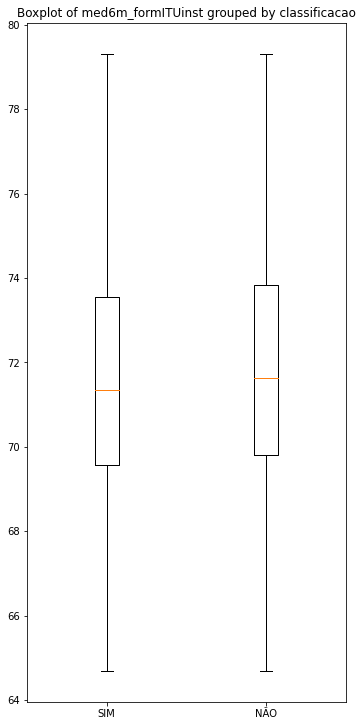

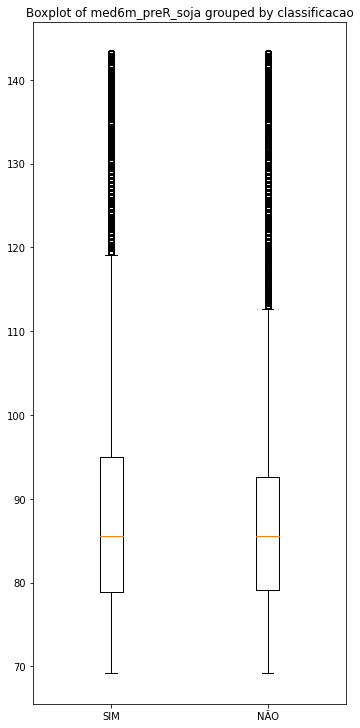

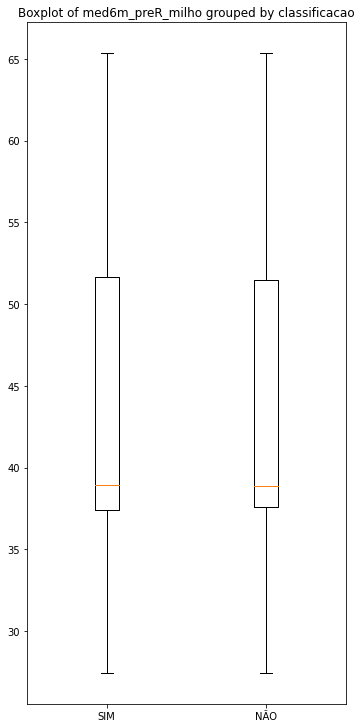

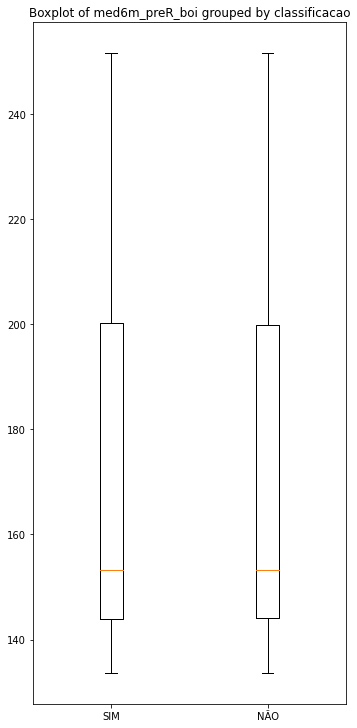

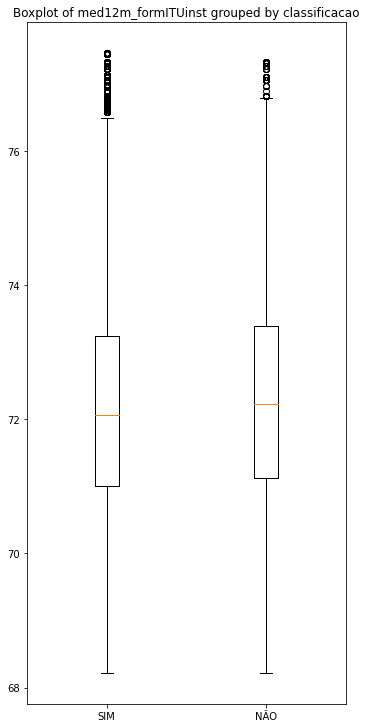

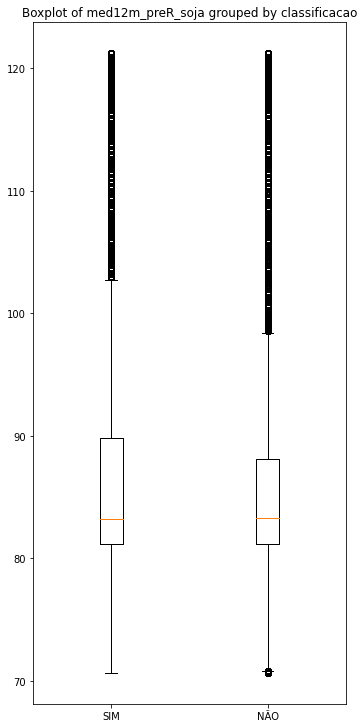

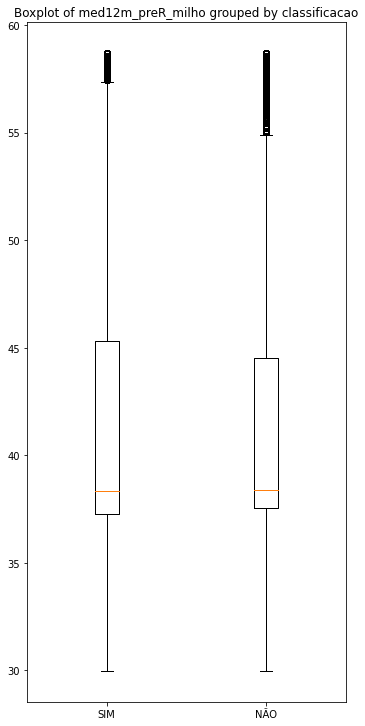

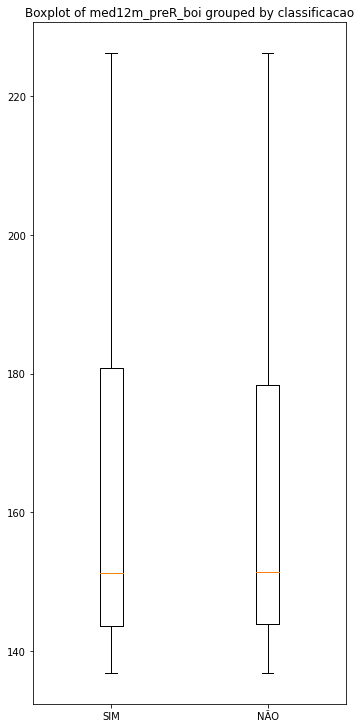

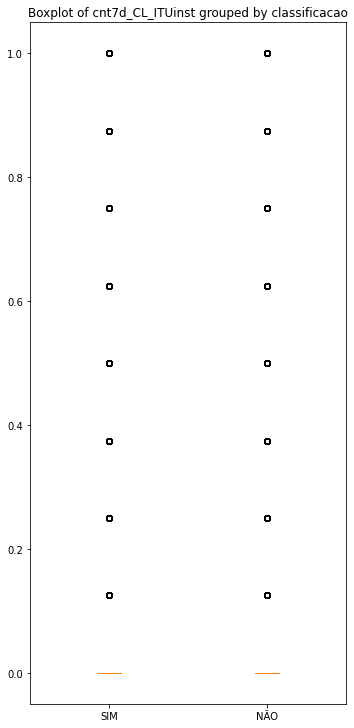

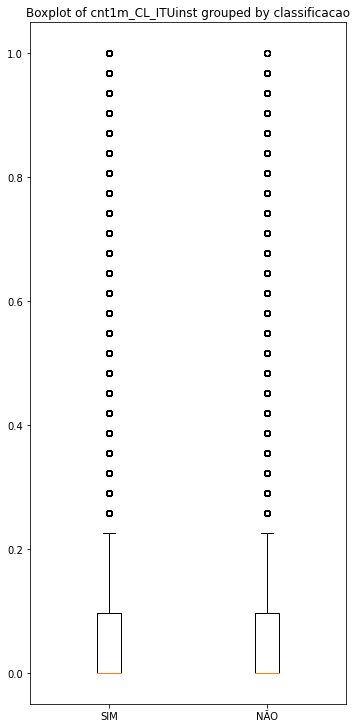

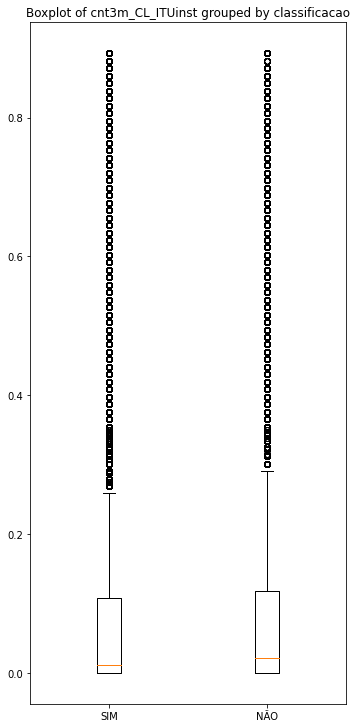

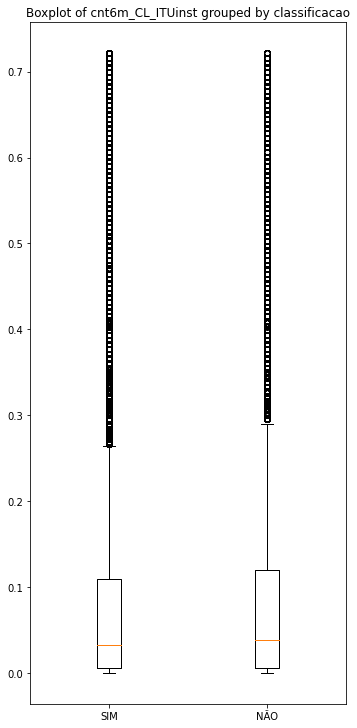

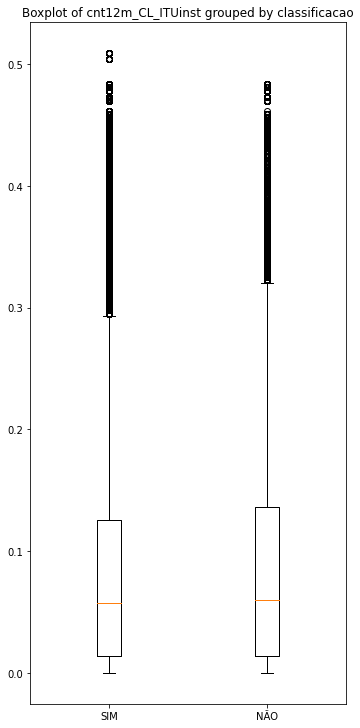

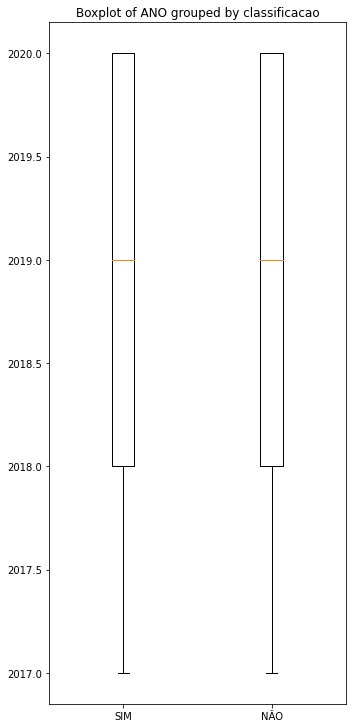



*****FIM IMPRIMIR BOXPLOT GROUPED BY TARGET******


In [ ]:
# Print boxplot for each attribute by target class
reports.boxplot_grouped_by_target(
    data_frame=precoce_ms_data_frame, target=settings.class_column)

## Print an attribute's outiliers

In [ ]:
# Print an attribute's outiliers
reports.detect_outiliers_from_attribute(
    data_frame=precoce_ms_data_frame, attribute_name='Peso')


*****INICIO DETECT OUTILIERS FROM ATTRIBUTE******
Outiliers for attribute "Peso":


8261      1566.000000
5332      1536.000000
5455      1291.199951
5980      1248.000000
5786      1140.000000
              ...    
2355368    110.000000
2236703    102.300003
3069078    102.000000
1156955     90.800003
1480110     90.000000
Name: Peso, Length: 56667, dtype: float32

*****FIM DETECT OUTILIERS FROM ATTRIBUTE******


## Unique values

In [ ]:
# Print the unique values for each column
reports.unique_values_for_each_column(
    data_frame=precoce_ms_data_frame
)


*****INICIO IMPRIMIR UNIQUE VALUES FOR EACH COLUMN******


EstabelecimentoMunicipio              75
DataAbate                           1116
Tipificacao                            3
Maturidade                             5
Acabamento                             5
Peso                                3777
QuestionarioClassificacaoEstabel       4
FERTIIRRIGACAO                         2
ILP                                    2
IFP                                    2
ILPF                                   2
CONCEN_VOLUM                           2
CREEPFEEDING                           2
FORN_ESTRAT_SILAGEM                    2
PROTEICO                               2
PROTEICO_ENERGETICO                    2
RACAO_BAL_CONS_INFERIOR                2
SAL_MINERAL                            2
SALMINERAL_UREIA                       2
RACAOO_BAL_CONSUMO_IG                  2
GRAO_INTEIRO                           2
ALTO_CONCENTR_VOLUM                    2
ALTO_CONCENTRADO                       2
QuestionarioPossuiOutrosIncentiv       2
QuestionarioFabr

*****FIM IMPRIMIR UNIQUE VALUES FOR EACH COLUMN******


In [ ]:
precoce_ms_data_frame[settings.class_column].value_counts()

SIM    2126831
NÃO     416230
Name: classificacao, dtype: int64

In [ ]:
for column in precoce_ms_data_frame.columns:
  try:
    print('Coluna: {} Variancia: {}'.format(column, precoce_ms_data_frame[column].var()))
  except:
    pass

Coluna: Peso Variancia: 2281.347412109375
Coluna: QuestionarioClassificacaoEstabel Variancia: 12.946052487378761
Coluna: FERTIIRRIGACAO Variancia: 0.10573559312948166
Coluna: ILP Variancia: 0.24880338434832885
Coluna: IFP Variancia: 0.047298579335953224
Coluna: ILPF Variancia: 0.044062929816520595
Coluna: CONCEN_VOLUM Variancia: 0.1612079400541439
Coluna: CREEPFEEDING Variancia: 0.07672995767413188
Coluna: FORN_ESTRAT_SILAGEM Variancia: 0.07372127177574284
Coluna: PROTEICO Variancia: 0.2471633409504197
Coluna: PROTEICO_ENERGETICO Variancia: 0.23749502498807268
Coluna: RACAO_BAL_CONS_INFERIOR Variancia: 0.1621871420678325
Coluna: SAL_MINERAL Variancia: 0.24575562148869354
Coluna: SALMINERAL_UREIA Variancia: 0.12863501294027577
Coluna: RACAOO_BAL_CONSUMO_IG Variancia: 0.24976344225656
Coluna: GRAO_INTEIRO Variancia: 0.06201280277637232
Coluna: ALTO_CONCENTR_VOLUM Variancia: 0.20185113694023707
Coluna: ALTO_CONCENTRADO Variancia: 0.011757463396811633
Coluna: QuestionarioPossuiOutrosIncent

## Percentage of unique values

In [ ]:
# Print the percentage of unique values for each column
reports.percentage_unique_values_for_each_column(
    data_frame=precoce_ms_data_frame, threshold=1
)


*****INICIO IMPRIMIR PERCENTAGE UNIQUE VALUES FOR EACH COLUMN******


,Coluna,total_Unique,Porcentagem
0,regua de manejo,1,0.000039
0,participa de aliancas mercadolog,2,0.000079
0,GRAO_INTEIRO,2,0.000079
0,ALTO_CONCENTR_VOLUM,2,0.000079
0,ALTO_CONCENTRADO,2,0.000079
0,QuestionarioPossuiOutrosIncentiv,2,0.000079
0,QuestionarioFabricaRacao,2,0.000079
0,"boa cobertura vegetal, com baixa",2,0.000079
0,erosaoo laminar ou em sulco igua,2,0.000079
0,identificacao individual,2,0.000079


*****FIM IMPRIMIR PERCENTAGE UNIQUE VALUES FOR EACH COLUMN******


## Delete columns with single value

In [7]:
# Identify columns that contain a single value, and delete them
precoce_ms_data_frame = pre_processing.delete_columns_with_single_value(
    data_frame=precoce_ms_data_frame
)



*****INICIO DELETE COLUMNS WITH SINGLE VALUE******
>>> Colunas removidas com valor único: ['regua de manejo']
*****FIM DELETE COLUMNS WITH SINGLE VALUE*********
Function delete_columns_with_single_value Took 0:00:01.585594



## Attributes that have a low variance


*****INICIO IMPRIMIR SIMULATE DELETE COLUMNS WITH LOW VARIANCE******
Shape do X antes: (2543061, 62).
X shape (Dados originais): (2543061, 62)
*****INICIO DELETE COLUNAS******
Coluna Peso excluída.
Coluna QuestionarioClassificacaoEstabel excluída.
Coluna FERTIIRRIGACAO excluída.
Coluna ILP excluída.
Coluna IFP excluída.
Coluna ILPF excluída.
Coluna CONCEN_VOLUM excluída.
Coluna CREEPFEEDING excluída.
Coluna FORN_ESTRAT_SILAGEM excluída.
Coluna PROTEICO excluída.
Coluna PROTEICO_ENERGETICO excluída.
Coluna RACAO_BAL_CONS_INFERIOR excluída.
Coluna SAL_MINERAL excluída.
Coluna SALMINERAL_UREIA excluída.
Coluna RACAOO_BAL_CONSUMO_IG excluída.
Coluna GRAO_INTEIRO excluída.
Coluna ALTO_CONCENTR_VOLUM excluída.
Coluna ALTO_CONCENTRADO excluída.
Coluna QuestionarioPossuiOutrosIncentiv excluída.
Coluna QuestionarioFabricaRacao excluída.
Coluna boa cobertura vegetal, com baixa excluída.
Coluna erosaoo laminar ou em sulco igua excluída.
Coluna identificacao individual excluída.
Coluna rastreamen

tcmalloc: large alloc 1139294208 bytes == 0x560760f0a000 @  0x7f1284b7b1e7 0x7f127e7a4064 0x7f127e7a47ff 0x7f127e802f55 0x7f127e8a6969 0x7f127e8a70b7 0x7f127e8a720c 0x56069be5ecbf 0x7f127e7ebeb4 0x56069bf7f8cf 0x56069bf40da8 0x56069bf9b673 0x56069bf6d132 0x56069bf6d7fb 0x56069bf1b149 0x56069bf6d768 0x56069bf41ede 0x7f127e7ebeb4 0x56069bf7f8cf 0x56069bf40da8 0x56069bf9b673 0x56069bf6d132 0x56069bf6d7fb 0x56069bf1b149 0x56069bf6d066 0x56069bf6d85f 0x56069bf1acc7 0x56069bf6d768 0x56069bf1ae14 0x56069bf6d768 0x56069bf1b254


*****INICIO DELETE COLUNAS******
*****FIM DELETE COLUNAS*********
>>> Threshold: 0.00
Número de colunas depois da remoção: 56
*****FIM DELETE COLUMNS WITH LOW VARIANCE*********

*****INICIO DELETE COLUMNS WITH LOW VARIANCE******
>>> Número de colunas antes da remoção: 56
*****INICIO DELETE COLUNAS******
Coluna QuestionarioPossuiOutrosIncentiv excluída.
Coluna ILPF excluída.
Coluna ALTO_CONCENTRADO excluída.
Coluna BPA excluída.
Coluna IFP excluída.
Coluna cnt7d_CL_ITUinst excluída.
Coluna cnt1m_CL_ITUinst excluída.
Coluna cnt12m_CL_ITUinst excluída.
Coluna boa cobertura vegetal, com baixa excluída.
Coluna cnt3m_CL_ITUinst excluída.
Coluna erosaoo laminar ou em sulco igua excluída.
Coluna cnt6m_CL_ITUinst excluída.
*****FIM DELETE COLUNAS*********
>>> Threshold: 0.05
Número de colunas depois da remoção: 44
*****FIM DELETE COLUMNS WITH LOW VARIANCE*********

Shape do X depois: (2543061, 50).
Figure plot-simulate-delete-columns-with-low-variance-08-10-2022_20:10:42.png saved in ./plots/ d

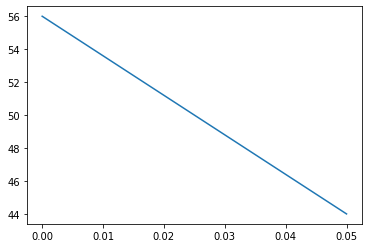


*****FIM IMPRIMIR SIMULATE DELETE COLUMNS WITH LOW VARIANCE******


In [ ]:
# Simulate delete columns with low variance, using VarianceThreshold from sklearn
reports.simulate_delete_columns_with_low_variance(
    data_frame=precoce_ms_data_frame,
    thresholds=np.arange(0.0, 0.10, 0.05),
    separate_numeric_columns=True,
    path_save_fig=settings.PATH_SAVE_PLOTS,
    display_figure=True
)


## Apply encoders and move target to last position in dataframe

In [7]:
# Apply ordinal encoder to the columns
precoce_ms_data_frame, settings.columns_ordinal_encoded = pre_processing.ordinal_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_ordinal_encoded=settings.columns_ordinal_encoded,
    columns_names=settings.ordinal_encoder_columns_names
)



*****INICIO ORDINAL ENCODER******
*****FIM ORDINAL ENCODER*********
Function ordinal_encoder_columns Took 0:00:02.686104



In [8]:
# Apply label encoder to the columns
precoce_ms_data_frame, settings.columns_label_encoded = pre_processing.label_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_label_encoded=settings.columns_label_encoded,
    columns_names=settings.label_encoder_columns_names
)



*****INICIO LABEL ENCODER******
*****FIM LABEL ENCODER*********
Function label_encoder_columns Took 0:00:01.294852



In [9]:
# Apply one hot encoder to the columns
precoce_ms_data_frame, settings.columns_one_hot_encoded = pre_processing.one_hot_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_one_hot_encoded=settings.columns_one_hot_encoded,
    columns_names=settings.one_hot_encoder_columns_names
)



*****INICIO ONE-HOT ENCODER******
*****INICIO DELETE COLUNAS******
Coluna EstabelecimentoMunicipio excluída.
*****FIM DELETE COLUNAS*********
*****INICIO DELETE COLUNAS******
Coluna Tipificacao excluída.
*****FIM DELETE COLUNAS*********
*****INICIO DELETE COLUNAS******
Coluna ANO excluída.
*****FIM DELETE COLUNAS*********
*****FIM ONE-HOT ENCODER*********
Function one_hot_encoder_columns Took 0:00:12.348746



In [10]:
# Apply min max scaler to the columns
precoce_ms_data_frame, settings.columns_min_max_scaled = pre_processing.min_max_scaler_columns(
    data_frame=precoce_ms_data_frame, columns_min_max_scaled=settings.columns_min_max_scaled,
    columns_names=settings.min_max_scaler_columns_names
)



*****INICIO MIN-MAX SCALER******
!!!>>> Coluna med1m_preR_soja não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med1m_preR_milho não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med1m_preR_boi não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med3m_preR_boi não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med6m_preR_soja não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med6m_preR_boi não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med12m_preR_milho não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med12m_preR_boi não encontrada no DataFrame para min-max scaler.
*****FIM MIN-MAX SCALER*********
Function min_max_scaler_columns Took 0:00:00.628271



In [11]:
# Move the target column to the last position in dataframe
precoce_ms_data_frame = utils.move_cloumns_last_positions(
    data_frame=precoce_ms_data_frame, columns_names=[settings.class_column])

## Target attribute distribution

In [12]:
# Target attribute distribution
reports.class_distribution(
    y=precoce_ms_data_frame[settings.class_column].values)


*****INICIO RELATÓRIO DISTRIBUIÇÃO DE CLASSES******
Distribuição da classe 1: 84%
Distribuição da classe 0: 16%
Erro majoritário: 16%
*****FIM RELATÓRIO DISTRIBUIÇÃO DE CLASSES******
Function class_distribution Took 0:00:00.045325



## Correlation matrix

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

*Spearman's Correlation, Further, the two variables being considered may have a non-Gaussian distribution.*

### Pearson method

In [ ]:
# Correlation matrix using pearson method, between all attributes
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='pearson',
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS,
    print_corr_matrix_summarized=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Correlation matrix using pearson method, between all attributes and the class attribute
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='pearson', attribute=settings.class_column,
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS)


*****INICIO CORRELATION MATRIX******


tcmalloc: large alloc 2888925184 bytes == 0x558140ca8000 @  0x7fb68ffd41e7 0x7fb68b272064 0x7fb68b2727ff 0x7fb68b2d0f55 0x7fb68b2d292b 0x7fb68b3709eb 0x557f5d59a753 0x557f5d570cc7 0x557f5d5c3066 0x557f5d5ce4c6 0x557f5d570cc7 0x557f5d5c3066 0x557f5d5ce4c6 0x557f5d570cc7 0x557f5d5c3066 0x557f5d5ce4c6 0x557f5d570cc7 0x557f5d5c3066 0x557f5d5ce4c6 0x557f5d570cc7 0x557f5d5c3066 0x557f5d5c385f 0x557f5d570cc7 0x557f5d5c29c9 0x557f5d60ce8f 0x557f5d59a61d 0x557f5d570e14 0x557f5d5add84 0x557f5d570fab 0x557f5d5add84 0x557f5d570fab


,classificacao
classificacao,1.000000
CATEGORIA,0.774385
Acabamento,0.123250
QuestionarioClassificacaoEstabel,0.094529
participa de aliancas mercadolog,0.074836
rastreamento SISBOV,0.072497
QuestionarioFabricaRacao,0.068068
identificacao individual,0.067778
Confinamento,0.058228
Tipificacao_Fêmea,0.055999


[1020/132211.176402:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1020/132211.179156:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1020/132211.182671:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1020/132211.228154:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1020/132211.509245:INFO:headless_shell.cc(660)] Written to file /tmp/tmp6hkq6zhv/temp.png.
[1020/132211.812826:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1020/132211.814823:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1020/132211.816662:WARNING:bluez_dbus_manag

Figure correlation_matrix-pearson-classificacao-20-10-2022_13:22:10.png saved in ./plots/ directory.
*****FIM CORRELATION MATRIX*********


### Spearman method

In [ ]:
# Correlation matrix using spearman method, between all attributes
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='spearman',
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS,
    print_corr_matrix_summarized=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Correlation matrix using spearman method, between all attributes and the class attribute
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='spearman', attribute=settings.class_column,
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS)


*****INICIO CORRELATION MATRIX******


tcmalloc: large alloc 2888925184 bytes == 0x5580f20dc000 @  0x7fb68ffd41e7 0x7fb68b272064 0x7fb68b2727ff 0x7fb68b2d0f55 0x7fb68b2d292b 0x7fb68b3709eb 0x557f5d59a753 0x557f5d570cc7 0x557f5d5c3066 0x557f5d5ce4c6 0x557f5d570cc7 0x557f5d5c3066 0x557f5d5ce4c6 0x557f5d570cc7 0x557f5d5c3066 0x557f5d5ce4c6 0x557f5d570cc7 0x557f5d5c3066 0x557f5d5ce4c6 0x557f5d570cc7 0x557f5d5c3066 0x557f5d5c385f 0x557f5d570cc7 0x557f5d5c29c9 0x557f5d60ce8f 0x557f5d59a61d 0x557f5d570e14 0x557f5d5add84 0x557f5d570fab 0x557f5d5add84 0x557f5d570fab
tcmalloc: large alloc 2888925184 bytes == 0x55819e3f4000 @  0x7fb68ffd41e7 0x7fb68b272064 0x7fb68b2727ff 0x7fb68b2d0f55 0x7fb68b2d292b 0x7fb68b3709eb 0x557f5d59a753 0x557f5d597ede 0x7fb6850c1ce9 0x7fb6851900c8 0x557f5d5d5834 0x557f5d596da8 0x557f5d5f2ea6 0x557f5d5c3066 0x557f5d5ce4c6 0x557f5d570cc7 0x557f5d5c3066 0x557f5d5c385f 0x557f5d570cc7 0x557f5d5c29c9 0x557f5d60ce8f 0x557f5d59a61d 0x557f5d570e14 0x557f5d5add84 0x557f5d570fab 0x557f5d5add84 0x557f5d570fab 0x557f5d5a

,classificacao
classificacao,1.000000
CATEGORIA,0.655084
Acabamento,0.113986
QuestionarioClassificacaoEstabel,0.095070
participa de aliancas mercadolog,0.074836
rastreamento SISBOV,0.072497
QuestionarioFabricaRacao,0.068068
identificacao individual,0.067778
Confinamento,0.058228
Tipificacao_Fêmea,0.055999


[1020/134300.081663:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1020/134300.085436:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1020/134300.086542:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1020/134300.133195:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1020/134300.423386:INFO:headless_shell.cc(660)] Written to file /tmp/tmp3j0d8oov/temp.png.
[1020/134300.729930:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1020/134300.730041:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[1020/134300.734075:WARNING:bluez_dbus_manag

Figure correlation_matrix-spearman-classificacao-20-10-2022_13:42:59.png saved in ./plots/ directory.
*****FIM CORRELATION MATRIX*********


### Delete features by correlation

In [14]:
# Delete features by correlation
precoce_ms_data_frame = pre_processing.drop_feature_by_correlation(
    data_frame=precoce_ms_data_frame,
    method='spearman',
    columns_names=settings.columns_names_drop_feature_by_correlation)


*****INICIO DROP FEATURE BY CORRELATION******
>>> Correlação, para o limite de 0.95, entre o atributo med7d_preR_soja e o(s) atributo(s) ['med1m_preR_soja'] foi encontrada.
>>>>Removendo o(s) atributo(s) do dataframe.
!!!>>> Coluna med1m_preR_soja não encontrada no DataFrame para drop feature by correlation.
>>> Correlação, para o limite de 0.95, entre o atributo med3m_preR_soja e o(s) atributo(s) ['med6m_preR_soja'] foi encontrada.
>>>>Removendo o(s) atributo(s) do dataframe.
!!!>>> Coluna med6m_preR_soja não encontrada no DataFrame para drop feature by correlation.
>>> Correlação, para o limite de 0.95, entre o atributo med12m_preR_soja e o(s) atributo(s) ['med12m_preR_milho'] foi encontrada.
>>>>Removendo o(s) atributo(s) do dataframe.
>>> Correlação, para o limite de 0.95, entre o atributo med7d_preR_milho e o(s) atributo(s) ['med1m_preR_milho'] foi encontrada.
>>>>Removendo o(s) atributo(s) do dataframe.
>>> Correlação, para o limite de 0.95, entre o atributo med7d_preR_boi e o(s

In [15]:
# Apply inverse ordinal encoder to the columns
precoce_ms_data_frame, settings.columns_ordinal_encoded = pre_processing.inverse_ordinal_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_ordinal_encoded=settings.columns_ordinal_encoded)

# Apply inverse label encoder to the columns
precoce_ms_data_frame, settings.columns_label_encoded = pre_processing.inverse_label_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_label_encoded=settings.columns_label_encoded)

# Apply inverse one hot encoder to the columns
precoce_ms_data_frame, settings.columns_one_hot_encoded = pre_processing.inverse_one_hot_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_one_hot_encoded=settings.columns_one_hot_encoded)

# Apply inverse min max scaler to the columns
precoce_ms_data_frame, settings.columns_min_max_scaled = pre_processing.inverse_min_max_scaler_columns(
    data_frame=precoce_ms_data_frame, columns_min_max_scaled=settings.columns_min_max_scaled)

# Move the target column to the last position in dataframe
precoce_ms_data_frame = utils.move_cloumns_last_positions(
    data_frame=precoce_ms_data_frame, columns_names=[settings.class_column])

# Save dataframe to csv file
csv_treatments.generate_new_csv(
    data_frame=precoce_ms_data_frame,
    csv_path='/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/base_dados/TAB_MODELAGEM_RAFAEL_2020_1-after_drop_feature_by_correlation-{}.csv'.format(
        utils.get_current_datetime()
    )
)


*****INICIO INVERSE ORDINAL ENCODER******
*****FIM INVERSE ORDINAL ENCODER*********
Function inverse_ordinal_encoder_columns Took 0:00:00.673152


*****INICIO INVERSE LABEL ENCODER******
*****FIM INVERSE LABEL ENCODER*********
Function inverse_label_encoder_columns Took 0:00:00.251488


*****INICIO INVERSE ONE-HOT ENCODER******
*****INICIO DELETE COLUNAS******
Coluna EstabelecimentoMunicipio_AGUA CLARA excluída.
Coluna EstabelecimentoMunicipio_ALCINOPOLIS excluída.
Coluna EstabelecimentoMunicipio_AMAMBAI excluída.
Coluna EstabelecimentoMunicipio_ANASTACIO excluída.
Coluna EstabelecimentoMunicipio_ANAURILANDIA excluída.
Coluna EstabelecimentoMunicipio_ANGELICA excluída.
Coluna EstabelecimentoMunicipio_ANTONIO JOAO excluída.
Coluna EstabelecimentoMunicipio_APARECIDA DO TABOADO excluída.
Coluna EstabelecimentoMunicipio_AQUIDAUANA excluída.
Coluna EstabelecimentoMunicipio_ARAL MOREIRA excluída.
Coluna EstabelecimentoMunicipio_BANDEIRANTES excluída.
Coluna EstabelecimentoMunicipio_BATAGUAS

## Calcule feature importance with linear models


*****INICIO IMPRIMIR FEATURE IMPORTANCE USING COEFFICIENTS OF LINEAR MODELS******


Model: LogisticRegression(class_weight='balanced', n_jobs=3)

Feature importance using coefficients of linear models:


/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/.venv-precoce-ms/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Importance
50,CATEGORIA,3.974607
127,Tipificacao_Macho Castrado,0.767815
41,med6m_formITUinst,0.168581
11,FORN_ESTRAT_SILAGEM,0.164831
76,EstabelecimentoMunicipio_CORUMBA,0.163868
119,EstabelecimentoMunicipio_SIDROLANDIA,0.145056
1,Maturidade,0.143312
48,cnt6m_CL_ITUinst,0.127619
126,Tipificacao_Fêmea,0.114786
47,cnt3m_CL_ITUinst,0.110466


Figure bar-feature_importance_using_coefficients_of_linear_models-LogisticRegression-05-11-2022_19:11:52.png saved in ./plots/ directory.


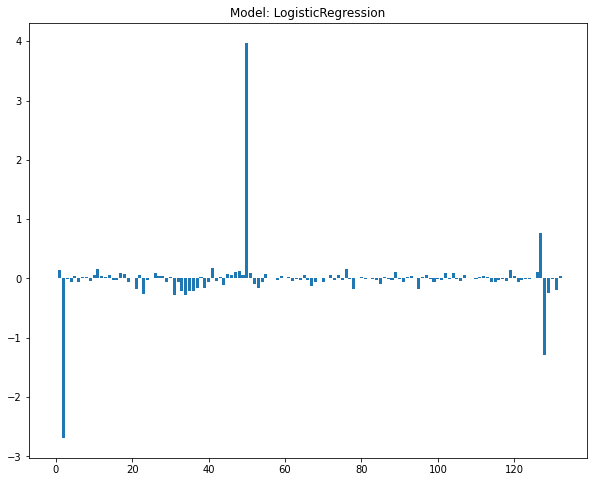



Model: LinearSVC(class_weight='balanced')

Feature importance using coefficients of linear models:


/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/.venv-precoce-ms/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Feature,Importance
40,med3m_preR_milho,1.283050
3,Peso,0.992924
50,CATEGORIA,0.911864
49,cnt12m_CL_ITUinst,0.348700
44,med12m_preR_soja,0.266332
38,med3m_formITUinst,0.265255
34,med7d_preR_soja,0.194990
35,med7d_preR_milho,0.187402
72,EstabelecimentoMunicipio_CASSILANDIA,0.142125
86,EstabelecimentoMunicipio_INOCENCIA,0.119936


Figure bar-feature_importance_using_coefficients_of_linear_models-LinearSVC-05-11-2022_19:36:11.png saved in ./plots/ directory.


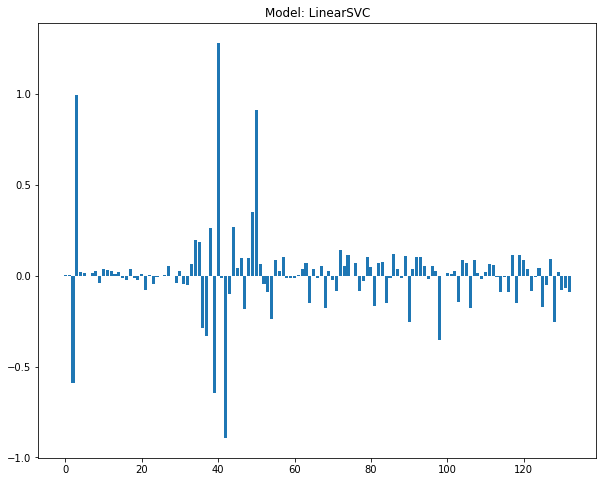



Model: SGDClassifier(class_weight='balanced', n_jobs=3)

Feature importance using coefficients of linear models:


,Feature,Importance
23,"boa cobertura vegetal, com baixa",13.487229
127,Tipificacao_Macho Castrado,10.936776
126,Tipificacao_Fêmea,9.959877
129,ANO_2017,9.055581
130,ANO_2018,8.206538
41,med6m_formITUinst,7.994837
50,CATEGORIA,7.697447
128,Tipificacao_Macho Inteiro,7.668662
131,ANO_2019,7.442863
42,med6m_preR_milho,5.014258


Figure bar-feature_importance_using_coefficients_of_linear_models-SGDClassifier-05-11-2022_19:37:38.png saved in ./plots/ directory.


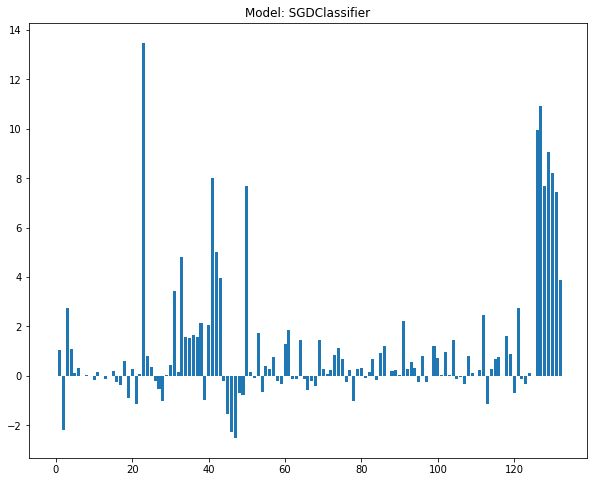

*****FIM IMPRIMIR FEATURE IMPORTANCE USING COEFFICIENTS OF LINEAR MODELS******
Function feature_importance_using_coefficients_of_linear_models Took 0:27:34.811476



In [21]:
# Calculate feature importance with linear models
reports.feature_importance_using_coefficients_of_linear_models(
    data_frame=precoce_ms_data_frame,
    models=['logistic_regression', 'linear_svc', 'sgd_classifier'],
    path_save_fig=settings.PATH_SAVE_PLOTS,
    display_figure=True,
    class_weight='balanced',
    n_jobs=settings.n_jobs
)


## Calcule feature importance with tree based models


*****INICIO IMPRIMIR FEATURE IMPORTANCE USING TREE BASED MODELS******


Model: DecisionTreeClassifier(class_weight='balanced')

Feature importance using tree based models:


,Feature,Importance
50,CATEGORIA,0.980030
3,Peso,0.013265
1,Maturidade,0.000506
2,Acabamento,0.000491
35,med7d_preR_milho,0.000342
43,med12m_formITUinst,0.000338
41,med6m_formITUinst,0.000325
33,med7d_formITUinst,0.000299
37,med1m_formITUinst,0.000280
0,DataAbate,0.000270


Figure bar-feature_importance_using_tree_based_models-DecisionTreeClassifier-05-11-2022_19:38:54.png saved in ./plots/ directory.


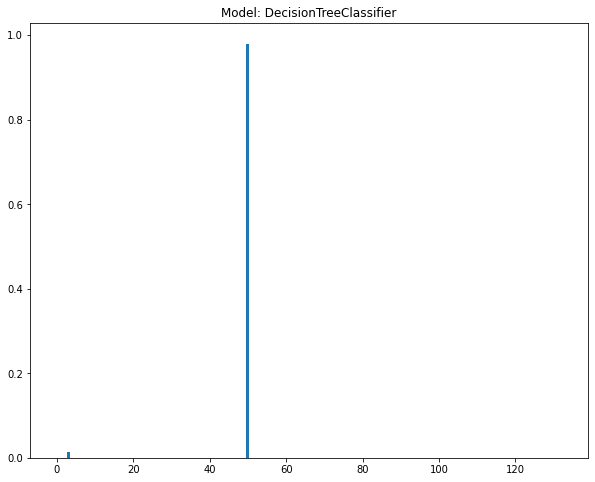



Model: RandomForestClassifier(class_weight='balanced', n_jobs=3)

Feature importance using tree based models:


,Feature,Importance
50,CATEGORIA,0.581355
1,Maturidade,0.263501
3,Peso,0.068981
2,Acabamento,0.013231
128,Tipificacao_Macho Inteiro,0.008388
126,Tipificacao_Fêmea,0.004765
127,Tipificacao_Macho Castrado,0.004690
4,QuestionarioClassificacaoEstabel,0.003734
43,med12m_formITUinst,0.002351
26,rastreamento SISBOV,0.002190


Figure bar-feature_importance_using_tree_based_models-RandomForestClassifier-05-11-2022_19:42:35.png saved in ./plots/ directory.


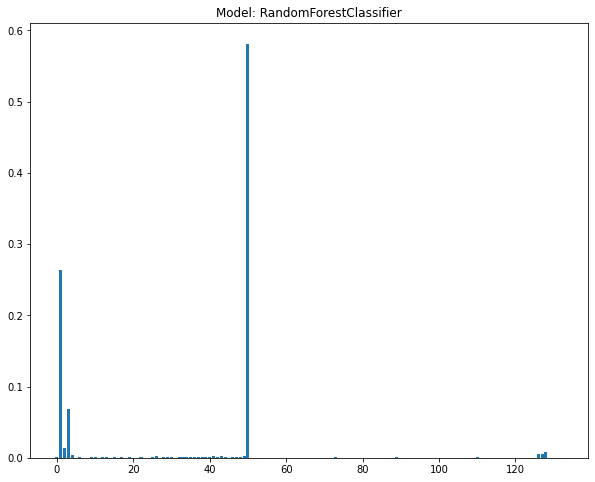



Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=3, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Feature importance using tree based models:


,Feature,Importance
50,CATEGORIA,0.963729
7,IFP,0.001279
24,erosaoo laminar ou em sulco igua,0.001188
64,EstabelecimentoMunicipio_BELA VISTA,0.000982
5,FERTIIRRIGACAO,0.000686
57,EstabelecimentoMunicipio_ANTONIO JOAO,0.000596
16,SALMINERAL_UREIA,0.000578
53,EstabelecimentoMunicipio_AMAMBAI,0.000561
101,EstabelecimentoMunicipio_NOVA ALVORADA DO SUL,0.000529
30,Confinamento,0.000527


Figure bar-feature_importance_using_tree_based_models-XGBClassifier-05-11-2022_19:55:06.png saved in ./plots/ directory.


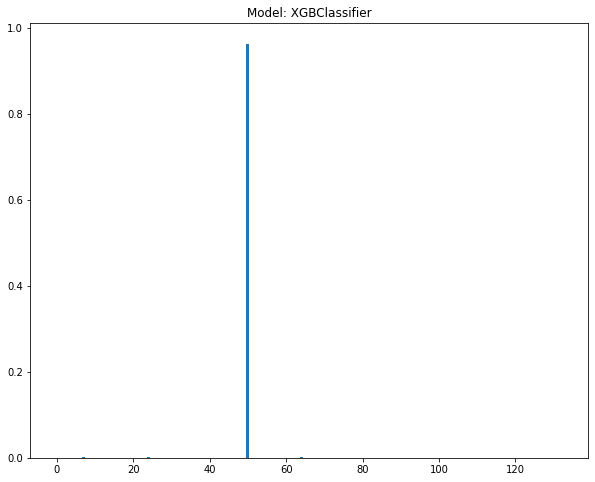

*****FIM IMPRIMIR FEATURE IMPORTANCE USING TREE BASED MODELS******
Function feature_importance_using_tree_based_models Took 0:17:27.314953



In [22]:
# Calculate feature importance with tree based models
reports.feature_importance_using_tree_based_models(
    data_frame=precoce_ms_data_frame,
    models=['decision_tree_classifier',
            'random_forest_classifier', 'xgb_classifier'],
    path_save_fig=settings.PATH_SAVE_PLOTS,
    display_figure=True,
    class_weight='balanced',
    n_jobs=settings.n_jobs
)


In [23]:
reports.informations(data_frame=precoce_ms_data_frame)


*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 2543061
Número de colunas: 134
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543061 entries, 0 to 3153592
Data columns (total 134 columns):
 #    Column                                             Dtype  
---   ------                                             -----  
 0    DataAbate                                          uint8  
 1    Maturidade                                         uint8  
 2    Acabamento                                         uint8  
 3    Peso                                               float32
 4    QuestionarioClassificacaoEstabel                   uint8  
 5    FERTIIRRIGACAO                                     uint8  
 6    ILP                                                uint8  
 7    IFP                                                uint8  
 8    ILPF                                               uint8  
 9    CONCEN_VOLUM                            

## Calcule feature importance using permutation importance

In [13]:
# Calculate feature importance using permutation importance
reports.feature_importance_using_permutation_importance(
    data_frame=precoce_ms_data_frame,
    models=['knneighbors_classifier', 'gaussian_nb'],
    n_repeats=3,
    n_jobs=settings.n_jobs,
    path_save_fig=settings.PATH_SAVE_PLOTS,
    display_figure=True,
)



*****INICIO IMPRIMIR FEATURE IMPORTANCE USING PERMUTATION IMPORTANCE******
!!>>Scoring: accuracy


Model KNeighborsClassifier fited.
Model KNeighborsClassifier score: 0.9921480544728721
Appling permutation importance...


KeyboardInterrupt: 

## Simulate sequential feature selector

### Sequential forward selection

In [ ]:
# Simulate sequential feature selector (SFS)
reports.simulate_sequential_feature_selector(
    data_frame=precoce_ms_data_frame,
    estimator=KNeighborsClassifier(),
    k_features=(3, (precoce_ms_data_frame.shape[1] - 1)),
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=3,
    save_fig=True,
    path_save_fig=settings.PATH_SAVE_PLOTS,
    n_jobs=settings.n_jobs
)


*****INICIO SIMULATE SEQUENTIAL FEATURE SELECTOR******


### Sequential forward floating selection

In [ ]:
# Simulate sequential feature selector (SFFS)
reports.simulate_sequential_feature_selector(
    data_frame=precoce_ms_data_frame,
    estimator=KNeighborsClassifier(),
    k_features=(3, (precoce_ms_data_frame.shape[1] - 1)),
    forward=True,
    floating=True,
    scoring='accuracy',
    cv=3,
    save_fig=True,
    path_save_fig=settings.PATH_SAVE_PLOTS,
    n_jobs=settings.n_jobs
)

### Sequential backward selection

In [ ]:
# Simulate sequential feature selector (SBS)
reports.simulate_sequential_feature_selector(
    data_frame=precoce_ms_data_frame,
    estimator=KNeighborsClassifier(),
    k_features=(3, (precoce_ms_data_frame.shape[1] - 1)),
    forward=False,
    floating=False,
    scoring='accuracy',
    cv=3,
    save_fig=True,
    path_save_fig=settings.PATH_SAVE_PLOTS,
    n_jobs=settings.n_jobs
)

### Sequential backward floating selection

In [ ]:
# Simulate sequential feature selector (SBFS)
reports.simulate_sequential_feature_selector(
    data_frame=precoce_ms_data_frame,
    estimator=KNeighborsClassifier(),
    k_features=(3, (precoce_ms_data_frame.shape[1] - 1)),
    forward=False,
    floating=True,
    scoring='accuracy',
    cv=3,
    save_fig=True,
    path_save_fig=settings.PATH_SAVE_PLOTS,
    n_jobs=settings.n_jobs
)

## Simulate recursive feature elimination with cross validation

In [ ]:
reports.simulate_recursive_feature_elimination_with_cv(
    data_frame=precoce_ms_data_frame,
    estimator=DecisionTreeClassifier(),
    scoring='accuracy',
    n_jobs=settings.n_jobs,
    save_fig=True,
    path_save_fig=settings.PATH_SAVE_PLOTS
)